In [1]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly
%matplotlib inline
import statsmodels.api as sm
import pylab
%matplotlib inline

C:\Users\krnjy\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\krnjy\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
delimiter = ','
max_columns = max(open('all.csv', 'r'), key = lambda x: x.count(delimiter)).count(delimiter)
pro=pd.read_csv('all.csv', header = None, skiprows = 0, names = list(range(0,max_columns)))
pro.columns=pro.iloc[0]
pro=pro[1:]
pro

0            Customer POS NO           PO NO Standard Destination  \
1      A.M.R INDUSTRY     62      SK2016/002      ECE    THAILAND   
2      A.M.R INDUSTRY     35    SK2016/001.1      ECE    THAILAND   
3      A.M.R INDUSTRY     35    SK2016/001.1      ECE    THAILAND   
4      A.M.R INDUSTRY     35    SK2016/001.1      ECE    THAILAND   
5      A.M.R INDUSTRY     35    SK2016/001.1      ECE    THAILAND   
...               ...    ...             ...      ...         ...   
10426   WINNER-MOTORS    039  01/2018 REV 02    E2205      BRAZIL   
10427   WINNER-MOTORS    039  01/2018 REV 02    E2205      BRAZIL   
10428   WINNER-MOTORS    039  01/2018 REV 02    E2205      BRAZIL   
10429   WINNER-MOTORS    039  01/2018 REV 02    E2205      BRAZIL   
10430   WINNER-MOTORS    039         01/2018    E2205      BRAZIL   

0               POS Receive Date POS Delivery Date Model/Type  \
1       Wednesday, 30 March 2016     08 April 2016     VANDAL   
2          Friday, 04 March 2016              ASAP       APEX   
3          Friday, 04 March 2016              ASAP       APEX   
4          Friday, 04 March 2016              ASAP       HALO   
5          Friday, 04 March 2016              ASAP       HALO   
...                          ...               ...        ...   
10426    Monday, 01 October 2018              ASAP        KIT   
10427    Monday, 01 October 2018              ASAP        KIT   
10428    Monday, 01 October 2018              ASAP        KIT   
10429    Monday, 01 October 2018              ASAP        KIT   
10430  Tuesday, 27 February 2018     01 March 2018        KIT   

0                           Description  XXS  ... L(54) XL(56)  XXL  3XL  4XL  \
1                           SOLID WHITE  NaN  ...     4    NaN  NaN  NaN  NaN   
2                       ROLLING THUNDER  NaN  ...     2      1    1    1  NaN   
3                                   SAM  NaN  ...     2      1    1    1  NaN   
4                          DRIFT YELLOW  NaN  ...     2      1    1  NaN  NaN   
5                             DRIFT RED  NaN  ...     2      1    1  NaN  NaN   
...                                 ...  ...  ...   ...    ...  ...  ...  ...   
10426             SPEEDSTAR VISOR CLEAR  NaN  ...   NaN    NaN  NaN  NaN  NaN   
10427               STELLAR VISOR CLEAR  NaN  ...   NaN    NaN  NaN  NaN  NaN   
10428               STELLAR VISOR CLEAR  NaN  ...   NaN    NaN  NaN  NaN  NaN   
10429             SPEEDSTAR VISOR CLEAR  NaN  ...   NaN    NaN  NaN  NaN  NaN   
10430  SR SPORT VISOR RACING DARK SMOKE  NaN  ...   NaN    NaN  NaN  NaN  NaN   

0      S/M L/XL Other NaN NaN  
1      NaN  NaN   NaN NaN NaN  
2      NaN  NaN   NaN NaN NaN  
3      NaN  NaN   NaN NaN NaN  
4      NaN  NaN   NaN NaN NaN  
5      NaN  NaN   NaN NaN NaN  
...    ...  ...   ...  ..  ..  
10426  NaN  NaN    20 NaN NaN  
10427  NaN  NaN    20 NaN NaN  
10428  NaN  NaN    20 NaN NaN  
10429  NaN  NaN    30 NaN NaN  
10430  NaN  NaN    36 NaN NaN  

[10430 rows x 24 columns]

In [3]:
pro.columns

Index([         'Customer',            'POS NO',             'PO NO',
                'Standard',       'Destination',  'POS Receive Date',
       'POS Delivery Date',        'Model/Type',       'Description',
                     'XXS',           'XS (48)',              'XS/S',
                   'S(50)',             'M(52)',             'L(54)',
                  'XL(56)',               'XXL',               '3XL',
                     '4XL',               'S/M',              'L/XL',
                   'Other',                 nan,                 nan],
      dtype='object', name=0)

In [4]:
pro.dropna(how='all',inplace=True)
pro.dropna(how='all', axis=1,inplace=True)
pro = pro.reset_index(drop=True)
pro.drop(['POS NO', 'PO NO', 'Description'], axis=1,inplace=True)

In [5]:
pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 19 columns):
Customer             10430 non-null object
Standard             10301 non-null object
Destination          10430 non-null object
POS Receive Date     10430 non-null object
POS Delivery Date    10429 non-null object
Model/Type           10420 non-null object
XXS                  8 non-null object
XS (48)              2039 non-null object
XS/S                 2 non-null object
S(50)                3892 non-null object
M(52)                5624 non-null object
L(54)                6142 non-null object
XL(56)               4447 non-null object
XXL                  2556 non-null object
3XL                  87 non-null object
4XL                  13 non-null object
S/M                  266 non-null object
L/XL                 276 non-null object
Other                3021 non-null object
dtypes: object(19)
memory usage: 1.5+ MB


In [6]:
pro[['XXS','XS (48)','XS/S','S(50)','M(52)','L(54)','XL(56)','XXL','3XL','4XL','S/M','L/XL','Other']]=pro[['XXS','XS (48)','XS/S','S(50)','M(52)','L(54)','XL(56)','XXL','3XL','4XL','S/M','L/XL','Other']].fillna(0)


In [7]:
pro

0            Customer Standard Destination           POS Receive Date  \
0      A.M.R INDUSTRY      ECE    THAILAND   Wednesday, 30 March 2016   
1      A.M.R INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
2      A.M.R INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
3      A.M.R INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
4      A.M.R INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
...               ...      ...         ...                        ...   
10425   WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10426   WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10427   WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10428   WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10429   WINNER-MOTORS    E2205      BRAZIL  Tuesday, 27 February 2018   

0     POS Delivery Date Model/Type XXS XS (48) XS/S S(50) M(52) L(54) XL(56)  \
0         08 April 2016     VANDAL   0       0    0     6     8     4      0   
1                  ASAP       APEX   0       0    0     1     3     2      1   
2                  ASAP       APEX   0       0    0     1     3     2      1   
3                  ASAP       HALO   0       0    0     2     3     2      1   
4                  ASAP       HALO   0       0    0     2     3     2      1   
...                 ...        ...  ..     ...  ...   ...   ...   ...    ...   
10425              ASAP        KIT   0       0    0     0     0     0      0   
10426              ASAP        KIT   0       0    0     0     0     0      0   
10427              ASAP        KIT   0       0    0     0     0     0      0   
10428              ASAP        KIT   0       0    0     0     0     0      0   
10429     01 March 2018        KIT   0       0    0     0     0     0      0   

0     XXL 3XL 4XL S/M L/XL Other  
0       0   0   0   0    0     0  
1       1   1   0   0    0     0  
2       1   1   0   0    0     0  
3       1   0   0   0    0     0  
4       1   0   0   0    0     0  
...    ..  ..  ..  ..  ...   ...  
10425   0   0   0   0    0    20  
10426   0   0   0   0    0    20  
10427   0   0   0   0    0    20  
10428   0   0   0   0    0    30  
10429   0   0   0   0    0    36  

[10430 rows x 19 columns]

In [8]:
pro.tail()

0           Customer Standard Destination           POS Receive Date  \
10425  WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10426  WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10427  WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10428  WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10429  WINNER-MOTORS    E2205      BRAZIL  Tuesday, 27 February 2018   

0     POS Delivery Date Model/Type XXS XS (48) XS/S S(50) M(52) L(54) XL(56)  \
10425              ASAP        KIT   0       0    0     0     0     0      0   
10426              ASAP        KIT   0       0    0     0     0     0      0   
10427              ASAP        KIT   0       0    0     0     0     0      0   
10428              ASAP        KIT   0       0    0     0     0     0      0   
10429     01 March 2018        KIT   0       0    0     0     0     0      0   

0     XXL 3XL 4XL S/M L/XL Other  
10425   0   0   0   0    0    20  
10426   0   0   0   0    0    20  
10427   0   0   0   0    0    20  
10428   0   0   0   0    0    30  
10429   0   0   0   0    0    36

In [9]:
pro['Customer'].unique()

array(['A.M.R INDUSTRY', 'A.M.R INDUSTRY CO.LTD', 'AGV', 'ALPINESTAR',
       'AMR INDUSTRI', 'AMR INDUSTRY', 'ARGENTINA', 'FORTUNE',
       'FORTUNE INCORPORATED', 'I & K', 'I & K ', 'I&K',
       'I&N INTERNATIONAL', 'INFINITE', 'INFINITE SERV',
       'INFINITE SERV INTERNATIONAL', 'J CLUB', 'J&J TRADING CO LTD',
       'J&J TRANDING CO LTD', 'KINGSTAR', 'KINGSTAR ', 'KODAMA',
       'KYT AUSTRALIAA', 'KYT JAPAN', 'LOCATELI', 'MINGFENG', 'MKA',
       'MKA ', 'OZONE', 'PU', 'SINGAPORE', 'SUMAY', 'SUOMY',
       'SUOMY MOTOSPORT', 'SUOMY Motosport', 'SUOMY-MKA', 'TEN  10',
       'TEN 10', 'TEN 10 RACING INDIA PVL LTD', 'THE ONE CORP',
       'THE ONE CORP.', 'TOC', 'TOP STRONG', 'TOPSTRONG', 'TORPEDO 7',
       'WINNER-MOTORS'], dtype=object)

In [10]:
def chngcus(x):
    if x['Customer']=='I & K' or x['Customer']=='I & K ':
        x['Customer']='I&K'
    return x['Customer']
pro[['Customer']].apply(print,axis=1)
pro['Customer']=pro[['Customer']].apply(chngcus,axis=1)

def chngcus2(x):
    if x['Customer']=='A.M.R INDUSTRY' or x['Customer']=='A.M.R INDUSTRY CO.LTD' or x['Customer']=='AMR INDUSTRI':
        x['Customer']='AMR INDUSTRY'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus2,axis=1)

def chngcus3(x):
    if x['Customer']=='FORTUNE INCORPORATED':
        x['Customer']='FORTUNE'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus3,axis=1)

def chngcus4(x):
    if x['Customer']=='INFINITE' or x['Customer']=='INFINITE SERV':
        x['Customer']='INFINITE SERV INTERNATIONAL'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus4,axis=1)

0
Customer    A.M.R INDUSTRY
Name: 0, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 1, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 2, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 3, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 4, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 5, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 6, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 7, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 8, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 9, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 10, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 11, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 12, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 13, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 14, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 15, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 16, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 17, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 18, dtype: object
0
C

0
Customer    AMR INDUSTRI
Name: 224, dtype: object
0
Customer    AMR INDUSTRI
Name: 225, dtype: object
0
Customer    AMR INDUSTRI
Name: 226, dtype: object
0
Customer    AMR INDUSTRI
Name: 227, dtype: object
0
Customer    AMR INDUSTRI
Name: 228, dtype: object
0
Customer    AMR INDUSTRI
Name: 229, dtype: object
0
Customer    AMR INDUSTRI
Name: 230, dtype: object
0
Customer    AMR INDUSTRI
Name: 231, dtype: object
0
Customer    AMR INDUSTRI
Name: 232, dtype: object
0
Customer    AMR INDUSTRI
Name: 233, dtype: object
0
Customer    AMR INDUSTRI
Name: 234, dtype: object
0
Customer    AMR INDUSTRI
Name: 235, dtype: object
0
Customer    AMR INDUSTRI
Name: 236, dtype: object
0
Customer    AMR INDUSTRI
Name: 237, dtype: object
0
Customer    AMR INDUSTRI
Name: 238, dtype: object
0
Customer    AMR INDUSTRI
Name: 239, dtype: object
0
Customer    AMR INDUSTRI
Name: 240, dtype: object
0
Customer    AMR INDUSTRI
Name: 241, dtype: object
0
Customer    AMR INDUSTRI
Name: 242, dtype: object
0
Customer  

Name: 536, dtype: object
0
Customer    ARGENTINA
Name: 537, dtype: object
0
Customer    ARGENTINA
Name: 538, dtype: object
0
Customer    ARGENTINA
Name: 539, dtype: object
0
Customer    ARGENTINA
Name: 540, dtype: object
0
Customer    ARGENTINA
Name: 541, dtype: object
0
Customer    ARGENTINA
Name: 542, dtype: object
0
Customer    ARGENTINA
Name: 543, dtype: object
0
Customer    ARGENTINA
Name: 544, dtype: object
0
Customer    ARGENTINA
Name: 545, dtype: object
0
Customer    ARGENTINA
Name: 546, dtype: object
0
Customer    ARGENTINA
Name: 547, dtype: object
0
Customer    ARGENTINA
Name: 548, dtype: object
0
Customer    ARGENTINA
Name: 549, dtype: object
0
Customer    ARGENTINA
Name: 550, dtype: object
0
Customer    ARGENTINA
Name: 551, dtype: object
0
Customer    ARGENTINA
Name: 552, dtype: object
0
Customer    ARGENTINA
Name: 553, dtype: object
0
Customer    ARGENTINA
Name: 554, dtype: object
0
Customer    ARGENTINA
Name: 555, dtype: object
0
Customer    ARGENTINA
Name: 556, dtype: ob

Name: 728, dtype: object
0
Customer    I & K
Name: 729, dtype: object
0
Customer    I & K
Name: 730, dtype: object
0
Customer    I & K
Name: 731, dtype: object
0
Customer    I & K
Name: 732, dtype: object
0
Customer    I & K
Name: 733, dtype: object
0
Customer    I & K
Name: 734, dtype: object
0
Customer    I & K
Name: 735, dtype: object
0
Customer    I & K
Name: 736, dtype: object
0
Customer    I & K
Name: 737, dtype: object
0
Customer    I & K
Name: 738, dtype: object
0
Customer    I & K
Name: 739, dtype: object
0
Customer    I & K
Name: 740, dtype: object
0
Customer    I & K
Name: 741, dtype: object
0
Customer    I & K
Name: 742, dtype: object
0
Customer    I & K
Name: 743, dtype: object
0
Customer    I & K
Name: 744, dtype: object
0
Customer    I & K
Name: 745, dtype: object
0
Customer    I & K
Name: 746, dtype: object
0
Customer    I & K
Name: 747, dtype: object
0
Customer    I & K
Name: 748, dtype: object
0
Customer    I & K
Name: 749, dtype: object
0
Customer    I & K
Name: 750,

Name: 974, dtype: object
0
Customer    I & K 
Name: 975, dtype: object
0
Customer    I & K 
Name: 976, dtype: object
0
Customer    I & K 
Name: 977, dtype: object
0
Customer    I & K 
Name: 978, dtype: object
0
Customer    I & K 
Name: 979, dtype: object
0
Customer    I & K 
Name: 980, dtype: object
0
Customer    I & K 
Name: 981, dtype: object
0
Customer    I & K 
Name: 982, dtype: object
0
Customer    I & K 
Name: 983, dtype: object
0
Customer    I & K 
Name: 984, dtype: object
0
Customer    I & K 
Name: 985, dtype: object
0
Customer    I & K 
Name: 986, dtype: object
0
Customer    I & K 
Name: 987, dtype: object
0
Customer    I & K 
Name: 988, dtype: object
0
Customer    I & K 
Name: 989, dtype: object
0
Customer    I & K 
Name: 990, dtype: object
0
Customer    I & K 
Name: 991, dtype: object
0
Customer    I & K 
Name: 992, dtype: object
0
Customer    I & K 
Name: 993, dtype: object
0
Customer    I & K 
Name: 994, dtype: object
0
Customer    I & K 
Name: 995, dtype: object
0
Custome

Name: 1176, dtype: object
0
Customer    I&K
Name: 1177, dtype: object
0
Customer    I&K
Name: 1178, dtype: object
0
Customer    I&K
Name: 1179, dtype: object
0
Customer    I&K
Name: 1180, dtype: object
0
Customer    I&K
Name: 1181, dtype: object
0
Customer    I&K
Name: 1182, dtype: object
0
Customer    I&K
Name: 1183, dtype: object
0
Customer    I&K
Name: 1184, dtype: object
0
Customer    I&K
Name: 1185, dtype: object
0
Customer    I&K
Name: 1186, dtype: object
0
Customer    I&K
Name: 1187, dtype: object
0
Customer    I&K
Name: 1188, dtype: object
0
Customer    I&K
Name: 1189, dtype: object
0
Customer    I&K
Name: 1190, dtype: object
0
Customer    I&K
Name: 1191, dtype: object
0
Customer    I&K
Name: 1192, dtype: object
0
Customer    I&K
Name: 1193, dtype: object
0
Customer    I&K
Name: 1194, dtype: object
0
Customer    I&K
Name: 1195, dtype: object
0
Customer    I&K
Name: 1196, dtype: object
0
Customer    I&K
Name: 1197, dtype: object
0
Customer    I&K
Name: 1198, dtype: object
0
Cust

Name: 1479, dtype: object
0
Customer    INFINITE SERV
Name: 1480, dtype: object
0
Customer    INFINITE SERV
Name: 1481, dtype: object
0
Customer    INFINITE SERV
Name: 1482, dtype: object
0
Customer    INFINITE SERV
Name: 1483, dtype: object
0
Customer    INFINITE SERV
Name: 1484, dtype: object
0
Customer    INFINITE SERV
Name: 1485, dtype: object
0
Customer    INFINITE SERV
Name: 1486, dtype: object
0
Customer    INFINITE SERV
Name: 1487, dtype: object
0
Customer    INFINITE SERV
Name: 1488, dtype: object
0
Customer    INFINITE SERV
Name: 1489, dtype: object
0
Customer    INFINITE SERV
Name: 1490, dtype: object
0
Customer    INFINITE SERV
Name: 1491, dtype: object
0
Customer    INFINITE SERV
Name: 1492, dtype: object
0
Customer    INFINITE SERV
Name: 1493, dtype: object
0
Customer    INFINITE SERV
Name: 1494, dtype: object
0
Customer    INFINITE SERV
Name: 1495, dtype: object
0
Customer    INFINITE SERV
Name: 1496, dtype: object
0
Customer    INFINITE SERV
Name: 1497, dtype: object
0


Name: 1664, dtype: object
0
Customer    INFINITE SERV
Name: 1665, dtype: object
0
Customer    INFINITE SERV
Name: 1666, dtype: object
0
Customer    INFINITE SERV
Name: 1667, dtype: object
0
Customer    INFINITE SERV
Name: 1668, dtype: object
0
Customer    INFINITE SERV
Name: 1669, dtype: object
0
Customer    INFINITE SERV
Name: 1670, dtype: object
0
Customer    INFINITE SERV
Name: 1671, dtype: object
0
Customer    INFINITE SERV
Name: 1672, dtype: object
0
Customer    INFINITE SERV
Name: 1673, dtype: object
0
Customer    INFINITE SERV
Name: 1674, dtype: object
0
Customer    INFINITE SERV
Name: 1675, dtype: object
0
Customer    INFINITE SERV
Name: 1676, dtype: object
0
Customer    INFINITE SERV
Name: 1677, dtype: object
0
Customer    INFINITE SERV
Name: 1678, dtype: object
0
Customer    INFINITE SERV
Name: 1679, dtype: object
0
Customer    INFINITE SERV
Name: 1680, dtype: object
0
Customer    INFINITE SERV
Name: 1681, dtype: object
0
Customer    INFINITE SERV
Name: 1682, dtype: object
0


Name: 1925, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1926, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1927, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1928, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1929, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1930, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1931, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1932, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1933, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1934, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1935, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1936, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1937, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1938, dtype: object
0
Customer    INFINITE SERV INTERNATIONAL
Name: 1939, dtype: object
0
Customer    INFINITE

Name: 2078, dtype: object
0
Customer    J CLUB
Name: 2079, dtype: object
0
Customer    J CLUB
Name: 2080, dtype: object
0
Customer    J CLUB
Name: 2081, dtype: object
0
Customer    J CLUB
Name: 2082, dtype: object
0
Customer    J CLUB
Name: 2083, dtype: object
0
Customer    J CLUB
Name: 2084, dtype: object
0
Customer    J CLUB
Name: 2085, dtype: object
0
Customer    J CLUB
Name: 2086, dtype: object
0
Customer    J CLUB
Name: 2087, dtype: object
0
Customer    J CLUB
Name: 2088, dtype: object
0
Customer    J CLUB
Name: 2089, dtype: object
0
Customer    J CLUB
Name: 2090, dtype: object
0
Customer    J CLUB
Name: 2091, dtype: object
0
Customer    J CLUB
Name: 2092, dtype: object
0
Customer    J CLUB
Name: 2093, dtype: object
0
Customer    J CLUB
Name: 2094, dtype: object
0
Customer    J CLUB
Name: 2095, dtype: object
0
Customer    J CLUB
Name: 2096, dtype: object
0
Customer    J CLUB
Name: 2097, dtype: object
0
Customer    J CLUB
Name: 2098, dtype: object
0
Customer    J CLUB
Name: 2099, d

Name: 2335, dtype: object
0
Customer    J&J TRANDING CO LTD
Name: 2336, dtype: object
0
Customer    J&J TRANDING CO LTD
Name: 2337, dtype: object
0
Customer    J&J TRANDING CO LTD
Name: 2338, dtype: object
0
Customer    J&J TRANDING CO LTD
Name: 2339, dtype: object
0
Customer    J&J TRANDING CO LTD
Name: 2340, dtype: object
0
Customer    J&J TRANDING CO LTD
Name: 2341, dtype: object
0
Customer    J&J TRANDING CO LTD
Name: 2342, dtype: object
0
Customer    J&J TRANDING CO LTD
Name: 2343, dtype: object
0
Customer    J&J TRANDING CO LTD
Name: 2344, dtype: object
0
Customer    J&J TRANDING CO LTD
Name: 2345, dtype: object
0
Customer    J&J TRANDING CO LTD
Name: 2346, dtype: object
0
Customer    J&J TRANDING CO LTD
Name: 2347, dtype: object
0
Customer    J&J TRANDING CO LTD
Name: 2348, dtype: object
0
Customer    J&J TRANDING CO LTD
Name: 2349, dtype: object
0
Customer    J&J TRANDING CO LTD
Name: 2350, dtype: object
0
Customer    J&J TRANDING CO LTD
Name: 2351, dtype: object
0
Customer    

Name: 2528, dtype: object
0
Customer    KINGSTAR 
Name: 2529, dtype: object
0
Customer    KINGSTAR 
Name: 2530, dtype: object
0
Customer    KINGSTAR 
Name: 2531, dtype: object
0
Customer    KINGSTAR 
Name: 2532, dtype: object
0
Customer    KINGSTAR 
Name: 2533, dtype: object
0
Customer    KINGSTAR 
Name: 2534, dtype: object
0
Customer    KINGSTAR 
Name: 2535, dtype: object
0
Customer    KINGSTAR 
Name: 2536, dtype: object
0
Customer    KINGSTAR 
Name: 2537, dtype: object
0
Customer    KINGSTAR 
Name: 2538, dtype: object
0
Customer    KINGSTAR 
Name: 2539, dtype: object
0
Customer    KINGSTAR 
Name: 2540, dtype: object
0
Customer    KINGSTAR 
Name: 2541, dtype: object
0
Customer    KINGSTAR 
Name: 2542, dtype: object
0
Customer    KINGSTAR 
Name: 2543, dtype: object
0
Customer    KINGSTAR 
Name: 2544, dtype: object
0
Customer    KINGSTAR 
Name: 2545, dtype: object
0
Customer    KINGSTAR 
Name: 2546, dtype: object
0
Customer    KINGSTAR 
Name: 2547, dtype: object
0
Customer    KINGSTAR 


Name: 2867, dtype: object
0
Customer    KYT JAPAN
Name: 2868, dtype: object
0
Customer    KYT JAPAN
Name: 2869, dtype: object
0
Customer    KYT JAPAN
Name: 2870, dtype: object
0
Customer    KYT JAPAN
Name: 2871, dtype: object
0
Customer    KYT JAPAN
Name: 2872, dtype: object
0
Customer    KYT JAPAN
Name: 2873, dtype: object
0
Customer    KYT JAPAN
Name: 2874, dtype: object
0
Customer    KYT JAPAN
Name: 2875, dtype: object
0
Customer    KYT JAPAN
Name: 2876, dtype: object
0
Customer    KYT JAPAN
Name: 2877, dtype: object
0
Customer    KYT JAPAN
Name: 2878, dtype: object
0
Customer    KYT JAPAN
Name: 2879, dtype: object
0
Customer    KYT JAPAN
Name: 2880, dtype: object
0
Customer    KYT JAPAN
Name: 2881, dtype: object
0
Customer    KYT JAPAN
Name: 2882, dtype: object
0
Customer    KYT JAPAN
Name: 2883, dtype: object
0
Customer    KYT JAPAN
Name: 2884, dtype: object
0
Customer    KYT JAPAN
Name: 2885, dtype: object
0
Customer    KYT JAPAN
Name: 2886, dtype: object
0
Customer    KYT JAPAN


Name: 3067, dtype: object
0
Customer    KYT JAPAN
Name: 3068, dtype: object
0
Customer    KYT JAPAN
Name: 3069, dtype: object
0
Customer    KYT JAPAN
Name: 3070, dtype: object
0
Customer    KYT JAPAN
Name: 3071, dtype: object
0
Customer    KYT JAPAN
Name: 3072, dtype: object
0
Customer    KYT JAPAN
Name: 3073, dtype: object
0
Customer    KYT JAPAN
Name: 3074, dtype: object
0
Customer    KYT JAPAN
Name: 3075, dtype: object
0
Customer    KYT JAPAN
Name: 3076, dtype: object
0
Customer    KYT JAPAN
Name: 3077, dtype: object
0
Customer    KYT JAPAN
Name: 3078, dtype: object
0
Customer    KYT JAPAN
Name: 3079, dtype: object
0
Customer    KYT JAPAN
Name: 3080, dtype: object
0
Customer    KYT JAPAN
Name: 3081, dtype: object
0
Customer    KYT JAPAN
Name: 3082, dtype: object
0
Customer    KYT JAPAN
Name: 3083, dtype: object
0
Customer    KYT JAPAN
Name: 3084, dtype: object
0
Customer    KYT JAPAN
Name: 3085, dtype: object
0
Customer    KYT JAPAN
Name: 3086, dtype: object
0
Customer    KYT JAPAN


Name: 3370, dtype: object
0
Customer    MINGFENG
Name: 3371, dtype: object
0
Customer    MINGFENG
Name: 3372, dtype: object
0
Customer    MINGFENG
Name: 3373, dtype: object
0
Customer    MINGFENG
Name: 3374, dtype: object
0
Customer    MINGFENG
Name: 3375, dtype: object
0
Customer    MINGFENG
Name: 3376, dtype: object
0
Customer    MINGFENG
Name: 3377, dtype: object
0
Customer    MINGFENG
Name: 3378, dtype: object
0
Customer    MINGFENG
Name: 3379, dtype: object
0
Customer    MINGFENG
Name: 3380, dtype: object
0
Customer    MINGFENG
Name: 3381, dtype: object
0
Customer    MINGFENG
Name: 3382, dtype: object
0
Customer    MINGFENG
Name: 3383, dtype: object
0
Customer    MINGFENG
Name: 3384, dtype: object
0
Customer    MINGFENG
Name: 3385, dtype: object
0
Customer    MINGFENG
Name: 3386, dtype: object
0
Customer    MINGFENG
Name: 3387, dtype: object
0
Customer    MINGFENG
Name: 3388, dtype: object
0
Customer    MINGFENG
Name: 3389, dtype: object
0
Customer    MINGFENG
Name: 3390, dtype: o

Name: 3621, dtype: object
0
Customer    MINGFENG
Name: 3622, dtype: object
0
Customer    MINGFENG
Name: 3623, dtype: object
0
Customer    MINGFENG
Name: 3624, dtype: object
0
Customer    MINGFENG
Name: 3625, dtype: object
0
Customer    MINGFENG
Name: 3626, dtype: object
0
Customer    MINGFENG
Name: 3627, dtype: object
0
Customer    MINGFENG
Name: 3628, dtype: object
0
Customer    MINGFENG
Name: 3629, dtype: object
0
Customer    MINGFENG
Name: 3630, dtype: object
0
Customer    MINGFENG
Name: 3631, dtype: object
0
Customer    MINGFENG
Name: 3632, dtype: object
0
Customer    MINGFENG
Name: 3633, dtype: object
0
Customer    MINGFENG
Name: 3634, dtype: object
0
Customer    MINGFENG
Name: 3635, dtype: object
0
Customer    MINGFENG
Name: 3636, dtype: object
0
Customer    MINGFENG
Name: 3637, dtype: object
0
Customer    MINGFENG
Name: 3638, dtype: object
0
Customer    MINGFENG
Name: 3639, dtype: object
0
Customer    MINGFENG
Name: 3640, dtype: object
0
Customer    MINGFENG
Name: 3641, dtype: o

Name: 3829, dtype: object
0
Customer    MKA
Name: 3830, dtype: object
0
Customer    MKA
Name: 3831, dtype: object
0
Customer    MKA
Name: 3832, dtype: object
0
Customer    MKA
Name: 3833, dtype: object
0
Customer    MKA
Name: 3834, dtype: object
0
Customer    MKA
Name: 3835, dtype: object
0
Customer    MKA
Name: 3836, dtype: object
0
Customer    MKA
Name: 3837, dtype: object
0
Customer    MKA
Name: 3838, dtype: object
0
Customer    MKA
Name: 3839, dtype: object
0
Customer    MKA
Name: 3840, dtype: object
0
Customer    MKA
Name: 3841, dtype: object
0
Customer    MKA
Name: 3842, dtype: object
0
Customer    MKA
Name: 3843, dtype: object
0
Customer    MKA
Name: 3844, dtype: object
0
Customer    MKA
Name: 3845, dtype: object
0
Customer    MKA
Name: 3846, dtype: object
0
Customer    MKA
Name: 3847, dtype: object
0
Customer    MKA
Name: 3848, dtype: object
0
Customer    MKA
Name: 3849, dtype: object
0
Customer    MKA
Name: 3850, dtype: object
0
Customer    MKA
Name: 3851, dtype: object
0
Cust

Name: 4060, dtype: object
0
Customer    MKA
Name: 4061, dtype: object
0
Customer    MKA
Name: 4062, dtype: object
0
Customer    MKA
Name: 4063, dtype: object
0
Customer    MKA
Name: 4064, dtype: object
0
Customer    MKA
Name: 4065, dtype: object
0
Customer    MKA
Name: 4066, dtype: object
0
Customer    MKA
Name: 4067, dtype: object
0
Customer    MKA
Name: 4068, dtype: object
0
Customer    MKA
Name: 4069, dtype: object
0
Customer    MKA
Name: 4070, dtype: object
0
Customer    MKA
Name: 4071, dtype: object
0
Customer    MKA
Name: 4072, dtype: object
0
Customer    MKA
Name: 4073, dtype: object
0
Customer    MKA
Name: 4074, dtype: object
0
Customer    MKA
Name: 4075, dtype: object
0
Customer    MKA
Name: 4076, dtype: object
0
Customer    MKA
Name: 4077, dtype: object
0
Customer    MKA
Name: 4078, dtype: object
0
Customer    MKA
Name: 4079, dtype: object
0
Customer    MKA
Name: 4080, dtype: object
0
Customer    MKA
Name: 4081, dtype: object
0
Customer    MKA
Name: 4082, dtype: object
0
Cust

Name: 4314, dtype: object
0
Customer    MKA
Name: 4315, dtype: object
0
Customer    MKA
Name: 4316, dtype: object
0
Customer    MKA
Name: 4317, dtype: object
0
Customer    MKA
Name: 4318, dtype: object
0
Customer    MKA
Name: 4319, dtype: object
0
Customer    MKA
Name: 4320, dtype: object
0
Customer    MKA
Name: 4321, dtype: object
0
Customer    MKA
Name: 4322, dtype: object
0
Customer    MKA
Name: 4323, dtype: object
0
Customer    MKA
Name: 4324, dtype: object
0
Customer    MKA
Name: 4325, dtype: object
0
Customer    MKA
Name: 4326, dtype: object
0
Customer    MKA
Name: 4327, dtype: object
0
Customer    MKA
Name: 4328, dtype: object
0
Customer    MKA
Name: 4329, dtype: object
0
Customer    MKA
Name: 4330, dtype: object
0
Customer    MKA
Name: 4331, dtype: object
0
Customer    MKA
Name: 4332, dtype: object
0
Customer    MKA
Name: 4333, dtype: object
0
Customer    MKA
Name: 4334, dtype: object
0
Customer    MKA
Name: 4335, dtype: object
0
Customer    MKA
Name: 4336, dtype: object
0
Cust

Name: 4555, dtype: object
0
Customer    MKA
Name: 4556, dtype: object
0
Customer    MKA
Name: 4557, dtype: object
0
Customer    MKA
Name: 4558, dtype: object
0
Customer    MKA
Name: 4559, dtype: object
0
Customer    MKA
Name: 4560, dtype: object
0
Customer    MKA
Name: 4561, dtype: object
0
Customer    MKA
Name: 4562, dtype: object
0
Customer    MKA
Name: 4563, dtype: object
0
Customer    MKA
Name: 4564, dtype: object
0
Customer    MKA
Name: 4565, dtype: object
0
Customer    MKA
Name: 4566, dtype: object
0
Customer    MKA
Name: 4567, dtype: object
0
Customer    MKA
Name: 4568, dtype: object
0
Customer    MKA
Name: 4569, dtype: object
0
Customer    MKA
Name: 4570, dtype: object
0
Customer    MKA
Name: 4571, dtype: object
0
Customer    MKA
Name: 4572, dtype: object
0
Customer    MKA
Name: 4573, dtype: object
0
Customer    MKA
Name: 4574, dtype: object
0
Customer    MKA
Name: 4575, dtype: object
0
Customer    MKA
Name: 4576, dtype: object
0
Customer    MKA
Name: 4577, dtype: object
0
Cust

Name: 4755, dtype: object
0
Customer    MKA
Name: 4756, dtype: object
0
Customer    MKA
Name: 4757, dtype: object
0
Customer    MKA
Name: 4758, dtype: object
0
Customer    MKA
Name: 4759, dtype: object
0
Customer    MKA
Name: 4760, dtype: object
0
Customer    MKA
Name: 4761, dtype: object
0
Customer    MKA
Name: 4762, dtype: object
0
Customer    MKA
Name: 4763, dtype: object
0
Customer    MKA
Name: 4764, dtype: object
0
Customer    MKA
Name: 4765, dtype: object
0
Customer    MKA
Name: 4766, dtype: object
0
Customer    MKA
Name: 4767, dtype: object
0
Customer    MKA
Name: 4768, dtype: object
0
Customer    MKA
Name: 4769, dtype: object
0
Customer    MKA
Name: 4770, dtype: object
0
Customer    MKA
Name: 4771, dtype: object
0
Customer    MKA
Name: 4772, dtype: object
0
Customer    MKA
Name: 4773, dtype: object
0
Customer    MKA
Name: 4774, dtype: object
0
Customer    MKA
Name: 4775, dtype: object
0
Customer    MKA
Name: 4776, dtype: object
0
Customer    MKA
Name: 4777, dtype: object
0
Cust

Name: 5004, dtype: object
0
Customer    MKA
Name: 5005, dtype: object
0
Customer    MKA
Name: 5006, dtype: object
0
Customer    MKA
Name: 5007, dtype: object
0
Customer    MKA
Name: 5008, dtype: object
0
Customer    MKA
Name: 5009, dtype: object
0
Customer    MKA
Name: 5010, dtype: object
0
Customer    MKA
Name: 5011, dtype: object
0
Customer    MKA
Name: 5012, dtype: object
0
Customer    MKA
Name: 5013, dtype: object
0
Customer    MKA
Name: 5014, dtype: object
0
Customer    MKA
Name: 5015, dtype: object
0
Customer    MKA
Name: 5016, dtype: object
0
Customer    MKA
Name: 5017, dtype: object
0
Customer    MKA
Name: 5018, dtype: object
0
Customer    MKA
Name: 5019, dtype: object
0
Customer    MKA
Name: 5020, dtype: object
0
Customer    MKA
Name: 5021, dtype: object
0
Customer    MKA
Name: 5022, dtype: object
0
Customer    MKA
Name: 5023, dtype: object
0
Customer    MKA
Name: 5024, dtype: object
0
Customer    MKA
Name: 5025, dtype: object
0
Customer    MKA
Name: 5026, dtype: object
0
Cust

0
Customer    MKA
Name: 5430, dtype: object
0
Customer    MKA
Name: 5431, dtype: object
0
Customer    MKA
Name: 5432, dtype: object
0
Customer    MKA
Name: 5433, dtype: object
0
Customer    MKA
Name: 5434, dtype: object
0
Customer    MKA
Name: 5435, dtype: object
0
Customer    MKA
Name: 5436, dtype: object
0
Customer    MKA
Name: 5437, dtype: object
0
Customer    MKA
Name: 5438, dtype: object
0
Customer    MKA
Name: 5439, dtype: object
0
Customer    MKA
Name: 5440, dtype: object
0
Customer    MKA
Name: 5441, dtype: object
0
Customer    MKA
Name: 5442, dtype: object
0
Customer    MKA
Name: 5443, dtype: object
0
Customer    MKA
Name: 5444, dtype: object
0
Customer    MKA
Name: 5445, dtype: object
0
Customer    MKA
Name: 5446, dtype: object
0
Customer    MKA
Name: 5447, dtype: object
0
Customer    MKA
Name: 5448, dtype: object
0
Customer    MKA
Name: 5449, dtype: object
0
Customer    MKA
Name: 5450, dtype: object
0
Customer    MKA
Name: 5451, dtype: object
0
Customer    MKA
Name: 5452, dt

0
Customer    OZONE
Name: 5615, dtype: object
0
Customer    OZONE
Name: 5616, dtype: object
0
Customer    OZONE
Name: 5617, dtype: object
0
Customer    OZONE
Name: 5618, dtype: object
0
Customer    OZONE
Name: 5619, dtype: object
0
Customer    OZONE
Name: 5620, dtype: object
0
Customer    OZONE
Name: 5621, dtype: object
0
Customer    OZONE
Name: 5622, dtype: object
0
Customer    OZONE
Name: 5623, dtype: object
0
Customer    OZONE
Name: 5624, dtype: object
0
Customer    OZONE
Name: 5625, dtype: object
0
Customer    OZONE
Name: 5626, dtype: object
0
Customer    OZONE
Name: 5627, dtype: object
0
Customer    OZONE
Name: 5628, dtype: object
0
Customer    OZONE
Name: 5629, dtype: object
0
Customer    OZONE
Name: 5630, dtype: object
0
Customer    OZONE
Name: 5631, dtype: object
0
Customer    OZONE
Name: 5632, dtype: object
0
Customer    OZONE
Name: 5633, dtype: object
0
Customer    OZONE
Name: 5634, dtype: object
0
Customer    OZONE
Name: 5635, dtype: object
0
Customer    OZONE
Name: 5636, dt

0
Customer    OZONE
Name: 6038, dtype: object
0
Customer    OZONE
Name: 6039, dtype: object
0
Customer    OZONE
Name: 6040, dtype: object
0
Customer    OZONE
Name: 6041, dtype: object
0
Customer    OZONE
Name: 6042, dtype: object
0
Customer    OZONE
Name: 6043, dtype: object
0
Customer    OZONE
Name: 6044, dtype: object
0
Customer    OZONE
Name: 6045, dtype: object
0
Customer    OZONE
Name: 6046, dtype: object
0
Customer    OZONE
Name: 6047, dtype: object
0
Customer    PU
Name: 6048, dtype: object
0
Customer    PU
Name: 6049, dtype: object
0
Customer    PU
Name: 6050, dtype: object
0
Customer    PU
Name: 6051, dtype: object
0
Customer    PU
Name: 6052, dtype: object
0
Customer    PU
Name: 6053, dtype: object
0
Customer    PU
Name: 6054, dtype: object
0
Customer    PU
Name: 6055, dtype: object
0
Customer    PU
Name: 6056, dtype: object
0
Customer    PU
Name: 6057, dtype: object
0
Customer    PU
Name: 6058, dtype: object
0
Customer    PU
Name: 6059, dtype: object
0
Customer    PU
Name: 6

Name: 6260, dtype: object
0
Customer    SUOMY
Name: 6261, dtype: object
0
Customer    SUOMY
Name: 6262, dtype: object
0
Customer    SUOMY
Name: 6263, dtype: object
0
Customer    SUOMY
Name: 6264, dtype: object
0
Customer    SUOMY
Name: 6265, dtype: object
0
Customer    SUOMY
Name: 6266, dtype: object
0
Customer    SUOMY
Name: 6267, dtype: object
0
Customer    SUOMY
Name: 6268, dtype: object
0
Customer    SUOMY
Name: 6269, dtype: object
0
Customer    SUOMY
Name: 6270, dtype: object
0
Customer    SUOMY
Name: 6271, dtype: object
0
Customer    SUOMY
Name: 6272, dtype: object
0
Customer    SUOMY
Name: 6273, dtype: object
0
Customer    SUOMY
Name: 6274, dtype: object
0
Customer    SUOMY
Name: 6275, dtype: object
0
Customer    SUOMY
Name: 6276, dtype: object
0
Customer    SUOMY
Name: 6277, dtype: object
0
Customer    SUOMY
Name: 6278, dtype: object
0
Customer    SUOMY
Name: 6279, dtype: object
0
Customer    SUOMY
Name: 6280, dtype: object
0
Customer    SUOMY
Name: 6281, dtype: object
0
Custom

Name: 6473, dtype: object
0
Customer    SUOMY
Name: 6474, dtype: object
0
Customer    SUOMY
Name: 6475, dtype: object
0
Customer    SUOMY
Name: 6476, dtype: object
0
Customer    SUOMY
Name: 6477, dtype: object
0
Customer    SUOMY
Name: 6478, dtype: object
0
Customer    SUOMY
Name: 6479, dtype: object
0
Customer    SUOMY
Name: 6480, dtype: object
0
Customer    SUOMY
Name: 6481, dtype: object
0
Customer    SUOMY
Name: 6482, dtype: object
0
Customer    SUOMY
Name: 6483, dtype: object
0
Customer    SUOMY
Name: 6484, dtype: object
0
Customer    SUOMY
Name: 6485, dtype: object
0
Customer    SUOMY
Name: 6486, dtype: object
0
Customer    SUOMY
Name: 6487, dtype: object
0
Customer    SUOMY
Name: 6488, dtype: object
0
Customer    SUOMY
Name: 6489, dtype: object
0
Customer    SUOMY
Name: 6490, dtype: object
0
Customer    SUOMY
Name: 6491, dtype: object
0
Customer    SUOMY
Name: 6492, dtype: object
0
Customer    SUOMY
Name: 6493, dtype: object
0
Customer    SUOMY
Name: 6494, dtype: object
0
Custom

Name: 6693, dtype: object
0
Customer    SUOMY
Name: 6694, dtype: object
0
Customer    SUOMY
Name: 6695, dtype: object
0
Customer    SUOMY
Name: 6696, dtype: object
0
Customer    SUOMY
Name: 6697, dtype: object
0
Customer    SUOMY
Name: 6698, dtype: object
0
Customer    SUOMY
Name: 6699, dtype: object
0
Customer    SUOMY
Name: 6700, dtype: object
0
Customer    SUOMY
Name: 6701, dtype: object
0
Customer    SUOMY
Name: 6702, dtype: object
0
Customer    SUOMY
Name: 6703, dtype: object
0
Customer    SUOMY
Name: 6704, dtype: object
0
Customer    SUOMY
Name: 6705, dtype: object
0
Customer    SUOMY
Name: 6706, dtype: object
0
Customer    SUOMY
Name: 6707, dtype: object
0
Customer    SUOMY
Name: 6708, dtype: object
0
Customer    SUOMY
Name: 6709, dtype: object
0
Customer    SUOMY
Name: 6710, dtype: object
0
Customer    SUOMY
Name: 6711, dtype: object
0
Customer    SUOMY
Name: 6712, dtype: object
0
Customer    SUOMY
Name: 6713, dtype: object
0
Customer    SUOMY
Name: 6714, dtype: object
0
Custom

Name: 6902, dtype: object
0
Customer    SUOMY
Name: 6903, dtype: object
0
Customer    SUOMY
Name: 6904, dtype: object
0
Customer    SUOMY
Name: 6905, dtype: object
0
Customer    SUOMY
Name: 6906, dtype: object
0
Customer    SUOMY
Name: 6907, dtype: object
0
Customer    SUOMY
Name: 6908, dtype: object
0
Customer    SUOMY
Name: 6909, dtype: object
0
Customer    SUOMY
Name: 6910, dtype: object
0
Customer    SUOMY
Name: 6911, dtype: object
0
Customer    SUOMY
Name: 6912, dtype: object
0
Customer    SUOMY
Name: 6913, dtype: object
0
Customer    SUOMY
Name: 6914, dtype: object
0
Customer    SUOMY
Name: 6915, dtype: object
0
Customer    SUOMY
Name: 6916, dtype: object
0
Customer    SUOMY
Name: 6917, dtype: object
0
Customer    SUOMY
Name: 6918, dtype: object
0
Customer    SUOMY
Name: 6919, dtype: object
0
Customer    SUOMY
Name: 6920, dtype: object
0
Customer    SUOMY
Name: 6921, dtype: object
0
Customer    SUOMY
Name: 6922, dtype: object
0
Customer    SUOMY
Name: 6923, dtype: object
0
Custom

Name: 7155, dtype: object
0
Customer    SUOMY
Name: 7156, dtype: object
0
Customer    SUOMY
Name: 7157, dtype: object
0
Customer    SUOMY
Name: 7158, dtype: object
0
Customer    SUOMY
Name: 7159, dtype: object
0
Customer    SUOMY
Name: 7160, dtype: object
0
Customer    SUOMY
Name: 7161, dtype: object
0
Customer    SUOMY
Name: 7162, dtype: object
0
Customer    SUOMY
Name: 7163, dtype: object
0
Customer    SUOMY
Name: 7164, dtype: object
0
Customer    SUOMY
Name: 7165, dtype: object
0
Customer    SUOMY
Name: 7166, dtype: object
0
Customer    SUOMY
Name: 7167, dtype: object
0
Customer    SUOMY
Name: 7168, dtype: object
0
Customer    SUOMY
Name: 7169, dtype: object
0
Customer    SUOMY
Name: 7170, dtype: object
0
Customer    SUOMY
Name: 7171, dtype: object
0
Customer    SUOMY
Name: 7172, dtype: object
0
Customer    SUOMY
Name: 7173, dtype: object
0
Customer    SUOMY
Name: 7174, dtype: object
0
Customer    SUOMY
Name: 7175, dtype: object
0
Customer    SUOMY
Name: 7176, dtype: object
0
Custom

Name: 7333, dtype: object
0
Customer    SUOMY
Name: 7334, dtype: object
0
Customer    SUOMY
Name: 7335, dtype: object
0
Customer    SUOMY
Name: 7336, dtype: object
0
Customer    SUOMY
Name: 7337, dtype: object
0
Customer    SUOMY
Name: 7338, dtype: object
0
Customer    SUOMY
Name: 7339, dtype: object
0
Customer    SUOMY
Name: 7340, dtype: object
0
Customer    SUOMY
Name: 7341, dtype: object
0
Customer    SUOMY
Name: 7342, dtype: object
0
Customer    SUOMY
Name: 7343, dtype: object
0
Customer    SUOMY
Name: 7344, dtype: object
0
Customer    SUOMY
Name: 7345, dtype: object
0
Customer    SUOMY
Name: 7346, dtype: object
0
Customer    SUOMY
Name: 7347, dtype: object
0
Customer    SUOMY
Name: 7348, dtype: object
0
Customer    SUOMY
Name: 7349, dtype: object
0
Customer    SUOMY
Name: 7350, dtype: object
0
Customer    SUOMY
Name: 7351, dtype: object
0
Customer    SUOMY
Name: 7352, dtype: object
0
Customer    SUOMY
Name: 7353, dtype: object
0
Customer    SUOMY
Name: 7354, dtype: object
0
Custom

Name: 7586, dtype: object
0
Customer    SUOMY
Name: 7587, dtype: object
0
Customer    SUOMY
Name: 7588, dtype: object
0
Customer    SUOMY
Name: 7589, dtype: object
0
Customer    SUOMY
Name: 7590, dtype: object
0
Customer    SUOMY
Name: 7591, dtype: object
0
Customer    SUOMY
Name: 7592, dtype: object
0
Customer    SUOMY
Name: 7593, dtype: object
0
Customer    SUOMY
Name: 7594, dtype: object
0
Customer    SUOMY
Name: 7595, dtype: object
0
Customer    SUOMY
Name: 7596, dtype: object
0
Customer    SUOMY
Name: 7597, dtype: object
0
Customer    SUOMY
Name: 7598, dtype: object
0
Customer    SUOMY
Name: 7599, dtype: object
0
Customer    SUOMY
Name: 7600, dtype: object
0
Customer    SUOMY
Name: 7601, dtype: object
0
Customer    SUOMY
Name: 7602, dtype: object
0
Customer    SUOMY
Name: 7603, dtype: object
0
Customer    SUOMY
Name: 7604, dtype: object
0
Customer    SUOMY
Name: 7605, dtype: object
0
Customer    SUOMY
Name: 7606, dtype: object
0
Customer    SUOMY
Name: 7607, dtype: object
0
Custom

Name: 7886, dtype: object
0
Customer    SUOMY
Name: 7887, dtype: object
0
Customer    SUOMY
Name: 7888, dtype: object
0
Customer    SUOMY
Name: 7889, dtype: object
0
Customer    SUOMY
Name: 7890, dtype: object
0
Customer    SUOMY
Name: 7891, dtype: object
0
Customer    SUOMY
Name: 7892, dtype: object
0
Customer    SUOMY
Name: 7893, dtype: object
0
Customer    SUOMY
Name: 7894, dtype: object
0
Customer    SUOMY
Name: 7895, dtype: object
0
Customer    SUOMY
Name: 7896, dtype: object
0
Customer    SUOMY
Name: 7897, dtype: object
0
Customer    SUOMY
Name: 7898, dtype: object
0
Customer    SUOMY
Name: 7899, dtype: object
0
Customer    SUOMY
Name: 7900, dtype: object
0
Customer    SUOMY
Name: 7901, dtype: object
0
Customer    SUOMY
Name: 7902, dtype: object
0
Customer    SUOMY
Name: 7903, dtype: object
0
Customer    SUOMY
Name: 7904, dtype: object
0
Customer    SUOMY
Name: 7905, dtype: object
0
Customer    SUOMY
Name: 7906, dtype: object
0
Customer    SUOMY
Name: 7907, dtype: object
0
Custom

Name: 8064, dtype: object
0
Customer    SUOMY
Name: 8065, dtype: object
0
Customer    SUOMY
Name: 8066, dtype: object
0
Customer    SUOMY
Name: 8067, dtype: object
0
Customer    SUOMY
Name: 8068, dtype: object
0
Customer    SUOMY
Name: 8069, dtype: object
0
Customer    SUOMY
Name: 8070, dtype: object
0
Customer    SUOMY
Name: 8071, dtype: object
0
Customer    SUOMY
Name: 8072, dtype: object
0
Customer    SUOMY
Name: 8073, dtype: object
0
Customer    SUOMY
Name: 8074, dtype: object
0
Customer    SUOMY
Name: 8075, dtype: object
0
Customer    SUOMY
Name: 8076, dtype: object
0
Customer    SUOMY
Name: 8077, dtype: object
0
Customer    SUOMY
Name: 8078, dtype: object
0
Customer    SUOMY
Name: 8079, dtype: object
0
Customer    SUOMY
Name: 8080, dtype: object
0
Customer    SUOMY
Name: 8081, dtype: object
0
Customer    SUOMY
Name: 8082, dtype: object
0
Customer    SUOMY
Name: 8083, dtype: object
0
Customer    SUOMY
Name: 8084, dtype: object
0
Customer    SUOMY
Name: 8085, dtype: object
0
Custom

Name: 8291, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8292, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8293, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8294, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8295, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8296, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8297, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8298, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8299, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8300, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8301, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8302, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8303, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8304, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8305, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8306, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8307, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8308, dtype: object
0
Customer    SUOMY MO

Name: 8505, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8506, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8507, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8508, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8509, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8510, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8511, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8512, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8513, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8514, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8515, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8516, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8517, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8518, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8519, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8520, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8521, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8522, dtype: object
0
Customer    SUOMY MO

Name: 8697, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8698, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8699, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8700, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8701, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8702, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8703, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8704, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8705, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8706, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8707, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8708, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8709, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8710, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8711, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8712, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8713, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8714, dtype: object
0
Customer    SUOMY MO

Name: 8927, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8928, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8929, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8930, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8931, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8932, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8933, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8934, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8935, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8936, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8937, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8938, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8939, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8940, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8941, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8942, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8943, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 8944, dtype: object
0
Customer    SUOMY MO

Name: 9103, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9104, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9105, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9106, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9107, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9108, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9109, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9110, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9111, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9112, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9113, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9114, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9115, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9116, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9117, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9118, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9119, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9120, dtype: object
0
Customer    SUOMY MO

Name: 9278, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9279, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9280, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9281, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9282, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9283, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9284, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9285, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9286, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9287, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9288, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9289, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9290, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9291, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9292, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9293, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9294, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9295, dtype: object
0
Customer    SUOMY MO

Name: 9575, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9576, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9577, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9578, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9579, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9580, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9581, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9582, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9583, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9584, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9585, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9586, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9587, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9588, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9589, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9590, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9591, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9592, dtype: object
0
Customer    SUOMY MO

Name: 9726, dtype: object
0
Customer    SUOMY-MKA
Name: 9727, dtype: object
0
Customer    SUOMY-MKA
Name: 9728, dtype: object
0
Customer    SUOMY-MKA
Name: 9729, dtype: object
0
Customer    SUOMY-MKA
Name: 9730, dtype: object
0
Customer    SUOMY-MKA
Name: 9731, dtype: object
0
Customer    SUOMY-MKA
Name: 9732, dtype: object
0
Customer    SUOMY-MKA
Name: 9733, dtype: object
0
Customer    SUOMY-MKA
Name: 9734, dtype: object
0
Customer    SUOMY-MKA
Name: 9735, dtype: object
0
Customer    SUOMY-MKA
Name: 9736, dtype: object
0
Customer    SUOMY-MKA
Name: 9737, dtype: object
0
Customer    SUOMY-MKA
Name: 9738, dtype: object
0
Customer    SUOMY-MKA
Name: 9739, dtype: object
0
Customer    SUOMY-MKA
Name: 9740, dtype: object
0
Customer    SUOMY-MKA
Name: 9741, dtype: object
0
Customer    SUOMY-MKA
Name: 9742, dtype: object
0
Customer    TEN  10
Name: 9743, dtype: object
0
Customer    TEN  10
Name: 9744, dtype: object
0
Customer    TEN  10
Name: 9745, dtype: object
0
Customer    TEN  10
Name: 97

Name: 9917, dtype: object
0
Customer    THE ONE CORP.
Name: 9918, dtype: object
0
Customer    THE ONE CORP.
Name: 9919, dtype: object
0
Customer    THE ONE CORP.
Name: 9920, dtype: object
0
Customer    THE ONE CORP.
Name: 9921, dtype: object
0
Customer    THE ONE CORP.
Name: 9922, dtype: object
0
Customer    THE ONE CORP.
Name: 9923, dtype: object
0
Customer    THE ONE CORP.
Name: 9924, dtype: object
0
Customer    THE ONE CORP.
Name: 9925, dtype: object
0
Customer    THE ONE CORP.
Name: 9926, dtype: object
0
Customer    THE ONE CORP.
Name: 9927, dtype: object
0
Customer    THE ONE CORP.
Name: 9928, dtype: object
0
Customer    THE ONE CORP.
Name: 9929, dtype: object
0
Customer    THE ONE CORP.
Name: 9930, dtype: object
0
Customer    THE ONE CORP.
Name: 9931, dtype: object
0
Customer    THE ONE CORP.
Name: 9932, dtype: object
0
Customer    THE ONE CORP.
Name: 9933, dtype: object
0
Customer    THE ONE CORP.
Name: 9934, dtype: object
0
Customer    THE ONE CORP.
Name: 9935, dtype: object
0


Name: 10119, dtype: object
0
Customer    TOC
Name: 10120, dtype: object
0
Customer    TOC
Name: 10121, dtype: object
0
Customer    TOC
Name: 10122, dtype: object
0
Customer    TOC
Name: 10123, dtype: object
0
Customer    TOC
Name: 10124, dtype: object
0
Customer    TOC
Name: 10125, dtype: object
0
Customer    TOC
Name: 10126, dtype: object
0
Customer    TOC
Name: 10127, dtype: object
0
Customer    TOC
Name: 10128, dtype: object
0
Customer    TOC
Name: 10129, dtype: object
0
Customer    TOC
Name: 10130, dtype: object
0
Customer    TOC
Name: 10131, dtype: object
0
Customer    TOC
Name: 10132, dtype: object
0
Customer    TOC
Name: 10133, dtype: object
0
Customer    TOC
Name: 10134, dtype: object
0
Customer    TOC
Name: 10135, dtype: object
0
Customer    TOC
Name: 10136, dtype: object
0
Customer    TOC
Name: 10137, dtype: object
0
Customer    TOC
Name: 10138, dtype: object
0
Customer    TOC
Name: 10139, dtype: object
0
Customer    TOC
Name: 10140, dtype: object
0
Customer    TOC
Name: 1014

In [11]:
def chngcus5(x):
    if x['Customer']=='J&J TRANDING CO LTD':
        x['Customer']='J&J TRADING CO LTD'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus5,axis=1)

In [12]:
def chngcus6(x):
    if x['Customer']=='KINGSTAR ':
        x['Customer']='KINGSTAR'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus6,axis=1)

In [13]:
def chngcus7(x):
    if x['Customer']=='KYT AUSTRALIAA':
        x['Customer']='KYT AUSTRALIA'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus7,axis=1)

In [14]:
def chngcus8(x):
    if x['Customer']=='MKA ':
        x['Customer']='MKA'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus8,axis=1)

In [15]:
def chngcus9(x):
    if x['Customer']=='SUOMY Motosport':
        x['Customer']='SUOMY MOTOSPORT'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus9,axis=1)

In [16]:
def chngcus10(x):
    if x['Customer']=='TEN  10' or x['Customer']=='TEN 10' or x['Customer']=='TEN 10 RACING INDIA PVL LTD':
        x['Customer']='TEN 10 RACING INDIA'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus10,axis=1)

In [17]:
def chngcus11(x):
    if x['Customer']=='THE ONE CORP' or x['Customer']=='THE ONE CORP.' or x['Customer']=='TOC':
        x['Customer']='THE ONE CORP (TOC)'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus11,axis=1)

In [18]:
def chngcus12(x):
    if x['Customer']=='TOPSTRONG':
        x['Customer']='TOP STRONG'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus12,axis=1)

In [19]:
pro['Customer'].value_counts()

SUOMY                          1969
MKA                            1876
SUOMY MOTOSPORT                1582
INFINITE SERV INTERNATIONAL     698
I&K                             649
MINGFENG                        561
AMR INDUSTRY                    479
OZONE                           437
THE ONE CORP (TOC)              394
KINGSTAR                        367
KYT JAPAN                       357
J&J TRADING CO LTD              290
WINNER-MOTORS                   133
FORTUNE                         127
TEN 10 RACING INDIA             124
PU                               74
ARGENTINA                        51
ALPINESTAR                       51
SUOMY-MKA                        41
KYT AUSTRALIA                    39
J CLUB                           33
TOP STRONG                       31
SUMAY                            15
SINGAPORE                        14
LOCATELI                         13
I&N INTERNATIONAL                 9
KODAMA                            6
TORPEDO 7                   

In [20]:
pro

0           Customer Standard Destination           POS Receive Date  \
0       AMR INDUSTRY      ECE    THAILAND   Wednesday, 30 March 2016   
1       AMR INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
2       AMR INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
3       AMR INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
4       AMR INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
...              ...      ...         ...                        ...   
10425  WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10426  WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10427  WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10428  WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10429  WINNER-MOTORS    E2205      BRAZIL  Tuesday, 27 February 2018   

0     POS Delivery Date Model/Type XXS XS (48) XS/S S(50) M(52) L(54) XL(56)  \
0         08 April 2016     VANDAL   0       0    0     6     8     4      0   
1                  ASAP       APEX   0       0    0     1     3     2      1   
2                  ASAP       APEX   0       0    0     1     3     2      1   
3                  ASAP       HALO   0       0    0     2     3     2      1   
4                  ASAP       HALO   0       0    0     2     3     2      1   
...                 ...        ...  ..     ...  ...   ...   ...   ...    ...   
10425              ASAP        KIT   0       0    0     0     0     0      0   
10426              ASAP        KIT   0       0    0     0     0     0      0   
10427              ASAP        KIT   0       0    0     0     0     0      0   
10428              ASAP        KIT   0       0    0     0     0     0      0   
10429     01 March 2018        KIT   0       0    0     0     0     0      0   

0     XXL 3XL 4XL S/M L/XL Other  
0       0   0   0   0    0     0  
1       1   1   0   0    0     0  
2       1   1   0   0    0     0  
3       1   0   0   0    0     0  
4       1   0   0   0    0     0  
...    ..  ..  ..  ..  ...   ...  
10425   0   0   0   0    0    20  
10426   0   0   0   0    0    20  
10427   0   0   0   0    0    20  
10428   0   0   0   0    0    30  
10429   0   0   0   0    0    36  

[10430 rows x 19 columns]

In [21]:
pro['Destination'].unique()

array(['THAILAND', 'ITALY', 'TAHILAND', 'ARGENTINA', 'PHILIPPINES',
       'PHILIPPINA', 'KOREA', 'PHILIPINA', 'PHILIPPPINES', 'PHILIPPNES',
       'CHINA', 'SHANGHAI', 'JAPAN', 'AUSTRALIA', 'AUSTALIA',
       'LOCA-ITALY', 'TAIWAN', 'TAIWAN ', 'MALAYSIA', 'MLAYSIA',
       'VIETNAM', 'SINGAPORE', 'SINGAPURA', 'OZONE ', 'OZONE-ITALY',
       'OZONE', 'AMERICA', 'USA', 'USA REV1', 'AMERIKA VANLEUWEN',
       'AMERIKA', 'SUOMY', 'SUOMY-ITALY', 'VAN LW', 'SUOMY ITALY',
       'VAN LEEUWEN', 'SUOMY ', 'INDIA', 'NEW ZEALAND', 'BRAZIL'],
      dtype=object)

In [22]:
def dest(a):
    if a['Destination']=='TAHILAND':
        a['Destination']='THAILAND'
    return a['Destination']
pro[['Destination']].apply(print,axis=1)
pro['Destination']=pro[['Destination']].apply(dest,axis=1)

0
Destination    THAILAND
Name: 0, dtype: object
0
Destination    THAILAND
Name: 1, dtype: object
0
Destination    THAILAND
Name: 2, dtype: object
0
Destination    THAILAND
Name: 3, dtype: object
0
Destination    THAILAND
Name: 4, dtype: object
0
Destination    THAILAND
Name: 5, dtype: object
0
Destination    THAILAND
Name: 6, dtype: object
0
Destination    THAILAND
Name: 7, dtype: object
0
Destination    THAILAND
Name: 8, dtype: object
0
Destination    THAILAND
Name: 9, dtype: object
0
Destination    THAILAND
Name: 10, dtype: object
0
Destination    THAILAND
Name: 11, dtype: object
0
Destination    THAILAND
Name: 12, dtype: object
0
Destination    THAILAND
Name: 13, dtype: object
0
Destination    THAILAND
Name: 14, dtype: object
0
Destination    THAILAND
Name: 15, dtype: object
0
Destination    THAILAND
Name: 16, dtype: object
0
Destination    THAILAND
Name: 17, dtype: object
0
Destination    THAILAND
Name: 18, dtype: object
0
Destination    THAILAND
Name: 19, dtype: object
0
Destinat

Name: 347, dtype: object
0
Destination    THAILAND
Name: 348, dtype: object
0
Destination    THAILAND
Name: 349, dtype: object
0
Destination    THAILAND
Name: 350, dtype: object
0
Destination    THAILAND
Name: 351, dtype: object
0
Destination    THAILAND
Name: 352, dtype: object
0
Destination    THAILAND
Name: 353, dtype: object
0
Destination    TAHILAND
Name: 354, dtype: object
0
Destination    THAILAND
Name: 355, dtype: object
0
Destination    THAILAND
Name: 356, dtype: object
0
Destination    THAILAND
Name: 357, dtype: object
0
Destination    THAILAND
Name: 358, dtype: object
0
Destination    THAILAND
Name: 359, dtype: object
0
Destination    THAILAND
Name: 360, dtype: object
0
Destination    THAILAND
Name: 361, dtype: object
0
Destination    THAILAND
Name: 362, dtype: object
0
Destination    THAILAND
Name: 363, dtype: object
0
Destination    THAILAND
Name: 364, dtype: object
0
Destination    THAILAND
Name: 365, dtype: object
0
Destination    THAILAND
Name: 366, dtype: object
0
Dest

Name: 655, dtype: object
0
Destination    PHILIPPINES
Name: 656, dtype: object
0
Destination    PHILIPPINES
Name: 657, dtype: object
0
Destination    PHILIPPINES
Name: 658, dtype: object
0
Destination    PHILIPPINES
Name: 659, dtype: object
0
Destination    PHILIPPINES
Name: 660, dtype: object
0
Destination    PHILIPPINES
Name: 661, dtype: object
0
Destination    PHILIPPINES
Name: 662, dtype: object
0
Destination    PHILIPPINES
Name: 663, dtype: object
0
Destination    PHILIPPINES
Name: 664, dtype: object
0
Destination    PHILIPPINES
Name: 665, dtype: object
0
Destination    PHILIPPINES
Name: 666, dtype: object
0
Destination    PHILIPPINES
Name: 667, dtype: object
0
Destination    PHILIPPINES
Name: 668, dtype: object
0
Destination    PHILIPPINES
Name: 669, dtype: object
0
Destination    PHILIPPINES
Name: 670, dtype: object
0
Destination    PHILIPPINES
Name: 671, dtype: object
0
Destination    PHILIPPINES
Name: 672, dtype: object
0
Destination    PHILIPPINES
Name: 673, dtype: object
0
D

Name: 890, dtype: object
0
Destination    KOREA
Name: 891, dtype: object
0
Destination    KOREA
Name: 892, dtype: object
0
Destination    KOREA
Name: 893, dtype: object
0
Destination    KOREA
Name: 894, dtype: object
0
Destination    KOREA
Name: 895, dtype: object
0
Destination    KOREA
Name: 896, dtype: object
0
Destination    KOREA
Name: 897, dtype: object
0
Destination    KOREA
Name: 898, dtype: object
0
Destination    KOREA
Name: 899, dtype: object
0
Destination    KOREA
Name: 900, dtype: object
0
Destination    KOREA
Name: 901, dtype: object
0
Destination    KOREA
Name: 902, dtype: object
0
Destination    KOREA
Name: 903, dtype: object
0
Destination    KOREA
Name: 904, dtype: object
0
Destination    KOREA
Name: 905, dtype: object
0
Destination    KOREA
Name: 906, dtype: object
0
Destination    KOREA
Name: 907, dtype: object
0
Destination    KOREA
Name: 908, dtype: object
0
Destination    KOREA
Name: 909, dtype: object
0
Destination    KOREA
Name: 910, dtype: object
0
Destination  

Name: 1089, dtype: object
0
Destination    KOREA
Name: 1090, dtype: object
0
Destination    KOREA
Name: 1091, dtype: object
0
Destination    KOREA
Name: 1092, dtype: object
0
Destination    KOREA
Name: 1093, dtype: object
0
Destination    KOREA
Name: 1094, dtype: object
0
Destination    KOREA
Name: 1095, dtype: object
0
Destination    KOREA
Name: 1096, dtype: object
0
Destination    KOREA
Name: 1097, dtype: object
0
Destination    KOREA
Name: 1098, dtype: object
0
Destination    KOREA
Name: 1099, dtype: object
0
Destination    KOREA
Name: 1100, dtype: object
0
Destination    KOREA
Name: 1101, dtype: object
0
Destination    KOREA
Name: 1102, dtype: object
0
Destination    KOREA
Name: 1103, dtype: object
0
Destination    KOREA
Name: 1104, dtype: object
0
Destination    KOREA
Name: 1105, dtype: object
0
Destination    KOREA
Name: 1106, dtype: object
0
Destination    KOREA
Name: 1107, dtype: object
0
Destination    KOREA
Name: 1108, dtype: object
0
Destination    KOREA
Name: 1109, dtype: o

Name: 1410, dtype: object
0
Destination    PHILIPPINES
Name: 1411, dtype: object
0
Destination    PHILIPPINES
Name: 1412, dtype: object
0
Destination    PHILIPPINES
Name: 1413, dtype: object
0
Destination    PHILIPPINES
Name: 1414, dtype: object
0
Destination    PHILIPPINES
Name: 1415, dtype: object
0
Destination    PHILIPPINES
Name: 1416, dtype: object
0
Destination    PHILIPPINES
Name: 1417, dtype: object
0
Destination    PHILIPPINES
Name: 1418, dtype: object
0
Destination    PHILIPPINES
Name: 1419, dtype: object
0
Destination    PHILIPPINES
Name: 1420, dtype: object
0
Destination    PHILIPPINES
Name: 1421, dtype: object
0
Destination    PHILIPPINES
Name: 1422, dtype: object
0
Destination    PHILIPPINES
Name: 1423, dtype: object
0
Destination    PHILIPPINES
Name: 1424, dtype: object
0
Destination    PHILIPPINES
Name: 1425, dtype: object
0
Destination    PHILIPPINES
Name: 1426, dtype: object
0
Destination    PHILIPPINES
Name: 1427, dtype: object
0
Destination    PHILIPPINES
Name: 1428

Name: 1600, dtype: object
0
Destination    PHILIPPINES
Name: 1601, dtype: object
0
Destination    PHILIPPINES
Name: 1602, dtype: object
0
Destination    PHILIPPINES
Name: 1603, dtype: object
0
Destination    PHILIPPINES
Name: 1604, dtype: object
0
Destination    PHILIPPINES
Name: 1605, dtype: object
0
Destination    PHILIPPINES
Name: 1606, dtype: object
0
Destination    PHILIPPINES
Name: 1607, dtype: object
0
Destination    PHILIPPINES
Name: 1608, dtype: object
0
Destination    PHILIPPINES
Name: 1609, dtype: object
0
Destination    PHILIPPINES
Name: 1610, dtype: object
0
Destination    PHILIPPINES
Name: 1611, dtype: object
0
Destination    PHILIPPINES
Name: 1612, dtype: object
0
Destination    PHILIPPINES
Name: 1613, dtype: object
0
Destination    PHILIPPINES
Name: 1614, dtype: object
0
Destination    PHILIPPINES
Name: 1615, dtype: object
0
Destination    PHILIPPINES
Name: 1616, dtype: object
0
Destination    PHILIPPINES
Name: 1617, dtype: object
0
Destination    PHILIPPINES
Name: 1618

Name: 1779, dtype: object
0
Destination    PHILIPPINES
Name: 1780, dtype: object
0
Destination    PHILIPPINES
Name: 1781, dtype: object
0
Destination    PHILIPPINES
Name: 1782, dtype: object
0
Destination    PHILIPPINES
Name: 1783, dtype: object
0
Destination    PHILIPPINES
Name: 1784, dtype: object
0
Destination    PHILIPPINES
Name: 1785, dtype: object
0
Destination    PHILIPPINES
Name: 1786, dtype: object
0
Destination    PHILIPPINES
Name: 1787, dtype: object
0
Destination    PHILIPPINES
Name: 1788, dtype: object
0
Destination    PHILIPPINES
Name: 1789, dtype: object
0
Destination    PHILIPPINES
Name: 1790, dtype: object
0
Destination    PHILIPPINES
Name: 1791, dtype: object
0
Destination    PHILIPPINES
Name: 1792, dtype: object
0
Destination    PHILIPPINES
Name: 1793, dtype: object
0
Destination    PHILIPPINES
Name: 1794, dtype: object
0
Destination    PHILIPPINES
Name: 1795, dtype: object
0
Destination    PHILIPPINES
Name: 1796, dtype: object
0
Destination    PHILIPPINES
Name: 1797

Name: 1964, dtype: object
0
Destination    PHILIPPNES
Name: 1965, dtype: object
0
Destination    PHILIPPNES
Name: 1966, dtype: object
0
Destination    PHILIPPNES
Name: 1967, dtype: object
0
Destination    PHILIPPNES
Name: 1968, dtype: object
0
Destination    PHILIPPNES
Name: 1969, dtype: object
0
Destination    PHILIPPNES
Name: 1970, dtype: object
0
Destination    PHILIPPNES
Name: 1971, dtype: object
0
Destination    PHILIPPNES
Name: 1972, dtype: object
0
Destination    PHILIPPINES
Name: 1973, dtype: object
0
Destination    PHILIPPINES
Name: 1974, dtype: object
0
Destination    PHILIPPINES
Name: 1975, dtype: object
0
Destination    PHILIPPINES
Name: 1976, dtype: object
0
Destination    PHILIPPINES
Name: 1977, dtype: object
0
Destination    PHILIPPINES
Name: 1978, dtype: object
0
Destination    PHILIPPINES
Name: 1979, dtype: object
0
Destination    PHILIPPINES
Name: 1980, dtype: object
0
Destination    PHILIPINA
Name: 1981, dtype: object
0
Destination    PHILIPINA
Name: 1982, dtype: obj

Name: 2119, dtype: object
0
Destination    KOREA
Name: 2120, dtype: object
0
Destination    KOREA
Name: 2121, dtype: object
0
Destination    KOREA
Name: 2122, dtype: object
0
Destination    KOREA
Name: 2123, dtype: object
0
Destination    KOREA
Name: 2124, dtype: object
0
Destination    KOREA
Name: 2125, dtype: object
0
Destination    KOREA
Name: 2126, dtype: object
0
Destination    KOREA
Name: 2127, dtype: object
0
Destination    KOREA
Name: 2128, dtype: object
0
Destination    KOREA
Name: 2129, dtype: object
0
Destination    KOREA
Name: 2130, dtype: object
0
Destination    KOREA
Name: 2131, dtype: object
0
Destination    KOREA
Name: 2132, dtype: object
0
Destination    KOREA
Name: 2133, dtype: object
0
Destination    KOREA
Name: 2134, dtype: object
0
Destination    KOREA
Name: 2135, dtype: object
0
Destination    KOREA
Name: 2136, dtype: object
0
Destination    KOREA
Name: 2137, dtype: object
0
Destination    KOREA
Name: 2138, dtype: object
0
Destination    KOREA
Name: 2139, dtype: o

0
Destination    CHINA
Name: 2459, dtype: object
0
Destination    CHINA
Name: 2460, dtype: object
0
Destination    SHANGHAI
Name: 2461, dtype: object
0
Destination    SHANGHAI
Name: 2462, dtype: object
0
Destination    SHANGHAI
Name: 2463, dtype: object
0
Destination    SHANGHAI
Name: 2464, dtype: object
0
Destination    SHANGHAI
Name: 2465, dtype: object
0
Destination    SHANGHAI
Name: 2466, dtype: object
0
Destination    SHANGHAI
Name: 2467, dtype: object
0
Destination    CHINA
Name: 2468, dtype: object
0
Destination    CHINA
Name: 2469, dtype: object
0
Destination    CHINA
Name: 2470, dtype: object
0
Destination    CHINA
Name: 2471, dtype: object
0
Destination    CHINA
Name: 2472, dtype: object
0
Destination    CHINA
Name: 2473, dtype: object
0
Destination    CHINA
Name: 2474, dtype: object
0
Destination    CHINA
Name: 2475, dtype: object
0
Destination    CHINA
Name: 2476, dtype: object
0
Destination    CHINA
Name: 2477, dtype: object
0
Destination    CHINA
Name: 2478, dtype: object

Name: 2660, dtype: object
0
Destination    CHINA
Name: 2661, dtype: object
0
Destination    CHINA
Name: 2662, dtype: object
0
Destination    CHINA
Name: 2663, dtype: object
0
Destination    CHINA
Name: 2664, dtype: object
0
Destination    CHINA
Name: 2665, dtype: object
0
Destination    CHINA
Name: 2666, dtype: object
0
Destination    CHINA
Name: 2667, dtype: object
0
Destination    CHINA
Name: 2668, dtype: object
0
Destination    CHINA
Name: 2669, dtype: object
0
Destination    CHINA
Name: 2670, dtype: object
0
Destination    CHINA
Name: 2671, dtype: object
0
Destination    CHINA
Name: 2672, dtype: object
0
Destination    CHINA
Name: 2673, dtype: object
0
Destination    CHINA
Name: 2674, dtype: object
0
Destination    CHINA
Name: 2675, dtype: object
0
Destination    CHINA
Name: 2676, dtype: object
0
Destination    CHINA
Name: 2677, dtype: object
0
Destination    CHINA
Name: 2678, dtype: object
0
Destination    CHINA
Name: 2679, dtype: object
0
Destination    CHINA
Name: 2680, dtype: o

Name: 2865, dtype: object
0
Destination    AUSTRALIA
Name: 2866, dtype: object
0
Destination    AUSTRALIA
Name: 2867, dtype: object
0
Destination    AUSTRALIA
Name: 2868, dtype: object
0
Destination    AUSTRALIA
Name: 2869, dtype: object
0
Destination    AUSTALIA
Name: 2870, dtype: object
0
Destination    AUSTRALIA
Name: 2871, dtype: object
0
Destination    JAPAN
Name: 2872, dtype: object
0
Destination    JAPAN
Name: 2873, dtype: object
0
Destination    AUSTALIA
Name: 2874, dtype: object
0
Destination    AUSTALIA
Name: 2875, dtype: object
0
Destination    AUSTALIA
Name: 2876, dtype: object
0
Destination    AUSTALIA
Name: 2877, dtype: object
0
Destination    AUSTALIA
Name: 2878, dtype: object
0
Destination    AUSTALIA
Name: 2879, dtype: object
0
Destination    AUSTRALIA
Name: 2880, dtype: object
0
Destination    AUSTRALIA
Name: 2881, dtype: object
0
Destination    AUSTRALIA
Name: 2882, dtype: object
0
Destination    AUSTRALIA
Name: 2883, dtype: object
0
Destination    AUSTRALIA
Name: 28

Name: 3125, dtype: object
0
Destination    AUSTRALIA
Name: 3126, dtype: object
0
Destination    AUSTRALIA
Name: 3127, dtype: object
0
Destination    AUSTRALIA
Name: 3128, dtype: object
0
Destination    AUSTRALIA
Name: 3129, dtype: object
0
Destination    AUSTRALIA
Name: 3130, dtype: object
0
Destination    AUSTRALIA
Name: 3131, dtype: object
0
Destination    JAPAN
Name: 3132, dtype: object
0
Destination    JAPAN
Name: 3133, dtype: object
0
Destination    JAPAN
Name: 3134, dtype: object
0
Destination    JAPAN
Name: 3135, dtype: object
0
Destination    AUSTRALIA
Name: 3136, dtype: object
0
Destination    AUSTRALIA
Name: 3137, dtype: object
0
Destination    AUSTRALIA
Name: 3138, dtype: object
0
Destination    AUSTRALIA
Name: 3139, dtype: object
0
Destination    AUSTRALIA
Name: 3140, dtype: object
0
Destination    AUSTRALIA
Name: 3141, dtype: object
0
Destination    JAPAN
Name: 3142, dtype: object
0
Destination    JAPAN
Name: 3143, dtype: object
0
Destination    JAPAN
Name: 3144, dtype: ob

Name: 3339, dtype: object
0
Destination    TAIWAN
Name: 3340, dtype: object
0
Destination    TAIWAN
Name: 3341, dtype: object
0
Destination    TAIWAN
Name: 3342, dtype: object
0
Destination    TAIWAN
Name: 3343, dtype: object
0
Destination    TAIWAN
Name: 3344, dtype: object
0
Destination    TAIWAN
Name: 3345, dtype: object
0
Destination    TAIWAN
Name: 3346, dtype: object
0
Destination    TAIWAN
Name: 3347, dtype: object
0
Destination    TAIWAN
Name: 3348, dtype: object
0
Destination    TAIWAN
Name: 3349, dtype: object
0
Destination    TAIWAN
Name: 3350, dtype: object
0
Destination    TAIWAN
Name: 3351, dtype: object
0
Destination    TAIWAN
Name: 3352, dtype: object
0
Destination    TAIWAN
Name: 3353, dtype: object
0
Destination    TAIWAN
Name: 3354, dtype: object
0
Destination    TAIWAN
Name: 3355, dtype: object
0
Destination    TAIWAN
Name: 3356, dtype: object
0
Destination    TAIWAN
Name: 3357, dtype: object
0
Destination    TAIWAN
Name: 3358, dtype: object
0
Destination    TAIWAN


Name: 3613, dtype: object
0
Destination    TAIWAN
Name: 3614, dtype: object
0
Destination    TAIWAN
Name: 3615, dtype: object
0
Destination    TAIWAN
Name: 3616, dtype: object
0
Destination    TAIWAN
Name: 3617, dtype: object
0
Destination    TAIWAN
Name: 3618, dtype: object
0
Destination    TAIWAN
Name: 3619, dtype: object
0
Destination    TAIWAN
Name: 3620, dtype: object
0
Destination    TAIWAN
Name: 3621, dtype: object
0
Destination    TAIWAN
Name: 3622, dtype: object
0
Destination    TAIWAN
Name: 3623, dtype: object
0
Destination    TAIWAN
Name: 3624, dtype: object
0
Destination    TAIWAN
Name: 3625, dtype: object
0
Destination    TAIWAN
Name: 3626, dtype: object
0
Destination    TAIWAN
Name: 3627, dtype: object
0
Destination    TAIWAN
Name: 3628, dtype: object
0
Destination    TAIWAN
Name: 3629, dtype: object
0
Destination    TAIWAN
Name: 3630, dtype: object
0
Destination    TAIWAN
Name: 3631, dtype: object
0
Destination    TAIWAN
Name: 3632, dtype: object
0
Destination    TAIWAN


0
Destination    MALAYSIA
Name: 3901, dtype: object
0
Destination    MALAYSIA
Name: 3902, dtype: object
0
Destination    MALAYSIA
Name: 3903, dtype: object
0
Destination    MALAYSIA
Name: 3904, dtype: object
0
Destination    MALAYSIA
Name: 3905, dtype: object
0
Destination    MALAYSIA
Name: 3906, dtype: object
0
Destination    MALAYSIA
Name: 3907, dtype: object
0
Destination    MALAYSIA
Name: 3908, dtype: object
0
Destination    MALAYSIA
Name: 3909, dtype: object
0
Destination    MALAYSIA
Name: 3910, dtype: object
0
Destination    MALAYSIA
Name: 3911, dtype: object
0
Destination    MALAYSIA
Name: 3912, dtype: object
0
Destination    MALAYSIA
Name: 3913, dtype: object
0
Destination    MALAYSIA
Name: 3914, dtype: object
0
Destination    MALAYSIA
Name: 3915, dtype: object
0
Destination    MALAYSIA
Name: 3916, dtype: object
0
Destination    MALAYSIA
Name: 3917, dtype: object
0
Destination    MALAYSIA
Name: 3918, dtype: object
0
Destination    MALAYSIA
Name: 3919, dtype: object
0
Destinatio

Name: 4134, dtype: object
0
Destination    MALAYSIA
Name: 4135, dtype: object
0
Destination    MALAYSIA
Name: 4136, dtype: object
0
Destination    MALAYSIA
Name: 4137, dtype: object
0
Destination    MALAYSIA
Name: 4138, dtype: object
0
Destination    MALAYSIA
Name: 4139, dtype: object
0
Destination    MALAYSIA
Name: 4140, dtype: object
0
Destination    MALAYSIA
Name: 4141, dtype: object
0
Destination    MALAYSIA
Name: 4142, dtype: object
0
Destination    MALAYSIA
Name: 4143, dtype: object
0
Destination    MALAYSIA
Name: 4144, dtype: object
0
Destination    MALAYSIA
Name: 4145, dtype: object
0
Destination    MALAYSIA
Name: 4146, dtype: object
0
Destination    MALAYSIA
Name: 4147, dtype: object
0
Destination    MALAYSIA
Name: 4148, dtype: object
0
Destination    MALAYSIA
Name: 4149, dtype: object
0
Destination    MALAYSIA
Name: 4150, dtype: object
0
Destination    MALAYSIA
Name: 4151, dtype: object
0
Destination    MALAYSIA
Name: 4152, dtype: object
0
Destination    MALAYSIA
Name: 4153, 

Name: 4306, dtype: object
0
Destination    SINGAPORE
Name: 4307, dtype: object
0
Destination    SINGAPORE
Name: 4308, dtype: object
0
Destination    SINGAPORE
Name: 4309, dtype: object
0
Destination    SINGAPORE
Name: 4310, dtype: object
0
Destination    MALAYSIA
Name: 4311, dtype: object
0
Destination    MALAYSIA
Name: 4312, dtype: object
0
Destination    MALAYSIA
Name: 4313, dtype: object
0
Destination    MALAYSIA
Name: 4314, dtype: object
0
Destination    MALAYSIA
Name: 4315, dtype: object
0
Destination    MALAYSIA
Name: 4316, dtype: object
0
Destination    MALAYSIA
Name: 4317, dtype: object
0
Destination    MALAYSIA
Name: 4318, dtype: object
0
Destination    MALAYSIA
Name: 4319, dtype: object
0
Destination    MALAYSIA
Name: 4320, dtype: object
0
Destination    MALAYSIA
Name: 4321, dtype: object
0
Destination    MALAYSIA
Name: 4322, dtype: object
0
Destination    SINGAPORE
Name: 4323, dtype: object
0
Destination    SINGAPORE
Name: 4324, dtype: object
0
Destination    SINGAPORE
Name:

Name: 4526, dtype: object
0
Destination    SINGAPORE
Name: 4527, dtype: object
0
Destination    SINGAPORE
Name: 4528, dtype: object
0
Destination    MALAYSIA
Name: 4529, dtype: object
0
Destination    SINGAPURA
Name: 4530, dtype: object
0
Destination    SINGAPURA
Name: 4531, dtype: object
0
Destination    MALAYSIA
Name: 4532, dtype: object
0
Destination    MALAYSIA
Name: 4533, dtype: object
0
Destination    SINGAPORE
Name: 4534, dtype: object
0
Destination    SINGAPORE
Name: 4535, dtype: object
0
Destination    SINGAPORE
Name: 4536, dtype: object
0
Destination    SINGAPORE
Name: 4537, dtype: object
0
Destination    SINGAPORE
Name: 4538, dtype: object
0
Destination    SINGAPORE
Name: 4539, dtype: object
0
Destination    MALAYSIA
Name: 4540, dtype: object
0
Destination    MALAYSIA
Name: 4541, dtype: object
0
Destination    MALAYSIA
Name: 4542, dtype: object
0
Destination    MALAYSIA
Name: 4543, dtype: object
0
Destination    MALAYSIA
Name: 4544, dtype: object
0
Destination    MALAYSIA
Na

Name: 4712, dtype: object
0
Destination    SINGAPORE
Name: 4713, dtype: object
0
Destination    SINGAPORE
Name: 4714, dtype: object
0
Destination    SINGAPORE
Name: 4715, dtype: object
0
Destination    SINGAPORE
Name: 4716, dtype: object
0
Destination    SINGAPORE
Name: 4717, dtype: object
0
Destination    SINGAPORE
Name: 4718, dtype: object
0
Destination    SINGAPORE
Name: 4719, dtype: object
0
Destination    SINGAPORE
Name: 4720, dtype: object
0
Destination    SINGAPORE
Name: 4721, dtype: object
0
Destination    SINGAPORE
Name: 4722, dtype: object
0
Destination    SINGAPORE
Name: 4723, dtype: object
0
Destination    SINGAPORE
Name: 4724, dtype: object
0
Destination    SINGAPORE
Name: 4725, dtype: object
0
Destination    SINGAPORE
Name: 4726, dtype: object
0
Destination    SINGAPORE
Name: 4727, dtype: object
0
Destination    SINGAPORE
Name: 4728, dtype: object
0
Destination    SINGAPORE
Name: 4729, dtype: object
0
Destination    MALAYSIA
Name: 4730, dtype: object
0
Destination    MALA

Name: 4886, dtype: object
0
Destination    SINGAPURA
Name: 4887, dtype: object
0
Destination    SINGAPURA
Name: 4888, dtype: object
0
Destination    SINGAPURA
Name: 4889, dtype: object
0
Destination    SINGAPURA
Name: 4890, dtype: object
0
Destination    SINGAPURA
Name: 4891, dtype: object
0
Destination    SINGAPURA
Name: 4892, dtype: object
0
Destination    SINGAPURA
Name: 4893, dtype: object
0
Destination    SINGAPORE
Name: 4894, dtype: object
0
Destination    SINGAPORE
Name: 4895, dtype: object
0
Destination    SINGAPORE
Name: 4896, dtype: object
0
Destination    SINGAPORE
Name: 4897, dtype: object
0
Destination    SINGAPORE
Name: 4898, dtype: object
0
Destination    SINGAPORE
Name: 4899, dtype: object
0
Destination    SINGAPORE
Name: 4900, dtype: object
0
Destination    SINGAPORE
Name: 4901, dtype: object
0
Destination    SINGAPORE
Name: 4902, dtype: object
0
Destination    SINGAPORE
Name: 4903, dtype: object
0
Destination    MALAYSIA
Name: 4904, dtype: object
0
Destination    MALA

Name: 5046, dtype: object
0
Destination    MALAYSIA
Name: 5047, dtype: object
0
Destination    MALAYSIA
Name: 5048, dtype: object
0
Destination    MALAYSIA
Name: 5049, dtype: object
0
Destination    MALAYSIA
Name: 5050, dtype: object
0
Destination    MALAYSIA
Name: 5051, dtype: object
0
Destination    MALAYSIA
Name: 5052, dtype: object
0
Destination    MALAYSIA
Name: 5053, dtype: object
0
Destination    MALAYSIA
Name: 5054, dtype: object
0
Destination    MALAYSIA
Name: 5055, dtype: object
0
Destination    MALAYSIA
Name: 5056, dtype: object
0
Destination    MALAYSIA
Name: 5057, dtype: object
0
Destination    MALAYSIA
Name: 5058, dtype: object
0
Destination    MALAYSIA
Name: 5059, dtype: object
0
Destination    MALAYSIA
Name: 5060, dtype: object
0
Destination    MALAYSIA
Name: 5061, dtype: object
0
Destination    SINGAPORE
Name: 5062, dtype: object
0
Destination    SINGAPORE
Name: 5063, dtype: object
0
Destination    SINGAPORE
Name: 5064, dtype: object
0
Destination    SINGAPORE
Name: 50

Name: 5322, dtype: object
0
Destination    MALAYSIA
Name: 5323, dtype: object
0
Destination    MALAYSIA
Name: 5324, dtype: object
0
Destination    SINGAPORE
Name: 5325, dtype: object
0
Destination    SINGAPORE
Name: 5326, dtype: object
0
Destination    SINGAPORE
Name: 5327, dtype: object
0
Destination    SINGAPORE
Name: 5328, dtype: object
0
Destination    SINGAPORE
Name: 5329, dtype: object
0
Destination    SINGAPORE
Name: 5330, dtype: object
0
Destination    SINGAPORE
Name: 5331, dtype: object
0
Destination    SINGAPORE
Name: 5332, dtype: object
0
Destination    SINGAPORE
Name: 5333, dtype: object
0
Destination    SINGAPORE
Name: 5334, dtype: object
0
Destination    SINGAPORE
Name: 5335, dtype: object
0
Destination    SINGAPORE
Name: 5336, dtype: object
0
Destination    SINGAPORE
Name: 5337, dtype: object
0
Destination    SINGAPORE
Name: 5338, dtype: object
0
Destination    SINGAPURA
Name: 5339, dtype: object
0
Destination    SINGAPURA
Name: 5340, dtype: object
0
Destination    SINGA

Name: 5499, dtype: object
0
Destination    MALAYSIA
Name: 5500, dtype: object
0
Destination    SINGAPORE
Name: 5501, dtype: object
0
Destination    SINGAPORE
Name: 5502, dtype: object
0
Destination    SINGAPORE
Name: 5503, dtype: object
0
Destination    SINGAPORE
Name: 5504, dtype: object
0
Destination    MALAYSIA
Name: 5505, dtype: object
0
Destination    MALAYSIA
Name: 5506, dtype: object
0
Destination    MALAYSIA
Name: 5507, dtype: object
0
Destination    SINGAPURA
Name: 5508, dtype: object
0
Destination    SINGAPURA
Name: 5509, dtype: object
0
Destination    SINGAPORE
Name: 5510, dtype: object
0
Destination    SINGAPORE
Name: 5511, dtype: object
0
Destination    MALAYSIA
Name: 5512, dtype: object
0
Destination    SINGAPORE
Name: 5513, dtype: object
0
Destination    MALAYSIA
Name: 5514, dtype: object
0
Destination    MALAYSIA
Name: 5515, dtype: object
0
Destination    MALAYSIA
Name: 5516, dtype: object
0
Destination    SINGAPORE
Name: 5517, dtype: object
0
Destination    MALAYSIA
Na

Name: 5811, dtype: object
0
Destination    ITALY
Name: 5812, dtype: object
0
Destination    OZONE
Name: 5813, dtype: object
0
Destination    OZONE
Name: 5814, dtype: object
0
Destination    ITALY
Name: 5815, dtype: object
0
Destination    ITALY
Name: 5816, dtype: object
0
Destination    ITALY
Name: 5817, dtype: object
0
Destination    ITALY
Name: 5818, dtype: object
0
Destination    ITALY
Name: 5819, dtype: object
0
Destination    ITALY
Name: 5820, dtype: object
0
Destination    ITALY
Name: 5821, dtype: object
0
Destination    ITALY
Name: 5822, dtype: object
0
Destination    ITALY
Name: 5823, dtype: object
0
Destination    ITALY
Name: 5824, dtype: object
0
Destination    ITALY
Name: 5825, dtype: object
0
Destination    OZONE-ITALY
Name: 5826, dtype: object
0
Destination    OZONE-ITALY
Name: 5827, dtype: object
0
Destination    OZONE-ITALY
Name: 5828, dtype: object
0
Destination    ITALY
Name: 5829, dtype: object
0
Destination    ITALY
Name: 5830, dtype: object
0
Destination    ITALY
Na

Name: 5999, dtype: object
0
Destination    ITALY
Name: 6000, dtype: object
0
Destination    ITALY
Name: 6001, dtype: object
0
Destination    ITALY
Name: 6002, dtype: object
0
Destination    ITALY
Name: 6003, dtype: object
0
Destination    ITALY
Name: 6004, dtype: object
0
Destination    ITALY
Name: 6005, dtype: object
0
Destination    ITALY
Name: 6006, dtype: object
0
Destination    ITALY
Name: 6007, dtype: object
0
Destination    OZONE 
Name: 6008, dtype: object
0
Destination    OZONE 
Name: 6009, dtype: object
0
Destination    OZONE 
Name: 6010, dtype: object
0
Destination    OZONE 
Name: 6011, dtype: object
0
Destination    ITALY
Name: 6012, dtype: object
0
Destination    ITALY
Name: 6013, dtype: object
0
Destination    ITALY
Name: 6014, dtype: object
0
Destination    ITALY
Name: 6015, dtype: object
0
Destination    ITALY
Name: 6016, dtype: object
0
Destination    ITALY
Name: 6017, dtype: object
0
Destination    OZONE-ITALY
Name: 6018, dtype: object
0
Destination    OZONE-ITALY
Name

Name: 6405, dtype: object
0
Destination    ITALY
Name: 6406, dtype: object
0
Destination    ITALY
Name: 6407, dtype: object
0
Destination    ITALY
Name: 6408, dtype: object
0
Destination    ITALY
Name: 6409, dtype: object
0
Destination    ITALY
Name: 6410, dtype: object
0
Destination    ITALY
Name: 6411, dtype: object
0
Destination    ITALY
Name: 6412, dtype: object
0
Destination    ITALY
Name: 6413, dtype: object
0
Destination    ITALY
Name: 6414, dtype: object
0
Destination    ITALY
Name: 6415, dtype: object
0
Destination    ITALY
Name: 6416, dtype: object
0
Destination    ITALY
Name: 6417, dtype: object
0
Destination    ITALY
Name: 6418, dtype: object
0
Destination    ITALY
Name: 6419, dtype: object
0
Destination    ITALY
Name: 6420, dtype: object
0
Destination    ITALY
Name: 6421, dtype: object
0
Destination    ITALY
Name: 6422, dtype: object
0
Destination    ITALY
Name: 6423, dtype: object
0
Destination    ITALY
Name: 6424, dtype: object
0
Destination    ITALY
Name: 6425, dtype: o

Name: 6605, dtype: object
0
Destination    ITALY
Name: 6606, dtype: object
0
Destination    AMERIKA VANLEUWEN
Name: 6607, dtype: object
0
Destination    AMERIKA VANLEUWEN
Name: 6608, dtype: object
0
Destination    ITALY
Name: 6609, dtype: object
0
Destination    ITALY
Name: 6610, dtype: object
0
Destination    ITALY
Name: 6611, dtype: object
0
Destination    ITALY
Name: 6612, dtype: object
0
Destination    ITALY
Name: 6613, dtype: object
0
Destination    ITALY
Name: 6614, dtype: object
0
Destination    ITALY
Name: 6615, dtype: object
0
Destination    ITALY
Name: 6616, dtype: object
0
Destination    ITALY
Name: 6617, dtype: object
0
Destination    ITALY
Name: 6618, dtype: object
0
Destination    ITALY
Name: 6619, dtype: object
0
Destination    ITALY
Name: 6620, dtype: object
0
Destination    ITALY
Name: 6621, dtype: object
0
Destination    ITALY
Name: 6622, dtype: object
0
Destination    ITALY
Name: 6623, dtype: object
0
Destination    ITALY
Name: 6624, dtype: object
0
Destination    IT

Name: 6810, dtype: object
0
Destination    ITALY
Name: 6811, dtype: object
0
Destination    ITALY
Name: 6812, dtype: object
0
Destination    ITALY
Name: 6813, dtype: object
0
Destination    ITALY
Name: 6814, dtype: object
0
Destination    ITALY
Name: 6815, dtype: object
0
Destination    ITALY
Name: 6816, dtype: object
0
Destination    ITALY
Name: 6817, dtype: object
0
Destination    ITALY
Name: 6818, dtype: object
0
Destination    ITALY
Name: 6819, dtype: object
0
Destination    ITALY
Name: 6820, dtype: object
0
Destination    ITALY
Name: 6821, dtype: object
0
Destination    ITALY
Name: 6822, dtype: object
0
Destination    ITALY
Name: 6823, dtype: object
0
Destination    ITALY
Name: 6824, dtype: object
0
Destination    ITALY
Name: 6825, dtype: object
0
Destination    ITALY
Name: 6826, dtype: object
0
Destination    ITALY
Name: 6827, dtype: object
0
Destination    ITALY
Name: 6828, dtype: object
0
Destination    ITALY
Name: 6829, dtype: object
0
Destination    ITALY
Name: 6830, dtype: o

Name: 7018, dtype: object
0
Destination    USA
Name: 7019, dtype: object
0
Destination    AMERIKA
Name: 7020, dtype: object
0
Destination    AMERIKA
Name: 7021, dtype: object
0
Destination    AMERIKA VANLEUWEN
Name: 7022, dtype: object
0
Destination    AMERIKA VANLEUWEN
Name: 7023, dtype: object
0
Destination    AMERIKA VANLEUWEN
Name: 7024, dtype: object
0
Destination    AMERIKA VANLEUWEN
Name: 7025, dtype: object
0
Destination    KOREA
Name: 7026, dtype: object
0
Destination    KOREA
Name: 7027, dtype: object
0
Destination    KOREA
Name: 7028, dtype: object
0
Destination    USA
Name: 7029, dtype: object
0
Destination    USA
Name: 7030, dtype: object
0
Destination    USA
Name: 7031, dtype: object
0
Destination    ITALY
Name: 7032, dtype: object
0
Destination    ITALY
Name: 7033, dtype: object
0
Destination    ITALY
Name: 7034, dtype: object
0
Destination    ITALY
Name: 7035, dtype: object
0
Destination    ITALY
Name: 7036, dtype: object
0
Destination    ITALY
Name: 7037, dtype: object

Name: 7232, dtype: object
0
Destination    ITALY
Name: 7233, dtype: object
0
Destination    ITALY
Name: 7234, dtype: object
0
Destination    ITALY
Name: 7235, dtype: object
0
Destination    ITALY
Name: 7236, dtype: object
0
Destination    ITALY
Name: 7237, dtype: object
0
Destination    ITALY
Name: 7238, dtype: object
0
Destination    ITALY
Name: 7239, dtype: object
0
Destination    KOREA
Name: 7240, dtype: object
0
Destination    USA
Name: 7241, dtype: object
0
Destination    USA
Name: 7242, dtype: object
0
Destination    USA
Name: 7243, dtype: object
0
Destination    USA
Name: 7244, dtype: object
0
Destination    USA
Name: 7245, dtype: object
0
Destination    THAILAND
Name: 7246, dtype: object
0
Destination    ITALY
Name: 7247, dtype: object
0
Destination    ITALY
Name: 7248, dtype: object
0
Destination    ITALY
Name: 7249, dtype: object
0
Destination    ITALY
Name: 7250, dtype: object
0
Destination    USA
Name: 7251, dtype: object
0
Destination    USA
Name: 7252, dtype: object
0
Des

Name: 7412, dtype: object
0
Destination    AMERIKA
Name: 7413, dtype: object
0
Destination    AMERIKA
Name: 7414, dtype: object
0
Destination    AMERIKA
Name: 7415, dtype: object
0
Destination    AMERIKA
Name: 7416, dtype: object
0
Destination    AMERIKA
Name: 7417, dtype: object
0
Destination    AMERIKA
Name: 7418, dtype: object
0
Destination    AMERIKA
Name: 7419, dtype: object
0
Destination    AMERIKA
Name: 7420, dtype: object
0
Destination    AMERIKA
Name: 7421, dtype: object
0
Destination    AMERIKA
Name: 7422, dtype: object
0
Destination    AMERIKA
Name: 7423, dtype: object
0
Destination    AMERIKA VANLEUWEN
Name: 7424, dtype: object
0
Destination    AMERIKA VANLEUWEN
Name: 7425, dtype: object
0
Destination    AMERIKA VANLEUWEN
Name: 7426, dtype: object
0
Destination    AMERIKA VANLEUWEN
Name: 7427, dtype: object
0
Destination    AMERIKA VANLEUWEN
Name: 7428, dtype: object
0
Destination    AMERIKA VANLEUWEN
Name: 7429, dtype: object
0
Destination    AMERIKA VANLEUWEN
Name: 7430, 

Name: 7622, dtype: object
0
Destination    USA
Name: 7623, dtype: object
0
Destination    USA
Name: 7624, dtype: object
0
Destination    USA
Name: 7625, dtype: object
0
Destination    USA
Name: 7626, dtype: object
0
Destination    USA
Name: 7627, dtype: object
0
Destination    USA
Name: 7628, dtype: object
0
Destination    USA
Name: 7629, dtype: object
0
Destination    USA
Name: 7630, dtype: object
0
Destination    USA
Name: 7631, dtype: object
0
Destination    USA
Name: 7632, dtype: object
0
Destination    USA
Name: 7633, dtype: object
0
Destination    USA
Name: 7634, dtype: object
0
Destination    USA
Name: 7635, dtype: object
0
Destination    USA
Name: 7636, dtype: object
0
Destination    USA
Name: 7637, dtype: object
0
Destination    USA
Name: 7638, dtype: object
0
Destination    USA
Name: 7639, dtype: object
0
Destination    USA
Name: 7640, dtype: object
0
Destination    USA
Name: 7641, dtype: object
0
Destination    USA
Name: 7642, dtype: object
0
Destination    USA
Name: 7643, d

0
Destination    ITALY
Name: 7805, dtype: object
0
Destination    ITALY
Name: 7806, dtype: object
0
Destination    ITALY
Name: 7807, dtype: object
0
Destination    ITALY
Name: 7808, dtype: object
0
Destination    ITALY
Name: 7809, dtype: object
0
Destination    ITALY
Name: 7810, dtype: object
0
Destination    ITALY
Name: 7811, dtype: object
0
Destination    ITALY
Name: 7812, dtype: object
0
Destination    ITALY
Name: 7813, dtype: object
0
Destination    ITALY
Name: 7814, dtype: object
0
Destination    ITALY
Name: 7815, dtype: object
0
Destination    ITALY
Name: 7816, dtype: object
0
Destination    ITALY
Name: 7817, dtype: object
0
Destination    ITALY
Name: 7818, dtype: object
0
Destination    ITALY
Name: 7819, dtype: object
0
Destination    ITALY
Name: 7820, dtype: object
0
Destination    ITALY
Name: 7821, dtype: object
0
Destination    ITALY
Name: 7822, dtype: object
0
Destination    ITALY
Name: 7823, dtype: object
0
Destination    ITALY
Name: 7824, dtype: object
0
Destination    ITA

Name: 8014, dtype: object
0
Destination    ITALY
Name: 8015, dtype: object
0
Destination    ITALY
Name: 8016, dtype: object
0
Destination    ITALY
Name: 8017, dtype: object
0
Destination    ITALY
Name: 8018, dtype: object
0
Destination    ITALY
Name: 8019, dtype: object
0
Destination    ITALY
Name: 8020, dtype: object
0
Destination    ITALY
Name: 8021, dtype: object
0
Destination    ITALY
Name: 8022, dtype: object
0
Destination    ITALY
Name: 8023, dtype: object
0
Destination    ITALY
Name: 8024, dtype: object
0
Destination    ITALY
Name: 8025, dtype: object
0
Destination    ITALY
Name: 8026, dtype: object
0
Destination    ITALY
Name: 8027, dtype: object
0
Destination    ITALY
Name: 8028, dtype: object
0
Destination    ITALY
Name: 8029, dtype: object
0
Destination    ITALY
Name: 8030, dtype: object
0
Destination    ITALY
Name: 8031, dtype: object
0
Destination    ITALY
Name: 8032, dtype: object
0
Destination    ITALY
Name: 8033, dtype: object
0
Destination    ITALY
Name: 8034, dtype: o

0
Destination    ITALY
Name: 8204, dtype: object
0
Destination    ITALY
Name: 8205, dtype: object
0
Destination    ITALY
Name: 8206, dtype: object
0
Destination    ITALY
Name: 8207, dtype: object
0
Destination    ITALY
Name: 8208, dtype: object
0
Destination    ITALY
Name: 8209, dtype: object
0
Destination    ITALY
Name: 8210, dtype: object
0
Destination    ITALY
Name: 8211, dtype: object
0
Destination    ITALY
Name: 8212, dtype: object
0
Destination    ITALY
Name: 8213, dtype: object
0
Destination    ITALY
Name: 8214, dtype: object
0
Destination    ITALY
Name: 8215, dtype: object
0
Destination    ITALY
Name: 8216, dtype: object
0
Destination    ITALY
Name: 8217, dtype: object
0
Destination    ITALY
Name: 8218, dtype: object
0
Destination    ITALY
Name: 8219, dtype: object
0
Destination    ITALY
Name: 8220, dtype: object
0
Destination    ITALY
Name: 8221, dtype: object
0
Destination    ITALY
Name: 8222, dtype: object
0
Destination    ITALY
Name: 8223, dtype: object
0
Destination    ITA

Name: 8391, dtype: object
0
Destination    ITALY
Name: 8392, dtype: object
0
Destination    ITALY
Name: 8393, dtype: object
0
Destination    ITALY
Name: 8394, dtype: object
0
Destination    ITALY
Name: 8395, dtype: object
0
Destination    ITALY
Name: 8396, dtype: object
0
Destination    ITALY
Name: 8397, dtype: object
0
Destination    ITALY
Name: 8398, dtype: object
0
Destination    ITALY
Name: 8399, dtype: object
0
Destination    ITALY
Name: 8400, dtype: object
0
Destination    ITALY
Name: 8401, dtype: object
0
Destination    ITALY
Name: 8402, dtype: object
0
Destination    ITALY
Name: 8403, dtype: object
0
Destination    ITALY
Name: 8404, dtype: object
0
Destination    ITALY
Name: 8405, dtype: object
0
Destination    ITALY
Name: 8406, dtype: object
0
Destination    ITALY
Name: 8407, dtype: object
0
Destination    VAN LW
Name: 8408, dtype: object
0
Destination    ITALY
Name: 8409, dtype: object
0
Destination    ITALY
Name: 8410, dtype: object
0
Destination    ITALY
Name: 8411, dtype: 

Name: 8689, dtype: object
0
Destination    ITALY
Name: 8690, dtype: object
0
Destination    ITALY
Name: 8691, dtype: object
0
Destination    ITALY
Name: 8692, dtype: object
0
Destination    ITALY
Name: 8693, dtype: object
0
Destination    ITALY
Name: 8694, dtype: object
0
Destination    ITALY
Name: 8695, dtype: object
0
Destination    VAN LW
Name: 8696, dtype: object
0
Destination    VAN LW
Name: 8697, dtype: object
0
Destination    VAN LW
Name: 8698, dtype: object
0
Destination    AUSTRALIA
Name: 8699, dtype: object
0
Destination    ITALY
Name: 8700, dtype: object
0
Destination    ITALY
Name: 8701, dtype: object
0
Destination    ITALY
Name: 8702, dtype: object
0
Destination    ITALY
Name: 8703, dtype: object
0
Destination    ITALY
Name: 8704, dtype: object
0
Destination    ITALY
Name: 8705, dtype: object
0
Destination    ITALY
Name: 8706, dtype: object
0
Destination    VAN LW
Name: 8707, dtype: object
0
Destination    VAN LW
Name: 8708, dtype: object
0
Destination    AUSTRALIA
Name: 8

Name: 8860, dtype: object
0
Destination    ITALY
Name: 8861, dtype: object
0
Destination    ITALY
Name: 8862, dtype: object
0
Destination    ITALY
Name: 8863, dtype: object
0
Destination    ITALY
Name: 8864, dtype: object
0
Destination    ITALY
Name: 8865, dtype: object
0
Destination    ITALY
Name: 8866, dtype: object
0
Destination    ITALY
Name: 8867, dtype: object
0
Destination    ITALY
Name: 8868, dtype: object
0
Destination    ITALY
Name: 8869, dtype: object
0
Destination    ITALY
Name: 8870, dtype: object
0
Destination    ITALY
Name: 8871, dtype: object
0
Destination    ITALY
Name: 8872, dtype: object
0
Destination    ITALY
Name: 8873, dtype: object
0
Destination    ITALY
Name: 8874, dtype: object
0
Destination    ITALY
Name: 8875, dtype: object
0
Destination    ITALY
Name: 8876, dtype: object
0
Destination    ITALY
Name: 8877, dtype: object
0
Destination    ITALY
Name: 8878, dtype: object
0
Destination    ITALY
Name: 8879, dtype: object
0
Destination    ITALY
Name: 8880, dtype: o

Name: 9138, dtype: object
0
Destination    ITALY
Name: 9139, dtype: object
0
Destination    ITALY
Name: 9140, dtype: object
0
Destination    ITALY
Name: 9141, dtype: object
0
Destination    ITALY
Name: 9142, dtype: object
0
Destination    ITALY
Name: 9143, dtype: object
0
Destination    ITALY
Name: 9144, dtype: object
0
Destination    ITALY
Name: 9145, dtype: object
0
Destination    ITALY
Name: 9146, dtype: object
0
Destination    ITALY
Name: 9147, dtype: object
0
Destination    ITALY
Name: 9148, dtype: object
0
Destination    ITALY
Name: 9149, dtype: object
0
Destination    ITALY
Name: 9150, dtype: object
0
Destination    ITALY
Name: 9151, dtype: object
0
Destination    ITALY
Name: 9152, dtype: object
0
Destination    ITALY
Name: 9153, dtype: object
0
Destination    ITALY
Name: 9154, dtype: object
0
Destination    ITALY
Name: 9155, dtype: object
0
Destination    ITALY
Name: 9156, dtype: object
0
Destination    ITALY
Name: 9157, dtype: object
0
Destination    ITALY
Name: 9158, dtype: o

Name: 9315, dtype: object
0
Destination    ITALY
Name: 9316, dtype: object
0
Destination    ITALY
Name: 9317, dtype: object
0
Destination    ITALY
Name: 9318, dtype: object
0
Destination    ITALY
Name: 9319, dtype: object
0
Destination    ITALY
Name: 9320, dtype: object
0
Destination    ITALY
Name: 9321, dtype: object
0
Destination    ITALY
Name: 9322, dtype: object
0
Destination    ITALY
Name: 9323, dtype: object
0
Destination    ITALY
Name: 9324, dtype: object
0
Destination    ITALY
Name: 9325, dtype: object
0
Destination    ITALY
Name: 9326, dtype: object
0
Destination    ITALY
Name: 9327, dtype: object
0
Destination    ITALY
Name: 9328, dtype: object
0
Destination    ITALY
Name: 9329, dtype: object
0
Destination    ITALY
Name: 9330, dtype: object
0
Destination    ITALY
Name: 9331, dtype: object
0
Destination    ITALY
Name: 9332, dtype: object
0
Destination    ITALY
Name: 9333, dtype: object
0
Destination    ITALY
Name: 9334, dtype: object
0
Destination    ITALY
Name: 9335, dtype: o

Name: 9525, dtype: object
0
Destination    ITALY
Name: 9526, dtype: object
0
Destination    ITALY
Name: 9527, dtype: object
0
Destination    ITALY
Name: 9528, dtype: object
0
Destination    ITALY
Name: 9529, dtype: object
0
Destination    ITALY
Name: 9530, dtype: object
0
Destination    ITALY
Name: 9531, dtype: object
0
Destination    ITALY
Name: 9532, dtype: object
0
Destination    ITALY
Name: 9533, dtype: object
0
Destination    SUOMY-ITALY
Name: 9534, dtype: object
0
Destination    SUOMY-ITALY
Name: 9535, dtype: object
0
Destination    SUOMY-ITALY
Name: 9536, dtype: object
0
Destination    SUOMY-ITALY
Name: 9537, dtype: object
0
Destination    SUOMY-ITALY
Name: 9538, dtype: object
0
Destination    SUOMY-ITALY
Name: 9539, dtype: object
0
Destination    SUOMY-ITALY
Name: 9540, dtype: object
0
Destination    SUOMY-ITALY
Name: 9541, dtype: object
0
Destination    SUOMY-ITALY
Name: 9542, dtype: object
0
Destination    SUOMY-ITALY
Name: 9543, dtype: object
0
Destination    ITALY
Name: 954

Name: 9736, dtype: object
0
Destination    SINGAPORE
Name: 9737, dtype: object
0
Destination    SINGAPORE
Name: 9738, dtype: object
0
Destination    SINGAPORE
Name: 9739, dtype: object
0
Destination    SINGAPORE
Name: 9740, dtype: object
0
Destination    SINGAPORE
Name: 9741, dtype: object
0
Destination    SINGAPORE
Name: 9742, dtype: object
0
Destination    INDIA
Name: 9743, dtype: object
0
Destination    INDIA
Name: 9744, dtype: object
0
Destination    INDIA
Name: 9745, dtype: object
0
Destination    INDIA
Name: 9746, dtype: object
0
Destination    INDIA
Name: 9747, dtype: object
0
Destination    INDIA
Name: 9748, dtype: object
0
Destination    INDIA
Name: 9749, dtype: object
0
Destination    INDIA
Name: 9750, dtype: object
0
Destination    INDIA
Name: 9751, dtype: object
0
Destination    INDIA
Name: 9752, dtype: object
0
Destination    INDIA
Name: 9753, dtype: object
0
Destination    INDIA
Name: 9754, dtype: object
0
Destination    INDIA
Name: 9755, dtype: object
0
Destination    IN

0
Destination    CHINA
Name: 9918, dtype: object
0
Destination    CHINA
Name: 9919, dtype: object
0
Destination    CHINA
Name: 9920, dtype: object
0
Destination    CHINA
Name: 9921, dtype: object
0
Destination    CHINA
Name: 9922, dtype: object
0
Destination    CHINA
Name: 9923, dtype: object
0
Destination    CHINA
Name: 9924, dtype: object
0
Destination    CHINA
Name: 9925, dtype: object
0
Destination    CHINA
Name: 9926, dtype: object
0
Destination    CHINA
Name: 9927, dtype: object
0
Destination    CHINA
Name: 9928, dtype: object
0
Destination    CHINA
Name: 9929, dtype: object
0
Destination    CHINA
Name: 9930, dtype: object
0
Destination    CHINA
Name: 9931, dtype: object
0
Destination    CHINA
Name: 9932, dtype: object
0
Destination    CHINA
Name: 9933, dtype: object
0
Destination    CHINA
Name: 9934, dtype: object
0
Destination    CHINA
Name: 9935, dtype: object
0
Destination    CHINA
Name: 9936, dtype: object
0
Destination    CHINA
Name: 9937, dtype: object
0
Destination    CHI

Name: 10190, dtype: object
0
Destination    CHINA
Name: 10191, dtype: object
0
Destination    CHINA
Name: 10192, dtype: object
0
Destination    CHINA
Name: 10193, dtype: object
0
Destination    CHINA
Name: 10194, dtype: object
0
Destination    CHINA
Name: 10195, dtype: object
0
Destination    CHINA
Name: 10196, dtype: object
0
Destination    CHINA
Name: 10197, dtype: object
0
Destination    CHINA
Name: 10198, dtype: object
0
Destination    CHINA
Name: 10199, dtype: object
0
Destination    CHINA
Name: 10200, dtype: object
0
Destination    CHINA
Name: 10201, dtype: object
0
Destination    CHINA
Name: 10202, dtype: object
0
Destination    CHINA
Name: 10203, dtype: object
0
Destination    CHINA
Name: 10204, dtype: object
0
Destination    CHINA
Name: 10205, dtype: object
0
Destination    CHINA
Name: 10206, dtype: object
0
Destination    CHINA
Name: 10207, dtype: object
0
Destination    CHINA
Name: 10208, dtype: object
0
Destination    CHINA
Name: 10209, dtype: object
0
Destination    CHINA


In [23]:
def dest2(a):
    if a['Destination']=='PHILIPPINA' or a['Destination']=='PHILIPINA' or a['Destination']=='PHILIPPPINES' or a['Destination']== 'PHILIPPNES' :
        a['Destination']='PHILIPPINES'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest2,axis=1)

In [24]:
def dest3(a):
    if a['Destination']=='AUSTALIA':
        a['Destination']='AUSTRALIA'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest3,axis=1)

In [25]:
def dest4(a):
    if a['Destination']=='LOCA-ITALY':
        a['Destination']='ITALY'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest4,axis=1)

In [26]:
def dest5(a):
    if a['Destination']=='TAIWAN ':
        a['Destination']='TAIWAN'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest5,axis=1)

In [27]:
def dest6(a):
    if a['Destination']=='MLAYSIA':
        a['Destination']='MALAYSIA'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest6,axis=1)

In [28]:
def dest7(a):
    if a['Destination']=='SINGAPURA':
        a['Destination']='SINGAPORE'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest7,axis=1)

In [29]:
def dest8(a):
    if a['Destination']=='OZONE ' or a['Destination']== 'OZONE-ITALY' or a['Destination']== 'OZONE' or a['Destination']== 'Italy':
        a['Destination']='ITALY'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest8,axis=1)

In [30]:
def dest9(a):
    if a['Destination']=='AMERICA' or a['Destination']=='USA REV1' or a['Destination']=='AMERIKA VANLEUWEN' or a['Destination']== 'AMERIKA' or a['Destination']=='VAN LW' or a['Destination']=='VAN LEEUWEN':
        a['Destination']='USA'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest9,axis=1)

In [31]:
def dest10(a):
    if a['Destination']=='SUOMY' or a['Destination']=='SUOMY-ITALY'or a['Destination']=='SUOMY ITALY' or a['Destination']== 'SUOMY ':
        a['Destination']='ITALY'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest10,axis=1)

In [32]:
pro['Destination'].value_counts()

ITALY          3306
MALAYSIA       1272
KOREA          1011
PHILIPPINES     856
CHINA           740
USA             724
TAIWAN          565
SINGAPORE       562
THAILAND        519
AUSTRALIA       253
JAPAN           191
BRAZIL          133
INDIA           124
VIETNAM          97
ARGENTINA        51
SHANGHAI         21
NEW ZEALAND       5
Name: Destination, dtype: int64

In [33]:
pro

0           Customer Standard Destination           POS Receive Date  \
0       AMR INDUSTRY      ECE    THAILAND   Wednesday, 30 March 2016   
1       AMR INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
2       AMR INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
3       AMR INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
4       AMR INDUSTRY      ECE    THAILAND      Friday, 04 March 2016   
...              ...      ...         ...                        ...   
10425  WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10426  WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10427  WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10428  WINNER-MOTORS    E2205      BRAZIL    Monday, 01 October 2018   
10429  WINNER-MOTORS    E2205      BRAZIL  Tuesday, 27 February 2018   

0     POS Delivery Date Model/Type XXS XS (48) XS/S S(50) M(52) L(54) XL(56)  \
0         08 April 2016     VANDAL   0       0    0     6     8     4      0   
1                  ASAP       APEX   0       0    0     1     3     2      1   
2                  ASAP       APEX   0       0    0     1     3     2      1   
3                  ASAP       HALO   0       0    0     2     3     2      1   
4                  ASAP       HALO   0       0    0     2     3     2      1   
...                 ...        ...  ..     ...  ...   ...   ...   ...    ...   
10425              ASAP        KIT   0       0    0     0     0     0      0   
10426              ASAP        KIT   0       0    0     0     0     0      0   
10427              ASAP        KIT   0       0    0     0     0     0      0   
10428              ASAP        KIT   0       0    0     0     0     0      0   
10429     01 March 2018        KIT   0       0    0     0     0     0      0   

0     XXL 3XL 4XL S/M L/XL Other  
0       0   0   0   0    0     0  
1       1   1   0   0    0     0  
2       1   1   0   0    0     0  
3       1   0   0   0    0     0  
4       1   0   0   0    0     0  
...    ..  ..  ..  ..  ...   ...  
10425   0   0   0   0    0    20  
10426   0   0   0   0    0    20  
10427   0   0   0   0    0    20  
10428   0   0   0   0    0    30  
10429   0   0   0   0    0    36  

[10430 rows x 19 columns]

In [34]:
def det(cols):
    if cols['POS Receive Date']=='ASAP' :
        cols['POS Receive Date']= (cols['POS Delivery Date'])
    return cols['POS Receive Date']
pro[['POS Receive Date','POS Delivery Date']].apply(print,axis=1)
pro['POS Receive Date']=pro[['POS Receive Date','POS Delivery Date']].apply(det,axis=1)

0
POS Receive Date     Wednesday, 30 March 2016
POS Delivery Date               08 April 2016
Name: 0, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 1, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 2, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 3, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 4, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 5, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 6, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 7, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 8, dtype: ob

Name: 241, dtype: object
0
POS Receive Date     Tuesday, 16 October 2018
POS Delivery Date             01 October 2018
Name: 242, dtype: object
0
POS Receive Date     Monday, 26 March 2018
POS Delivery Date            01 April 2018
Name: 243, dtype: object
0
POS Receive Date     Monday, 26 March 2018
POS Delivery Date            01 April 2018
Name: 244, dtype: object
0
POS Receive Date     Monday, 26 March 2018
POS Delivery Date            01 April 2018
Name: 245, dtype: object
0
POS Receive Date     Monday, 26 March 2018
POS Delivery Date            01 April 2018
Name: 246, dtype: object
0
POS Receive Date     Tuesday, 24 April 2018
POS Delivery Date              06 June 2018
Name: 247, dtype: object
0
POS Receive Date     Tuesday, 24 April 2018
POS Delivery Date              06 June 2018
Name: 248, dtype: object
0
POS Receive Date     Thursday, 16 February 2017
POS Delivery Date                          ASAP
Name: 249, dtype: object
0
POS Receive Date     Tuesday, 24 April 2018
POS D

Name: 447, dtype: object
0
POS Receive Date     Monday, 29 August 2016
POS Delivery Date         15 September 2016
Name: 448, dtype: object
0
POS Receive Date     Monday, 29 August 2016
POS Delivery Date         15 September 2016
Name: 449, dtype: object
0
POS Receive Date     Monday, 29 August 2016
POS Delivery Date         15 September 2016
Name: 450, dtype: object
0
POS Receive Date     Monday, 29 August 2016
POS Delivery Date         15 September 2016
Name: 451, dtype: object
0
POS Receive Date     Monday, 29 August 2016
POS Delivery Date         15 September 2016
Name: 452, dtype: object
0
POS Receive Date     Monday, 29 August 2016
POS Delivery Date         15 September 2016
Name: 453, dtype: object
0
POS Receive Date     Monday, 29 August 2016
POS Delivery Date         15 September 2016
Name: 454, dtype: object
0
POS Receive Date     Monday, 29 August 2016
POS Delivery Date         15 September 2016
Name: 455, dtype: object
0
POS Receive Date     Monday, 29 August 2016
POS Deliv

0
POS Receive Date     Monday, 13 March 2017
POS Delivery Date                     ASAP
Name: 601, dtype: object
0
POS Receive Date     Monday, 13 March 2017
POS Delivery Date                     ASAP
Name: 602, dtype: object
0
POS Receive Date     Thursday, 19 October 2017
POS Delivery Date                         ASAP
Name: 603, dtype: object
0
POS Receive Date     Thursday, 19 October 2017
POS Delivery Date                         ASAP
Name: 604, dtype: object
0
POS Receive Date     Friday, 03 February 2017
POS Delivery Date                        ASAP
Name: 605, dtype: object
0
POS Receive Date     Friday, 03 February 2017
POS Delivery Date                        ASAP
Name: 606, dtype: object
0
POS Receive Date     Thursday, 19 October 2017
POS Delivery Date                         ASAP
Name: 607, dtype: object
0
POS Receive Date     Friday, 26 August 2016
POS Delivery Date                      ASAP
Name: 608, dtype: object
0
POS Receive Date     Monday, 03 October 2016
POS Deliver

Name: 762, dtype: object
0
POS Receive Date     Thursday, 27 September 2018
POS Delivery Date                     END SEP-18
Name: 763, dtype: object
0
POS Receive Date     Thursday, 15 March 2018
POS Delivery Date                       ASAP
Name: 764, dtype: object
0
POS Receive Date     Thursday, 15 March 2018
POS Delivery Date                       ASAP
Name: 765, dtype: object
0
POS Receive Date     Thursday, 15 March 2018
POS Delivery Date                       ASAP
Name: 766, dtype: object
0
POS Receive Date     Thursday, 15 March 2018
POS Delivery Date                       ASAP
Name: 767, dtype: object
0
POS Receive Date     Thursday, 15 March 2018
POS Delivery Date                       ASAP
Name: 768, dtype: object
0
POS Receive Date     Monday, 04 June 2018
POS Delivery Date            04 July 2018
Name: 769, dtype: object
0
POS Receive Date     Thursday, 05 July 2018
POS Delivery Date            06 August 2018
Name: 770, dtype: object
0
POS Receive Date     Wednesday, 01 Au

Name: 965, dtype: object
0
POS Receive Date     Friday, 23 March 2018
POS Delivery Date                     ASAP
Name: 966, dtype: object
0
POS Receive Date     Friday, 30 March 2018
POS Delivery Date                     ASAP
Name: 967, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 968, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 969, dtype: object
0
POS Receive Date     Thursday, 15 March 2018
POS Delivery Date                       ASAP
Name: 970, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 971, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 972, dtype: object
0
POS Receive Date     Thursday, 15 March 2018
POS Delivery Date                       ASAP
Name: 973, dtype: object
0
POS Receive Date     Thursday, 15 March 2018


Name: 1170, dtype: object
0
POS Receive Date     Tuesday, 21 February 2017
POS Delivery Date                         ASAP
Name: 1171, dtype: object
0
POS Receive Date     Tuesday, 21 February 2017
POS Delivery Date                         ASAP
Name: 1172, dtype: object
0
POS Receive Date     Tuesday, 21 February 2017
POS Delivery Date                         ASAP
Name: 1173, dtype: object
0
POS Receive Date     Tuesday, 21 February 2017
POS Delivery Date                         ASAP
Name: 1174, dtype: object
0
POS Receive Date     Tuesday, 21 February 2017
POS Delivery Date                         ASAP
Name: 1175, dtype: object
0
POS Receive Date     Tuesday, 21 February 2017
POS Delivery Date                         ASAP
Name: 1176, dtype: object
0
POS Receive Date     Tuesday, 16 May 2017
POS Delivery Date                    ASAP
Name: 1177, dtype: object
0
POS Receive Date     Tuesday, 16 May 2017
POS Delivery Date                    ASAP
Name: 1178, dtype: object
0
POS Receive Date

Name: 1373, dtype: object
0
POS Receive Date     Friday, 05 August 2016
POS Delivery Date            30 August 2016
Name: 1374, dtype: object
0
POS Receive Date     Friday, 05 August 2016
POS Delivery Date            30 August 2016
Name: 1375, dtype: object
0
POS Receive Date     Friday, 05 August 2016
POS Delivery Date            30 August 2016
Name: 1376, dtype: object
0
POS Receive Date     Friday, 05 August 2016
POS Delivery Date            30 August 2016
Name: 1377, dtype: object
0
POS Receive Date     Friday, 05 August 2016
POS Delivery Date            30 August 2016
Name: 1378, dtype: object
0
POS Receive Date     Friday, 05 August 2016
POS Delivery Date            30 August 2016
Name: 1379, dtype: object
0
POS Receive Date     Friday, 05 August 2016
POS Delivery Date            30 August 2016
Name: 1380, dtype: object
0
POS Receive Date     Friday, 05 August 2016
POS Delivery Date            30 August 2016
Name: 1381, dtype: object
0
POS Receive Date     Friday, 05 August 2016


Name: 1567, dtype: object
0
POS Receive Date     Tuesday, 14 August 2018
POS Delivery Date            01 October 2018
Name: 1568, dtype: object
0
POS Receive Date     Wednesday, 03 October 2018
POS Delivery Date                     NEXT CONT
Name: 1569, dtype: object
0
POS Receive Date     Wednesday, 03 October 2018
POS Delivery Date                     NEXT CONT
Name: 1570, dtype: object
0
POS Receive Date     Wednesday, 03 October 2018
POS Delivery Date                     NEXT CONT
Name: 1571, dtype: object
0
POS Receive Date     Monday, 12 November 2018
POS Delivery Date                   NEXT CONT
Name: 1572, dtype: object
0
POS Receive Date     Monday, 12 November 2018
POS Delivery Date                   NEXT CONT
Name: 1573, dtype: object
0
POS Receive Date     Monday, 12 November 2018
POS Delivery Date                   NEXT CONT
Name: 1574, dtype: object
0
POS Receive Date     Monday, 19 February 2018
POS Delivery Date            28 February 2018
Name: 1575, dtype: object
0
PO

Name: 1819, dtype: object
0
POS Receive Date     Monday, 25 September 2017
POS Delivery Date                         ASAP
Name: 1820, dtype: object
0
POS Receive Date     Friday, 20 October 2017
POS Delivery Date                       ASAP
Name: 1821, dtype: object
0
POS Receive Date     Friday, 20 October 2017
POS Delivery Date                       ASAP
Name: 1822, dtype: object
0
POS Receive Date     Friday, 20 October 2017
POS Delivery Date                       ASAP
Name: 1823, dtype: object
0
POS Receive Date     Friday, 20 October 2017
POS Delivery Date                       ASAP
Name: 1824, dtype: object
0
POS Receive Date     Friday, 20 October 2017
POS Delivery Date                       ASAP
Name: 1825, dtype: object
0
POS Receive Date     Monday, 06 November 2017
POS Delivery Date                        ASAP
Name: 1826, dtype: object
0
POS Receive Date     Monday, 06 November 2017
POS Delivery Date                        ASAP
Name: 1827, dtype: object
0
POS Receive Date    

Name: 1962, dtype: object
0
POS Receive Date     Monday, 25 September 2017
POS Delivery Date                         ASAP
Name: 1963, dtype: object
0
POS Receive Date     Friday, 20 October 2017
POS Delivery Date                       ASAP
Name: 1964, dtype: object
0
POS Receive Date     Friday, 20 October 2017
POS Delivery Date                       ASAP
Name: 1965, dtype: object
0
POS Receive Date     Friday, 20 October 2017
POS Delivery Date                       ASAP
Name: 1966, dtype: object
0
POS Receive Date     Monday, 06 November 2017
POS Delivery Date                        ASAP
Name: 1967, dtype: object
0
POS Receive Date     Monday, 06 November 2017
POS Delivery Date                        ASAP
Name: 1968, dtype: object
0
POS Receive Date     Monday, 06 November 2017
POS Delivery Date                        ASAP
Name: 1969, dtype: object
0
POS Receive Date     Monday, 27 November 2017
POS Delivery Date                        ASAP
Name: 1970, dtype: object
0
POS Receive Date

Name: 2120, dtype: object
0
POS Receive Date     Tuesday, 09 August 2016
POS Delivery Date             25 August 2016
Name: 2121, dtype: object
0
POS Receive Date     Tuesday, 09 August 2016
POS Delivery Date             25 August 2016
Name: 2122, dtype: object
0
POS Receive Date     Friday, 20 January 2017
POS Delivery Date                       ASAP
Name: 2123, dtype: object
0
POS Receive Date     Monday, 06 June 2016
POS Delivery Date                    ASAP
Name: 2124, dtype: object
0
POS Receive Date     Monday, 06 June 2016
POS Delivery Date                    ASAP
Name: 2125, dtype: object
0
POS Receive Date     Monday, 06 June 2016
POS Delivery Date                    ASAP
Name: 2126, dtype: object
0
POS Receive Date     Tuesday, 09 August 2016
POS Delivery Date             25 August 2016
Name: 2127, dtype: object
0
POS Receive Date     Friday, 20 January 2017
POS Delivery Date                       ASAP
Name: 2128, dtype: object
0
POS Receive Date     Monday, 06 June 2016
POS 

Name: 2257, dtype: object
0
POS Receive Date     Tuesday, 23 August 2016
POS Delivery Date                       ASAP
Name: 2258, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 2259, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 2260, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 2261, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 2262, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 2263, dtype: object
0
POS Receive Date     Tuesday, 23 August 2016
POS Delivery Date                       ASAP
Name: 2264, dtype: object
0
POS Receive Date     Tuesday, 23 August 2016
POS Delivery Date                       ASAP
Name: 2265, dtype: object
0
POS Rece

Name: 2455, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 2456, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 2457, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 2458, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 2459, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 2460, dtype: object
0
POS Receive Date     Tuesday, 04 July 2017
POS Delivery Date                     ASAP
Name: 2461, dtype: object
0
POS Receive Date     Tuesday, 04 July 2017
POS Delivery Date                     ASAP
Name: 2462, dtype: object
0
POS Receive Date     Tuesday, 04 July 2017
POS Delivery Date                     ASAP
Name: 2463, dtype: object
0
POS Receive Date    

Name: 2672, dtype: object
0
POS Receive Date     Monday, 17 September 2018
POS Delivery Date              01 October 2018
Name: 2673, dtype: object
0
POS Receive Date     Monday, 17 September 2018
POS Delivery Date              01 October 2018
Name: 2674, dtype: object
0
POS Receive Date     Monday, 17 September 2018
POS Delivery Date              01 October 2018
Name: 2675, dtype: object
0
POS Receive Date     Wednesday, 04 April 2018
POS Delivery Date                        ASAP
Name: 2676, dtype: object
0
POS Receive Date     Wednesday, 04 April 2018
POS Delivery Date                        ASAP
Name: 2677, dtype: object
0
POS Receive Date     Wednesday, 04 April 2018
POS Delivery Date                        ASAP
Name: 2678, dtype: object
0
POS Receive Date     Monday, 20 August 2018
POS Delivery Date         01 September 2018
Name: 2679, dtype: object
0
POS Receive Date     Monday, 17 September 2018
POS Delivery Date              01 October 2018
Name: 2680, dtype: object
0
POS Rece

Name: 2856, dtype: object
0
POS Receive Date     Wednesday, 08 February 2017
POS Delivery Date                           ASAP
Name: 2857, dtype: object
0
POS Receive Date     Tuesday, 14 February 2017
POS Delivery Date                         ASAP
Name: 2858, dtype: object
0
POS Receive Date     Tuesday, 14 February 2017
POS Delivery Date                         ASAP
Name: 2859, dtype: object
0
POS Receive Date     Tuesday, 07 February 2017
POS Delivery Date                         ASAP
Name: 2860, dtype: object
0
POS Receive Date     Tuesday, 07 February 2017
POS Delivery Date                         ASAP
Name: 2861, dtype: object
0
POS Receive Date     Wednesday, 08 February 2017
POS Delivery Date                           ASAP
Name: 2862, dtype: object
0
POS Receive Date     Tuesday, 14 February 2017
POS Delivery Date                         ASAP
Name: 2863, dtype: object
0
POS Receive Date     Monday, 05 June 2017
POS Delivery Date                    ASAP
Name: 2864, dtype: object


Name: 3082, dtype: object
0
POS Receive Date     Friday, 10 November 2017
POS Delivery Date                        ASAP
Name: 3083, dtype: object
0
POS Receive Date     Friday, 10 November 2017
POS Delivery Date                        ASAP
Name: 3084, dtype: object
0
POS Receive Date     Friday, 10 November 2017
POS Delivery Date                        ASAP
Name: 3085, dtype: object
0
POS Receive Date     Friday, 10 November 2017
POS Delivery Date                        ASAP
Name: 3086, dtype: object
0
POS Receive Date     Monday, 02 May 2016
POS Delivery Date                   ASAP
Name: 3087, dtype: object
0
POS Receive Date     Monday, 02 May 2016
POS Delivery Date                   ASAP
Name: 3088, dtype: object
0
POS Receive Date     Monday, 02 May 2016
POS Delivery Date                   ASAP
Name: 3089, dtype: object
0
POS Receive Date     Monday, 02 May 2016
POS Delivery Date                   ASAP
Name: 3090, dtype: object
0
POS Receive Date     Monday, 02 May 2016
POS Deliver

Name: 3734, dtype: object
0
POS Receive Date     Tuesday, 22 May 2018
POS Delivery Date                END JUNE
Name: 3735, dtype: object
0
POS Receive Date     Tuesday, 19 September 2017
POS Delivery Date                          ASAP
Name: 3736, dtype: object
0
POS Receive Date     Monday, 12 November 2018
POS Delivery Date               DESEMBER-2018
Name: 3737, dtype: object
0
POS Receive Date     Wednesday, 03 May 2017
POS Delivery Date                      ASAP
Name: 3738, dtype: object
0
POS Receive Date     Tuesday, 24 April 2018
POS Delivery Date               07 May 2018
Name: 3739, dtype: object
0
POS Receive Date     Monday, 30 July 2018
POS Delivery Date                    ASAP
Name: 3740, dtype: object
0
POS Receive Date     Thursday, 30 August 2018
POS Delivery Date                        ASAP
Name: 3741, dtype: object
0
POS Receive Date     Monday, 12 November 2018
POS Delivery Date               DESEMBER-2018
Name: 3742, dtype: object
0
POS Receive Date     Monday, 15 

Name: 3872, dtype: object
0
POS Receive Date     Monday, 30 July 2018
POS Delivery Date       04 September 2018
Name: 3873, dtype: object
0
POS Receive Date     Monday, 15 October 2018
POS Delivery Date           01 November 2018
Name: 3874, dtype: object
0
POS Receive Date     Monday, 15 October 2018
POS Delivery Date           01 November 2018
Name: 3875, dtype: object
0
POS Receive Date     Monday, 15 October 2018
POS Delivery Date           01 November 2018
Name: 3876, dtype: object
0
POS Receive Date     Monday, 15 October 2018
POS Delivery Date           01 November 2018
Name: 3877, dtype: object
0
POS Receive Date     Monday, 03 October 2016
POS Delivery Date            07 October 2016
Name: 3878, dtype: object
0
POS Receive Date     Monday, 03 October 2016
POS Delivery Date            07 October 2016
Name: 3879, dtype: object
0
POS Receive Date     Thursday, 01 March 2018
POS Delivery Date                       ASAP
Name: 3880, dtype: object
0
POS Receive Date     Tuesday, 06 M

0
POS Receive Date     Tuesday, 22 August 2017
POS Delivery Date                       ASAP
Name: 4228, dtype: object
0
POS Receive Date     Tuesday, 22 August 2017
POS Delivery Date                       ASAP
Name: 4229, dtype: object
0
POS Receive Date     Tuesday, 22 August 2017
POS Delivery Date                       ASAP
Name: 4230, dtype: object
0
POS Receive Date     Friday, 25 August 2017
POS Delivery Date                      ASAP
Name: 4231, dtype: object
0
POS Receive Date     Friday, 25 August 2017
POS Delivery Date                      ASAP
Name: 4232, dtype: object
0
POS Receive Date     Friday, 25 August 2017
POS Delivery Date                      ASAP
Name: 4233, dtype: object
0
POS Receive Date     Friday, 25 August 2017
POS Delivery Date                      ASAP
Name: 4234, dtype: object
0
POS Receive Date     Friday, 08 September 2017
POS Delivery Date                         ASAP
Name: 4235, dtype: object
0
POS Receive Date     Wednesday, 18 October 2017
POS Delive

Name: 4542, dtype: object
0
POS Receive Date     Friday, 04 August 2017
POS Delivery Date                      ASAP
Name: 4543, dtype: object
0
POS Receive Date     Friday, 04 August 2017
POS Delivery Date                      ASAP
Name: 4544, dtype: object
0
POS Receive Date     Friday, 04 August 2017
POS Delivery Date                      ASAP
Name: 4545, dtype: object
0
POS Receive Date     Friday, 04 August 2017
POS Delivery Date                      ASAP
Name: 4546, dtype: object
0
POS Receive Date     Friday, 04 August 2017
POS Delivery Date                      ASAP
Name: 4547, dtype: object
0
POS Receive Date     Monday, 07 August 2017
POS Delivery Date                      ASAP
Name: 4548, dtype: object
0
POS Receive Date     Monday, 07 August 2017
POS Delivery Date                      ASAP
Name: 4549, dtype: object
0
POS Receive Date     Monday, 07 August 2017
POS Delivery Date                      ASAP
Name: 4550, dtype: object
0
POS Receive Date     Monday, 07 August 2017


Name: 4728, dtype: object
0
POS Receive Date     Wednesday, 25 April 2018
POS Delivery Date                 01 May 2018
Name: 4729, dtype: object
0
POS Receive Date     Tuesday, 14 August 2018
POS Delivery Date          01 September 2018
Name: 4730, dtype: object
0
POS Receive Date     Tuesday, 14 August 2018
POS Delivery Date          01 September 2018
Name: 4731, dtype: object
0
POS Receive Date     Tuesday, 14 August 2018
POS Delivery Date          01 September 2018
Name: 4732, dtype: object
0
POS Receive Date     Tuesday, 14 August 2018
POS Delivery Date          01 September 2018
Name: 4733, dtype: object
0
POS Receive Date     Tuesday, 14 August 2018
POS Delivery Date          01 September 2018
Name: 4734, dtype: object
0
POS Receive Date     Tuesday, 14 August 2018
POS Delivery Date          01 September 2018
Name: 4735, dtype: object
0
POS Receive Date     Monday, 12 November 2018
POS Delivery Date                    DES-2018
Name: 4736, dtype: object
0
POS Receive Date     Fri

Name: 5211, dtype: object
0
POS Receive Date     Friday, 08 January 2016
POS Delivery Date                       ASAP
Name: 5212, dtype: object
0
POS Receive Date     Friday, 08 January 2016
POS Delivery Date                       ASAP
Name: 5213, dtype: object
0
POS Receive Date     Friday, 08 January 2016
POS Delivery Date                       ASAP
Name: 5214, dtype: object
0
POS Receive Date     Friday, 08 January 2016
POS Delivery Date                       ASAP
Name: 5215, dtype: object
0
POS Receive Date     Friday, 08 January 2016
POS Delivery Date                       ASAP
Name: 5216, dtype: object
0
POS Receive Date     Friday, 08 January 2016
POS Delivery Date                       ASAP
Name: 5217, dtype: object
0
POS Receive Date     Friday, 08 January 2016
POS Delivery Date                       ASAP
Name: 5218, dtype: object
0
POS Receive Date     Friday, 08 January 2016
POS Delivery Date                       ASAP
Name: 5219, dtype: object
0
POS Receive Date     Friday,

Name: 5357, dtype: object
0
POS Receive Date     Monday, 25 September 2017
POS Delivery Date                         ASAP
Name: 5358, dtype: object
0
POS Receive Date     Monday, 25 September 2017
POS Delivery Date                         ASAP
Name: 5359, dtype: object
0
POS Receive Date     Monday, 25 September 2017
POS Delivery Date                         ASAP
Name: 5360, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 5361, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 5362, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 5363, dtype: object
0
POS Receive Date     Thursday, 23 November 2017
POS Delivery Date                          ASAP
Name: 5364, dtype: object
0
POS Receive Date     Thursday, 23 November 2017
POS Delivery Date                          ASAP
Name: 5365, dtype: o

0
POS Receive Date     Wednesday, 02 March 2016
POS Delivery Date                        ASAP
Name: 5780, dtype: object
0
POS Receive Date     Thursday, 12 May 2016
POS Delivery Date                     ASAP
Name: 5781, dtype: object
0
POS Receive Date     Friday, 13 May 2016
POS Delivery Date                   ASAP
Name: 5782, dtype: object
0
POS Receive Date     Friday, 13 May 2016
POS Delivery Date                   ASAP
Name: 5783, dtype: object
0
POS Receive Date     Friday, 05 August 2016
POS Delivery Date                  SEP 2016
Name: 5784, dtype: object
0
POS Receive Date     Friday, 05 August 2016
POS Delivery Date                  SEP 2016
Name: 5785, dtype: object
0
POS Receive Date     Monday, 07 November 2016
POS Delivery Date                    NOV 2016
Name: 5786, dtype: object
0
POS Receive Date     Monday, 17 April 2017
POS Delivery Date                     ASAP
Name: 5787, dtype: object
0
POS Receive Date     Monday, 17 April 2017
POS Delivery Date                  

Name: 6034, dtype: object
0
POS Receive Date     Friday, 15 September 2017
POS Delivery Date                         ASAP
Name: 6035, dtype: object
0
POS Receive Date     Tuesday, 30 January 2018
POS Delivery Date                        ASAP
Name: 6036, dtype: object
0
POS Receive Date     Friday, 09 February 2018
POS Delivery Date                        ASAP
Name: 6037, dtype: object
0
POS Receive Date     Tuesday, 27 February 2018
POS Delivery Date                         ASAP
Name: 6038, dtype: object
0
POS Receive Date     Friday, 09 March 2018
POS Delivery Date                     ASAP
Name: 6039, dtype: object
0
POS Receive Date     Wednesday, 11 April 2018
POS Delivery Date                 ASAP BY AIR
Name: 6040, dtype: object
0
POS Receive Date     Thursday, 18 February 2016
POS Delivery Date                          ASAP
Name: 6041, dtype: object
0
POS Receive Date     Thursday, 18 February 2016
POS Delivery Date                          ASAP
Name: 6042, dtype: object
0
POS Re

Name: 6240, dtype: object
0
POS Receive Date     Friday, 05 August 2016
POS Delivery Date           01 October 2016
Name: 6241, dtype: object
0
POS Receive Date     Friday, 05 August 2016
POS Delivery Date           01 October 2016
Name: 6242, dtype: object
0
POS Receive Date     Friday, 05 August 2016
POS Delivery Date           01 October 2016
Name: 6243, dtype: object
0
POS Receive Date     Friday, 02 September 2016
POS Delivery Date            16 September 2016
Name: 6244, dtype: object
0
POS Receive Date     Tuesday, 09 February 2016
POS Delivery Date                         ASAP
Name: 6245, dtype: object
0
POS Receive Date     Friday, 15 July 2016
POS Delivery Date            29 July 2016
Name: 6246, dtype: object
0
POS Receive Date     Friday, 15 July 2016
POS Delivery Date            29 July 2016
Name: 6247, dtype: object
0
POS Receive Date     Tuesday, 09 February 2016
POS Delivery Date                         ASAP
Name: 6248, dtype: object
0
POS Receive Date     Tuesday, 09 F

Name: 6447, dtype: object
0
POS Receive Date     Monday, 14 March 2016
POS Delivery Date            01 April 2016
Name: 6448, dtype: object
0
POS Receive Date     Monday, 14 March 2016
POS Delivery Date            01 April 2016
Name: 6449, dtype: object
0
POS Receive Date     Monday, 14 March 2016
POS Delivery Date            01 April 2016
Name: 6450, dtype: object
0
POS Receive Date     Wednesday, 06 April 2016
POS Delivery Date               29 April 2016
Name: 6451, dtype: object
0
POS Receive Date     Wednesday, 06 April 2016
POS Delivery Date               29 April 2016
Name: 6452, dtype: object
0
POS Receive Date     Wednesday, 06 April 2016
POS Delivery Date               15 April 2016
Name: 6453, dtype: object
0
POS Receive Date     Wednesday, 06 April 2016
POS Delivery Date               15 April 2016
Name: 6454, dtype: object
0
POS Receive Date     Wednesday, 06 April 2016
POS Delivery Date               15 April 2016
Name: 6455, dtype: object
0
POS Receive Date     Wednesday

Name: 6797, dtype: object
0
POS Receive Date     Friday, 12 February 2016
POS Delivery Date                        ASAP
Name: 6798, dtype: object
0
POS Receive Date     Friday, 12 February 2016
POS Delivery Date                        ASAP
Name: 6799, dtype: object
0
POS Receive Date     Friday, 12 February 2016
POS Delivery Date                        ASAP
Name: 6800, dtype: object
0
POS Receive Date     Friday, 12 February 2016
POS Delivery Date                        ASAP
Name: 6801, dtype: object
0
POS Receive Date     Friday, 12 February 2016
POS Delivery Date                        ASAP
Name: 6802, dtype: object
0
POS Receive Date     Friday, 12 February 2016
POS Delivery Date                        ASAP
Name: 6803, dtype: object
0
POS Receive Date     Friday, 12 February 2016
POS Delivery Date                        ASAP
Name: 6804, dtype: object
0
POS Receive Date     Friday, 12 February 2016
POS Delivery Date                        ASAP
Name: 6805, dtype: object
0
POS Receive 

Name: 7084, dtype: object
0
POS Receive Date     Thursday, 11 February 2016
POS Delivery Date                          ASAP
Name: 7085, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 7086, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 7087, dtype: object
0
POS Receive Date     Wednesday, 06 April 2016
POS Delivery Date               15 April 2016
Name: 7088, dtype: object
0
POS Receive Date     Wednesday, 06 April 2016
POS Delivery Date               15 April 2016
Name: 7089, dtype: object
0
POS Receive Date     Monday, 09 May 2016
POS Delivery Date                   ASAP
Name: 7090, dtype: object
0
POS Receive Date     Monday, 16 May 2016
POS Delivery Date                   ASAP
Name: 7091, dtype: object
0
POS Receive Date     Thursday, 19 May 2016
POS Delivery Date             01 June 2016
Name: 7092, dtype: object
0
POS Receive Date     Thursday, 19 May 2016
POS

Name: 7261, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 7262, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 7263, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 7264, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 7265, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 7266, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 7267, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 7268, dtype: object
0
POS Receive Date     Friday, 04 August 2017
POS Delivery Date                      ASAP
Name: 7269, dtype: object
0
POS Receive Date     Monday, 1

Name: 7448, dtype: object
0
POS Receive Date     Monday, 18 January 2016
POS Delivery Date            18 January 2016
Name: 7449, dtype: object
0
POS Receive Date     Monday, 18 January 2016
POS Delivery Date            18 January 2016
Name: 7450, dtype: object
0
POS Receive Date     Monday, 18 January 2016
POS Delivery Date            18 January 2016
Name: 7451, dtype: object
0
POS Receive Date     Monday, 18 January 2016
POS Delivery Date            18 January 2016
Name: 7452, dtype: object
0
POS Receive Date     Monday, 18 January 2016
POS Delivery Date            18 January 2016
Name: 7453, dtype: object
0
POS Receive Date     Monday, 18 January 2016
POS Delivery Date            18 January 2016
Name: 7454, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 7455, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 7456, dtype: object
0
POS Receive Date     Friday, 04 Marc

Name: 7670, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 7671, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 7672, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 7673, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 7674, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 7675, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 7676, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 7677, dtype: object
0
POS Receive Date     Wednesday, 26 July 2017
POS Delivery Date                       ASAP
Name: 7678, dtype: object
0
POS Receive Date     Wednesd

Name: 7834, dtype: object
0
POS Receive Date     Thursday, 19 May 2016
POS Delivery Date             01 June 2016
Name: 7835, dtype: object
0
POS Receive Date     Thursday, 19 May 2016
POS Delivery Date             01 June 2016
Name: 7836, dtype: object
0
POS Receive Date     Thursday, 19 May 2016
POS Delivery Date             01 June 2016
Name: 7837, dtype: object
0
POS Receive Date     Thursday, 19 May 2016
POS Delivery Date             01 June 2016
Name: 7838, dtype: object
0
POS Receive Date     Thursday, 02 June 2016
POS Delivery Date              20 June 2016
Name: 7839, dtype: object
0
POS Receive Date     Thursday, 02 June 2016
POS Delivery Date              20 June 2016
Name: 7840, dtype: object
0
POS Receive Date     Thursday, 02 June 2016
POS Delivery Date              20 June 2016
Name: 7841, dtype: object
0
POS Receive Date     Thursday, 02 June 2016
POS Delivery Date              20 June 2016
Name: 7842, dtype: object
0
POS Receive Date     Thursday, 02 June 2016
POS Deli

0
POS Receive Date     Monday, 15 May 2017
POS Delivery Date                   ASAP
Name: 8276, dtype: object
0
POS Receive Date     Monday, 04 December 2017
POS Delivery Date                        ASAP
Name: 8277, dtype: object
0
POS Receive Date     Monday, 04 December 2017
POS Delivery Date                        ASAP
Name: 8278, dtype: object
0
POS Receive Date     Tuesday, 19 December 2017
POS Delivery Date                         ASAP
Name: 8279, dtype: object
0
POS Receive Date     Tuesday, 19 December 2017
POS Delivery Date                         ASAP
Name: 8280, dtype: object
0
POS Receive Date     Tuesday, 15 May 2018
POS Delivery Date            01 July 2018
Name: 8281, dtype: object
0
POS Receive Date     Tuesday, 15 May 2018
POS Delivery Date            01 July 2018
Name: 8282, dtype: object
0
POS Receive Date     Friday, 08 June 2018
POS Delivery Date            25 July 2018
Name: 8283, dtype: object
0
POS Receive Date     Thursday, 12 July 2018
POS Delivery Date       

0
POS Receive Date     Friday, 13 July 2018
POS Delivery Date          10 August 2019
Name: 8520, dtype: object
0
POS Receive Date     Friday, 13 July 2018
POS Delivery Date          10 August 2019
Name: 8521, dtype: object
0
POS Receive Date     Thursday, 20 September 2018
POS Delivery Date                           ASAP
Name: 8522, dtype: object
0
POS Receive Date     Thursday, 27 September 2018
POS Delivery Date                04 October 2018
Name: 8523, dtype: object
0
POS Receive Date     Thursday, 27 September 2018
POS Delivery Date                04 October 2018
Name: 8524, dtype: object
0
POS Receive Date     Friday, 17 February 2017
POS Delivery Date                        ASAP
Name: 8525, dtype: object
0
POS Receive Date     Thursday, 12 July 2018
POS Delivery Date            03 August 2018
Name: 8526, dtype: object
0
POS Receive Date     Wednesday, 18 July 2018
POS Delivery Date             01 August 2018
Name: 8527, dtype: object
0
POS Receive Date     Tuesday, 13 November 

Name: 8753, dtype: object
0
POS Receive Date     Thursday, 12 July 2018
POS Delivery Date            03 August 2018
Name: 8754, dtype: object
0
POS Receive Date     Wednesday, 18 July 2018
POS Delivery Date             01 August 2018
Name: 8755, dtype: object
0
POS Receive Date     Thursday, 06 September 2018
POS Delivery Date                           ASAP
Name: 8756, dtype: object
0
POS Receive Date     Thursday, 06 September 2018
POS Delivery Date                           ASAP
Name: 8757, dtype: object
0
POS Receive Date     Thursday, 27 September 2018
POS Delivery Date                04 October 2018
Name: 8758, dtype: object
0
POS Receive Date     Friday, 17 February 2017
POS Delivery Date                        ASAP
Name: 8759, dtype: object
0
POS Receive Date     Friday, 17 February 2017
POS Delivery Date                        ASAP
Name: 8760, dtype: object
0
POS Receive Date     Friday, 17 February 2017
POS Delivery Date                        ASAP
Name: 8761, dtype: object
0


Name: 8975, dtype: object
0
POS Receive Date     Friday, 02 March 2018
POS Delivery Date                     ASAP
Name: 8976, dtype: object
0
POS Receive Date     Wednesday, 18 July 2018
POS Delivery Date             01 August 2018
Name: 8977, dtype: object
0
POS Receive Date     Wednesday, 18 July 2018
POS Delivery Date             01 August 2018
Name: 8978, dtype: object
0
POS Receive Date     Wednesday, 18 July 2018
POS Delivery Date             01 August 2018
Name: 8979, dtype: object
0
POS Receive Date     Wednesday, 18 July 2018
POS Delivery Date             01 August 2018
Name: 8980, dtype: object
0
POS Receive Date     Wednesday, 18 July 2018
POS Delivery Date             01 August 2018
Name: 8981, dtype: object
0
POS Receive Date     Wednesday, 18 July 2018
POS Delivery Date             01 August 2018
Name: 8982, dtype: object
0
POS Receive Date     Friday, 17 February 2017
POS Delivery Date                        ASAP
Name: 8983, dtype: object
0
POS Receive Date     Friday, 1

0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9342, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9343, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9344, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9345, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9346, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9347, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9348, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9349, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9350, dtype:

Name: 9515, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9516, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9517, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9518, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9519, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9520, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9521, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9522, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9523, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                 

0
POS Receive Date     Monday, 04 April 2016
POS Delivery Date            30 April 2016
Name: 9729, dtype: object
0
POS Receive Date     Monday, 04 April 2016
POS Delivery Date            30 April 2016
Name: 9730, dtype: object
0
POS Receive Date     Monday, 04 April 2016
POS Delivery Date            30 April 2016
Name: 9731, dtype: object
0
POS Receive Date     Monday, 04 April 2016
POS Delivery Date            30 April 2016
Name: 9732, dtype: object
0
POS Receive Date     Monday, 04 April 2016
POS Delivery Date            30 April 2016
Name: 9733, dtype: object
0
POS Receive Date     Friday, 22 April 2016
POS Delivery Date            26 April 2016
Name: 9734, dtype: object
0
POS Receive Date     Friday, 22 April 2016
POS Delivery Date            26 April 2016
Name: 9735, dtype: object
0
POS Receive Date     Monday, 04 April 2016
POS Delivery Date            30 April 2016
Name: 9736, dtype: object
0
POS Receive Date     Monday, 04 April 2016
POS Delivery Date            30 April 2016


Name: 9874, dtype: object
0
POS Receive Date     Thursday, 28 April 2016
POS Delivery Date                       ASAP
Name: 9875, dtype: object
0
POS Receive Date     Thursday, 28 April 2016
POS Delivery Date                       ASAP
Name: 9876, dtype: object
0
POS Receive Date     Thursday, 28 April 2016
POS Delivery Date                       ASAP
Name: 9877, dtype: object
0
POS Receive Date     Thursday, 28 April 2016
POS Delivery Date                       ASAP
Name: 9878, dtype: object
0
POS Receive Date     Thursday, 28 April 2016
POS Delivery Date                       ASAP
Name: 9879, dtype: object
0
POS Receive Date     Thursday, 28 April 2016
POS Delivery Date                       ASAP
Name: 9880, dtype: object
0
POS Receive Date     Thursday, 28 April 2016
POS Delivery Date                       ASAP
Name: 9881, dtype: object
0
POS Receive Date     Thursday, 28 April 2016
POS Delivery Date                       ASAP
Name: 9882, dtype: object
0
POS Receive Date     Thursda

Name: 10057, dtype: object
0
POS Receive Date     Tuesday, 07 March 2017
POS Delivery Date                      ASAP
Name: 10058, dtype: object
0
POS Receive Date     Tuesday, 07 March 2017
POS Delivery Date                      ASAP
Name: 10059, dtype: object
0
POS Receive Date     Tuesday, 07 March 2017
POS Delivery Date                      ASAP
Name: 10060, dtype: object
0
POS Receive Date     Monday, 13 March 2017
POS Delivery Date                     ASAP
Name: 10061, dtype: object
0
POS Receive Date     Monday, 13 March 2017
POS Delivery Date                     ASAP
Name: 10062, dtype: object
0
POS Receive Date     Monday, 13 March 2017
POS Delivery Date                     ASAP
Name: 10063, dtype: object
0
POS Receive Date     Monday, 13 March 2017
POS Delivery Date                     ASAP
Name: 10064, dtype: object
0
POS Receive Date     Monday, 13 March 2017
POS Delivery Date                     ASAP
Name: 10065, dtype: object
0
POS Receive Date     Monday, 13 March 2017
PO

Name: 10255, dtype: object
0
POS Receive Date     Tuesday, 01 August 2017
POS Delivery Date                       ASAP
Name: 10256, dtype: object
0
POS Receive Date     Tuesday, 01 August 2017
POS Delivery Date                       ASAP
Name: 10257, dtype: object
0
POS Receive Date     Wednesday, 12 July 2017
POS Delivery Date                       ASAP
Name: 10258, dtype: object
0
POS Receive Date     Tuesday, 01 August 2017
POS Delivery Date                       ASAP
Name: 10259, dtype: object
0
POS Receive Date     Monday, 28 November 2016
POS Delivery Date                        ASAP
Name: 10260, dtype: object
0
POS Receive Date     Thursday, 18 February 2016
POS Delivery Date                          ASAP
Name: 10261, dtype: object
0
POS Receive Date     Thursday, 18 February 2016
POS Delivery Date                          ASAP
Name: 10262, dtype: object
0
POS Receive Date     Thursday, 18 February 2016
POS Delivery Date                          ASAP
Name: 10263, dtype: object
0

In [35]:
pro['POS Receive Date'] = pd.to_datetime(pro['POS Receive Date'])
def deli(cols):
    if pd.isna(cols['POS Delivery Date']) or cols['POS Delivery Date']=='ASAP' or cols['POS Delivery Date']=='ASAP BY TNT' or cols['POS Delivery Date']=='ASAP BY AIR':
        cols['POS Delivery Date']= (cols['POS Receive Date']) + pd.DateOffset(days=1)
    return cols['POS Delivery Date']
pro[['POS Delivery Date','POS Receive Date']].apply(print,axis=1)
pro['POS Delivery Date']=pro[['POS Delivery Date','POS Receive Date']].apply(deli,axis=1)
def endj(cols):
    if cols['POS Delivery Date']=='SEP 2016' or cols['POS Delivery Date']=='OKT 2016' or cols['POS Delivery Date']=='END JUNE' or cols['POS Delivery Date']=='DESEMBER-2018' or cols['POS Delivery Date']=='DES-2018' or cols['POS Delivery Date']=='END SEP-18' or cols['POS Delivery Date']=='NEXT CONT' or cols['POS Delivery Date']=='NEXT CONTAINER' or cols['POS Delivery Date']=='NEX CONTAINER' or cols['POS Delivery Date']=='NEXT SHIPMENT' :
        cols['POS Delivery Date'] = cols['POS Receive Date'] + pd.DateOffset(months=1)
    return cols['POS Delivery Date']
pro['POS Delivery Date']=pro[['POS Delivery Date','POS Receive Date']].apply(endj,axis=1)
pro['POS Delivery Date'] = pd.to_datetime(pro['POS Delivery Date'])

0
POS Delivery Date          08 April 2016
POS Receive Date     2016-03-30 00:00:00
Name: 0, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 1, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 2, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 3, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 4, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 5, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 6, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 7, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 8, dtype: object
0
POS Delivery Date                  

Name: 322, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-04-11 00:00:00
Name: 323, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-04-11 00:00:00
Name: 324, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-04-11 00:00:00
Name: 325, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-27 00:00:00
Name: 326, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-04-11 00:00:00
Name: 327, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-02 00:00:00
Name: 328, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-04-11 00:00:00
Name: 329, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-04-11 00:00:00
Name: 330, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-13 00:00:00
Name: 331, dtype: o

Name: 539, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-02 00:00:00
Name: 540, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-02 00:00:00
Name: 541, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-02 00:00:00
Name: 542, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-02 00:00:00
Name: 543, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-02 00:00:00
Name: 544, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-02 00:00:00
Name: 545, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-02 00:00:00
Name: 546, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-02 00:00:00
Name: 547, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-02 00:00:00
Name: 548, dtype: o

Name: 825, dtype: object
0
POS Delivery Date           04 July 2018
POS Receive Date     2018-06-04 00:00:00
Name: 826, dtype: object
0
POS Delivery Date           04 July 2018
POS Receive Date     2018-06-04 00:00:00
Name: 827, dtype: object
0
POS Delivery Date         06 August 2018
POS Receive Date     2018-07-05 00:00:00
Name: 828, dtype: object
0
POS Delivery Date         06 August 2018
POS Receive Date     2018-07-05 00:00:00
Name: 829, dtype: object
0
POS Delivery Date         06 August 2018
POS Receive Date     2018-07-05 00:00:00
Name: 830, dtype: object
0
POS Delivery Date         06 August 2018
POS Receive Date     2018-07-05 00:00:00
Name: 831, dtype: object
0
POS Delivery Date         06 August 2018
POS Receive Date     2018-07-05 00:00:00
Name: 832, dtype: object
0
POS Delivery Date         06 August 2018
POS Receive Date     2018-07-05 00:00:00
Name: 833, dtype: object
0
POS Delivery Date           01 July 2019
POS Receive Date     2018-08-01 00:00:00
Name: 834, dtype: o

Name: 994, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-15 00:00:00
Name: 995, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-15 00:00:00
Name: 996, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-19 00:00:00
Name: 997, dtype: object
0
POS Delivery Date          06 April 2018
POS Receive Date     2018-03-20 00:00:00
Name: 998, dtype: object
0
POS Delivery Date          06 April 2018
POS Receive Date     2018-03-20 00:00:00
Name: 999, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-28 00:00:00
Name: 1000, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-26 00:00:00
Name: 1001, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-26 00:00:00
Name: 1002, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-26 00:00:00
Name: 1003, dtyp

Name: 1135, dtype: object
0
POS Delivery Date      23 September 2016
POS Receive Date     2016-09-13 00:00:00
Name: 1136, dtype: object
0
POS Delivery Date       18 November 2016
POS Receive Date     2016-11-11 00:00:00
Name: 1137, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-21 00:00:00
Name: 1138, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-21 00:00:00
Name: 1139, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-21 00:00:00
Name: 1140, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-06-06 00:00:00
Name: 1141, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-06-06 00:00:00
Name: 1142, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-06-06 00:00:00
Name: 1143, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-06-06 00:00:00
Name: 1144

Name: 1299, dtype: object
0
POS Delivery Date      23 September 2016
POS Receive Date     2016-09-13 00:00:00
Name: 1300, dtype: object
0
POS Delivery Date      23 September 2016
POS Receive Date     2016-09-13 00:00:00
Name: 1301, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-31 00:00:00
Name: 1302, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-31 00:00:00
Name: 1303, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-31 00:00:00
Name: 1304, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-31 00:00:00
Name: 1305, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-21 00:00:00
Name: 1306, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-16 00:00:00
Name: 1307, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-31 00:00:00
Name: 1308

Name: 1442, dtype: object
0
POS Delivery Date         30 August 2016
POS Receive Date     2016-08-05 00:00:00
Name: 1443, dtype: object
0
POS Delivery Date         30 August 2016
POS Receive Date     2016-08-05 00:00:00
Name: 1444, dtype: object
0
POS Delivery Date         30 August 2016
POS Receive Date     2016-08-05 00:00:00
Name: 1445, dtype: object
0
POS Delivery Date         30 August 2016
POS Receive Date     2016-07-20 00:00:00
Name: 1446, dtype: object
0
POS Delivery Date         30 August 2016
POS Receive Date     2016-07-20 00:00:00
Name: 1447, dtype: object
0
POS Delivery Date         30 August 2016
POS Receive Date     2016-07-20 00:00:00
Name: 1448, dtype: object
0
POS Delivery Date         30 August 2016
POS Receive Date     2016-07-20 00:00:00
Name: 1449, dtype: object
0
POS Delivery Date         30 August 2016
POS Receive Date     2016-08-05 00:00:00
Name: 1450, dtype: object
0
POS Delivery Date         30 August 2016
POS Receive Date     2016-08-05 00:00:00
Name: 1451

Name: 1625, dtype: object
0
POS Delivery Date           30 July 2018
POS Receive Date     2018-07-23 00:00:00
Name: 1626, dtype: object
0
POS Delivery Date           30 July 2018
POS Receive Date     2018-07-23 00:00:00
Name: 1627, dtype: object
0
POS Delivery Date           30 July 2018
POS Receive Date     2018-07-23 00:00:00
Name: 1628, dtype: object
0
POS Delivery Date           30 July 2018
POS Receive Date     2018-07-23 00:00:00
Name: 1629, dtype: object
0
POS Delivery Date           30 July 2018
POS Receive Date     2018-07-23 00:00:00
Name: 1630, dtype: object
0
POS Delivery Date           30 July 2018
POS Receive Date     2018-07-23 00:00:00
Name: 1631, dtype: object
0
POS Delivery Date         30 August 2018
POS Receive Date     2018-07-23 00:00:00
Name: 1632, dtype: object
0
POS Delivery Date         30 August 2018
POS Receive Date     2018-07-23 00:00:00
Name: 1633, dtype: object
0
POS Delivery Date         30 August 2018
POS Receive Date     2018-07-23 00:00:00
Name: 1634

Name: 1804, dtype: object
0
POS Delivery Date         30 August 2018
POS Receive Date     2018-07-23 00:00:00
Name: 1805, dtype: object
0
POS Delivery Date         30 August 2018
POS Receive Date     2018-07-23 00:00:00
Name: 1806, dtype: object
0
POS Delivery Date       28 February 2018
POS Receive Date     2018-02-19 00:00:00
Name: 1807, dtype: object
0
POS Delivery Date           30 June 2018
POS Receive Date     2018-06-06 00:00:00
Name: 1808, dtype: object
0
POS Delivery Date        01 October 2018
POS Receive Date     2018-08-14 00:00:00
Name: 1809, dtype: object
0
POS Delivery Date        01 October 2018
POS Receive Date     2018-08-14 00:00:00
Name: 1810, dtype: object
0
POS Delivery Date        01 October 2018
POS Receive Date     2018-08-14 00:00:00
Name: 1811, dtype: object
0
POS Delivery Date        01 October 2018
POS Receive Date     2018-08-14 00:00:00
Name: 1812, dtype: object
0
POS Delivery Date        01 October 2018
POS Receive Date     2018-08-14 00:00:00
Name: 1813

Name: 2013, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-01-13 00:00:00
Name: 2014, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-01-13 00:00:00
Name: 2015, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-01-13 00:00:00
Name: 2016, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-01-13 00:00:00
Name: 2017, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-01-13 00:00:00
Name: 2018, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-11 00:00:00
Name: 2019, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-11 00:00:00
Name: 2020, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-11 00:00:00
Name: 2021, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-06-22 00:00:00
Name: 2022

Name: 2350, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-04-17 00:00:00
Name: 2351, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-10-01 00:00:00
Name: 2352, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-10-01 00:00:00
Name: 2353, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-10-01 00:00:00
Name: 2354, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-04-17 00:00:00
Name: 2355, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-04-17 00:00:00
Name: 2356, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-04-17 00:00:00
Name: 2357, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-04-17 00:00:00
Name: 2358, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-04-17 00:00:00
Name: 2359

0
POS Delivery Date                   ASAP
POS Receive Date     2018-04-12 00:00:00
Name: 2753, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-05-22 00:00:00
Name: 2754, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-05-22 00:00:00
Name: 2755, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-05-22 00:00:00
Name: 2756, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-05-22 00:00:00
Name: 2757, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-04-04 00:00:00
Name: 2758, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-04-12 00:00:00
Name: 2759, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-04-13 00:00:00
Name: 2760, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-04-12 00:00:00
Name: 2761, dtype: object
0
POS Deli

Name: 3087, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-05-02 00:00:00
Name: 3088, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-05-02 00:00:00
Name: 3089, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-05-02 00:00:00
Name: 3090, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-05-02 00:00:00
Name: 3091, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-07 00:00:00
Name: 3092, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-07 00:00:00
Name: 3093, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-07 00:00:00
Name: 3094, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-07 00:00:00
Name: 3095, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-07 00:00:00
Name: 3096

Name: 3368, dtype: object
0
POS Delivery Date         NEXT CONTAINER
POS Receive Date     2018-08-13 00:00:00
Name: 3369, dtype: object
0
POS Delivery Date        30 October 2016
POS Receive Date     2016-09-27 00:00:00
Name: 3370, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-02-01 00:00:00
Name: 3371, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-16 00:00:00
Name: 3372, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-20 00:00:00
Name: 3373, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-02 00:00:00
Name: 3374, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-02-01 00:00:00
Name: 3375, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-16 00:00:00
Name: 3376, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-24 00:00:00
Name: 3377

0
POS Delivery Date        13 January 2017
POS Receive Date     2016-12-14 00:00:00
Name: 3559, dtype: object
0
POS Delivery Date        13 January 2017
POS Receive Date     2016-12-14 00:00:00
Name: 3560, dtype: object
0
POS Delivery Date        13 January 2017
POS Receive Date     2016-12-14 00:00:00
Name: 3561, dtype: object
0
POS Delivery Date        13 January 2017
POS Receive Date     2016-12-14 00:00:00
Name: 3562, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-24 00:00:00
Name: 3563, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-10 00:00:00
Name: 3564, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-25 00:00:00
Name: 3565, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-25 00:00:00
Name: 3566, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-07 00:00:00
Name: 3567, dtype: object
0
POS Deli

Name: 4062, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-01 00:00:00
Name: 4063, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-06 00:00:00
Name: 4064, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-06 00:00:00
Name: 4065, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-06 00:00:00
Name: 4066, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-06 00:00:00
Name: 4067, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-06 00:00:00
Name: 4068, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-06 00:00:00
Name: 4069, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-06 00:00:00
Name: 4070, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-06 00:00:00
Name: 4071

0
POS Delivery Date                   ASAP
POS Receive Date     2016-04-25 00:00:00
Name: 4310, dtype: object
0
POS Delivery Date       01 December 2016
POS Receive Date     2016-11-11 00:00:00
Name: 4311, dtype: object
0
POS Delivery Date       01 December 2016
POS Receive Date     2016-11-11 00:00:00
Name: 4312, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-20 00:00:00
Name: 4313, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-22 00:00:00
Name: 4314, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-04-12 00:00:00
Name: 4315, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-04-12 00:00:00
Name: 4316, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-03 00:00:00
Name: 4317, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-10 00:00:00
Name: 4318, dtype: object
0
POS Deli

Name: 4496, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-29 00:00:00
Name: 4497, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2015-11-27 00:00:00
Name: 4498, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2015-11-27 00:00:00
Name: 4499, dtype: object
0
POS Delivery Date       25 November 2016
POS Receive Date     2016-11-24 00:00:00
Name: 4500, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-01-11 00:00:00
Name: 4501, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-03-22 00:00:00
Name: 4502, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-03-22 00:00:00
Name: 4503, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-03-22 00:00:00
Name: 4504, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-06-19 00:00:00
Name: 4505

Name: 4658, dtype: object
0
POS Delivery Date        01 October 2018
POS Receive Date     2018-09-03 00:00:00
Name: 4659, dtype: object
0
POS Delivery Date        01 October 2018
POS Receive Date     2018-09-03 00:00:00
Name: 4660, dtype: object
0
POS Delivery Date        01 October 2018
POS Receive Date     2018-09-03 00:00:00
Name: 4661, dtype: object
0
POS Delivery Date        01 October 2018
POS Receive Date     2018-09-03 00:00:00
Name: 4662, dtype: object
0
POS Delivery Date        01 October 2018
POS Receive Date     2018-09-03 00:00:00
Name: 4663, dtype: object
0
POS Delivery Date        01 October 2018
POS Receive Date     2018-10-11 00:00:00
Name: 4664, dtype: object
0
POS Delivery Date        01 October 2018
POS Receive Date     2018-10-11 00:00:00
Name: 4665, dtype: object
0
POS Delivery Date        01 October 2018
POS Receive Date     2018-10-11 00:00:00
Name: 4666, dtype: object
0
POS Delivery Date        01 October 2018
POS Receive Date     2018-10-11 00:00:00
Name: 4667

Name: 4880, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-03-22 00:00:00
Name: 4881, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-03-22 00:00:00
Name: 4882, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-03-22 00:00:00
Name: 4883, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-03-22 00:00:00
Name: 4884, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-03-22 00:00:00
Name: 4885, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-03-22 00:00:00
Name: 4886, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-03-22 00:00:00
Name: 4887, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-03-22 00:00:00
Name: 4888, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-03-22 00:00:00
Name: 4889

Name: 5232, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-02 00:00:00
Name: 5233, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-02 00:00:00
Name: 5234, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-13 00:00:00
Name: 5235, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-13 00:00:00
Name: 5236, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-13 00:00:00
Name: 5237, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-06-19 00:00:00
Name: 5238, dtype: object
0
POS Delivery Date          01 April 2018
POS Receive Date     2018-04-06 00:00:00
Name: 5239, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-31 00:00:00
Name: 5240, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-10-12 00:00:00
Name: 5241

Name: 5635, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-15 00:00:00
Name: 5636, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-22 00:00:00
Name: 5637, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-22 00:00:00
Name: 5638, dtype: object
0
POS Delivery Date      09 September 2018
POS Receive Date     2018-07-27 00:00:00
Name: 5639, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-01-30 00:00:00
Name: 5640, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-02-09 00:00:00
Name: 5641, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-02-27 00:00:00
Name: 5642, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-02-02 00:00:00
Name: 5643, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-14 00:00:00
Name: 5644

Name: 5827, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-07 00:00:00
Name: 5828, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-02 00:00:00
Name: 5829, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-05-12 00:00:00
Name: 5830, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-05-12 00:00:00
Name: 5831, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-05-12 00:00:00
Name: 5832, dtype: object
0
POS Delivery Date               SEP 2016
POS Receive Date     2016-08-05 00:00:00
Name: 5833, dtype: object
0
POS Delivery Date               OKT 2016
POS Receive Date     2016-09-28 00:00:00
Name: 5834, dtype: object
0
POS Delivery Date               OKT 2016
POS Receive Date     2016-09-28 00:00:00
Name: 5835, dtype: object
0
POS Delivery Date               OKT 2016
POS Receive Date     2016-09-28 00:00:00
Name: 5836

Name: 6018, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-02 00:00:00
Name: 6019, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-07 00:00:00
Name: 6020, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-07 00:00:00
Name: 6021, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-09 00:00:00
Name: 6022, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-15 00:00:00
Name: 6023, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-01-30 00:00:00
Name: 6024, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-02-09 00:00:00
Name: 6025, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-02-27 00:00:00
Name: 6026, dtype: object
0
POS Delivery Date            ASAP BY AIR
POS Receive Date     2018-07-19 00:00:00
Name: 6027

Name: 6173, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-01-27 00:00:00
Name: 6174, dtype: object
0
POS Delivery Date          01 April 2016
POS Receive Date     2016-03-14 00:00:00
Name: 6175, dtype: object
0
POS Delivery Date        01 October 2016
POS Receive Date     2016-08-05 00:00:00
Name: 6176, dtype: object
0
POS Delivery Date        01 October 2016
POS Receive Date     2016-08-05 00:00:00
Name: 6177, dtype: object
0
POS Delivery Date           29 July 2016
POS Receive Date     2016-07-15 00:00:00
Name: 6178, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-02-12 00:00:00
Name: 6179, dtype: object
0
POS Delivery Date          15 April 2016
POS Receive Date     2016-04-06 00:00:00
Name: 6180, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-01-27 00:00:00
Name: 6181, dtype: object
0
POS Delivery Date        01 October 2016
POS Receive Date     2016-08-03 00:00:00
Name: 6182

Name: 6395, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-04 00:00:00
Name: 6396, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-04 00:00:00
Name: 6397, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-04 00:00:00
Name: 6398, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-04 00:00:00
Name: 6399, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-04 00:00:00
Name: 6400, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-04 00:00:00
Name: 6401, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-04 00:00:00
Name: 6402, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-04 00:00:00
Name: 6403, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-04 00:00:00
Name: 6404

0
POS Delivery Date                   ASAP
POS Receive Date     2016-02-09 00:00:00
Name: 6614, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-02-12 00:00:00
Name: 6615, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-02-12 00:00:00
Name: 6616, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-02-12 00:00:00
Name: 6617, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-02-12 00:00:00
Name: 6618, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-02-17 00:00:00
Name: 6619, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 6620, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 6621, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 6622, dtype: object
0
POS Deli

0
POS Delivery Date           01 June 2016
POS Receive Date     2016-05-19 00:00:00
Name: 6932, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-26 00:00:00
Name: 6933, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-26 00:00:00
Name: 6934, dtype: object
0
POS Delivery Date       02 February 2016
POS Receive Date     2016-01-13 00:00:00
Name: 6935, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-01-27 00:00:00
Name: 6936, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-01-27 00:00:00
Name: 6937, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-01-27 00:00:00
Name: 6938, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-02-09 00:00:00
Name: 6939, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-02-09 00:00:00
Name: 6940, dtype: object
0
POS Deli

0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-26 00:00:00
Name: 7236, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-15 00:00:00
Name: 7237, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-15 00:00:00
Name: 7238, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-15 00:00:00
Name: 7239, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-01-11 00:00:00
Name: 7240, dtype: object
0
POS Delivery Date       02 February 2016
POS Receive Date     2016-01-13 00:00:00
Name: 7241, dtype: object
0
POS Delivery Date       02 February 2016
POS Receive Date     2016-01-13 00:00:00
Name: 7242, dtype: object
0
POS Delivery Date       02 February 2016
POS Receive Date     2016-01-13 00:00:00
Name: 7243, dtype: object
0
POS Delivery Date       02 February 2016
POS Receive Date     2016-01-13 00:00:00
Name: 7244, dtype: object
0
POS Deli

Name: 7646, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-05-16 00:00:00
Name: 7647, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-05-16 00:00:00
Name: 7648, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-05-16 00:00:00
Name: 7649, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-05-16 00:00:00
Name: 7650, dtype: object
0
POS Delivery Date           01 June 2016
POS Receive Date     2016-05-19 00:00:00
Name: 7651, dtype: object
0
POS Delivery Date           01 June 2016
POS Receive Date     2016-05-19 00:00:00
Name: 7652, dtype: object
0
POS Delivery Date           01 June 2016
POS Receive Date     2016-05-19 00:00:00
Name: 7653, dtype: object
0
POS Delivery Date           01 June 2016
POS Receive Date     2016-05-19 00:00:00
Name: 7654, dtype: object
0
POS Delivery Date           01 June 2016
POS Receive Date     2016-05-19 00:00:00
Name: 7655

0
POS Delivery Date           27 July 2018
POS Receive Date     2018-07-12 00:00:00
Name: 8179, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-05 00:00:00
Name: 8180, dtype: object
0
POS Delivery Date        04 October 2018
POS Receive Date     2018-09-27 00:00:00
Name: 8181, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-05 00:00:00
Name: 8182, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-12-04 00:00:00
Name: 8183, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-12-19 00:00:00
Name: 8184, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-12-19 00:00:00
Name: 8185, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-12-19 00:00:00
Name: 8186, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-12-19 00:00:00
Name: 8187, dtype: object
0
POS Deli

Name: 8442, dtype: object
0
POS Delivery Date           01 July 2018
POS Receive Date     2018-05-15 00:00:00
Name: 8443, dtype: object
0
POS Delivery Date           01 July 2018
POS Receive Date     2018-05-15 00:00:00
Name: 8444, dtype: object
0
POS Delivery Date           01 July 2018
POS Receive Date     2018-05-15 00:00:00
Name: 8445, dtype: object
0
POS Delivery Date           01 July 2018
POS Receive Date     2018-05-15 00:00:00
Name: 8446, dtype: object
0
POS Delivery Date           01 July 2018
POS Receive Date     2018-05-15 00:00:00
Name: 8447, dtype: object
0
POS Delivery Date           01 July 2018
POS Receive Date     2018-05-15 00:00:00
Name: 8448, dtype: object
0
POS Delivery Date           01 July 2018
POS Receive Date     2018-05-15 00:00:00
Name: 8449, dtype: object
0
POS Delivery Date           01 July 2018
POS Receive Date     2018-05-15 00:00:00
Name: 8450, dtype: object
0
POS Delivery Date           25 July 2018
POS Receive Date     2018-06-08 00:00:00
Name: 8451

Name: 8840, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-03 00:00:00
Name: 8841, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-03 00:00:00
Name: 8842, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-03 00:00:00
Name: 8843, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-03 00:00:00
Name: 8844, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-03 00:00:00
Name: 8845, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-03 00:00:00
Name: 8846, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-03 00:00:00
Name: 8847, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-03 00:00:00
Name: 8848, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-03 00:00:00
Name: 8849

Name: 9035, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-17 00:00:00
Name: 9036, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-17 00:00:00
Name: 9037, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-17 00:00:00
Name: 9038, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-17 00:00:00
Name: 9039, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-17 00:00:00
Name: 9040, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-17 00:00:00
Name: 9041, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-22 00:00:00
Name: 9042, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-22 00:00:00
Name: 9043, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-06-12 00:00:00
Name: 9044

0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-05 00:00:00
Name: 9224, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-05 00:00:00
Name: 9225, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-05 00:00:00
Name: 9226, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-05 00:00:00
Name: 9227, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-05 00:00:00
Name: 9228, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-08 00:00:00
Name: 9229, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-08 00:00:00
Name: 9230, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-08 00:00:00
Name: 9231, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-05-08 00:00:00
Name: 9232, dtype: object
0
POS Deli

0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-06 00:00:00
Name: 9523, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-06 00:00:00
Name: 9524, dtype: object
0
POS Delivery Date         01 August 2018
POS Receive Date     2018-07-18 00:00:00
Name: 9525, dtype: object
0
POS Delivery Date         03 August 2018
POS Receive Date     2018-08-02 00:00:00
Name: 9526, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-09-06 00:00:00
Name: 9527, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-09-06 00:00:00
Name: 9528, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-03 00:00:00
Name: 9529, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-06 00:00:00
Name: 9530, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-06 00:00:00
Name: 9531, dtype: object
0
POS Deli

Name: 9726, dtype: object
0
POS Delivery Date          30 April 2016
POS Receive Date     2016-04-04 00:00:00
Name: 9727, dtype: object
0
POS Delivery Date          30 April 2016
POS Receive Date     2016-04-04 00:00:00
Name: 9728, dtype: object
0
POS Delivery Date          30 April 2016
POS Receive Date     2016-04-04 00:00:00
Name: 9729, dtype: object
0
POS Delivery Date          30 April 2016
POS Receive Date     2016-04-04 00:00:00
Name: 9730, dtype: object
0
POS Delivery Date          30 April 2016
POS Receive Date     2016-04-04 00:00:00
Name: 9731, dtype: object
0
POS Delivery Date          30 April 2016
POS Receive Date     2016-04-04 00:00:00
Name: 9732, dtype: object
0
POS Delivery Date          30 April 2016
POS Receive Date     2016-04-04 00:00:00
Name: 9733, dtype: object
0
POS Delivery Date          26 April 2016
POS Receive Date     2016-04-22 00:00:00
Name: 9734, dtype: object
0
POS Delivery Date          26 April 2016
POS Receive Date     2016-04-22 00:00:00
Name: 9735

Name: 10148, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-04 00:00:00
Name: 10149, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-05 00:00:00
Name: 10150, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-05 00:00:00
Name: 10151, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-05 00:00:00
Name: 10152, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-05 00:00:00
Name: 10153, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-14 00:00:00
Name: 10154, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-14 00:00:00
Name: 10155, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-14 00:00:00
Name: 10156, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-09-14 00:00:00
N

In [36]:
def wrn(cols):
    if cols['POS Delivery Date']<cols['POS Receive Date']:
        cols['POS Delivery Date']=cols['POS Receive Date'] + pd.DateOffset(years=1)
    return cols['POS Delivery Date']
pro['POS Delivery Date']=pro[['POS Delivery Date','POS Receive Date']].apply(wrn,axis=1)

In [37]:
pro['Receive Year']=pro['POS Receive Date'].dt.year
pro['Delivery Year']=pro['POS Delivery Date'].dt.year

In [38]:
pro

0           Customer Standard Destination POS Receive Date POS Delivery Date  \
0       AMR INDUSTRY      ECE    THAILAND       2016-03-30        2016-04-08   
1       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
2       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
3       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
4       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
...              ...      ...         ...              ...               ...   
10425  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10426  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10427  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10428  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10429  WINNER-MOTORS    E2205      BRAZIL       2018-02-27        2018-03-01   

0     Model/Type XXS XS (48) XS/S S(50)  ... L(54) XL(56) XXL 3XL 4XL S/M  \
0         VANDAL   0       0    0     6  ...     4      0   0   0   0   0   
1           APEX   0       0    0     1  ...     2      1   1   1   0   0   
2           APEX   0       0    0     1  ...     2      1   1   1   0   0   
3           HALO   0       0    0     2  ...     2      1   1   0   0   0   
4           HALO   0       0    0     2  ...     2      1   1   0   0   0   
...          ...  ..     ...  ...   ...  ...   ...    ...  ..  ..  ..  ..   
10425        KIT   0       0    0     0  ...     0      0   0   0   0   0   
10426        KIT   0       0    0     0  ...     0      0   0   0   0   0   
10427        KIT   0       0    0     0  ...     0      0   0   0   0   0   
10428        KIT   0       0    0     0  ...     0      0   0   0   0   0   
10429        KIT   0       0    0     0  ...     0      0   0   0   0   0   

0     L/XL Other Receive Year  Delivery Year  
0        0     0         2016           2016  
1        0     0         2016           2016  
2        0     0         2016           2016  
3        0     0         2016           2016  
4        0     0         2016           2016  
...    ...   ...          ...            ...  
10425    0    20         2018           2018  
10426    0    20         2018           2018  
10427    0    20         2018           2018  
10428    0    30         2018           2018  
10429    0    36         2018           2018  

[10430 rows x 21 columns]

In [39]:
pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 21 columns):
Customer             10430 non-null object
Standard             10301 non-null object
Destination          10430 non-null object
POS Receive Date     10430 non-null datetime64[ns]
POS Delivery Date    10430 non-null datetime64[ns]
Model/Type           10420 non-null object
XXS                  10430 non-null object
XS (48)              10430 non-null object
XS/S                 10430 non-null object
S(50)                10430 non-null object
M(52)                10430 non-null object
L(54)                10430 non-null object
XL(56)               10430 non-null object
XXL                  10430 non-null object
3XL                  10430 non-null object
4XL                  10430 non-null object
S/M                  10430 non-null object
L/XL                 10430 non-null object
Other                10430 non-null object
Receive Year         10430 non-null int64
Delivery Year   

In [40]:
pro['Model/Type'].unique()

array(['VANDAL', 'APEX', 'HALO', 'MR JUMP', 'SR SPORT', 'ALPHA',
       'MX TOURER', 'KIT MR JUMP', 'KIT APEX', 'KIT SR SPORT',
       'KIT VANDAL', 'ACCECORIES', 'KYT FALCON', 'KYT VENOM',
       'JUNIOR OPEN', 'NOVUS HELMET', 'KIT', 'KR-1', 'KYT NF-R',
       'K RACING', 'KYT VENOM OPEN', 'KYT VENOM FF', '            ',
       'SPEEDSTAR', 'KYT CROSS OVER', 'KYT KYOTO', 'KYT KR 1', 'STELLAR',
       'KYT STRIKE EAGLE', 'KYT NFR', 'VENOM FULL FACE',
       'K-RACING VENOM FULL FACE', 'K-RACING VENOM', 'KYT R-10',
       'K-RACING KYOTO', 'K-RACING VENOM OPEN', 'K-RACING FALCON',
       'KYT KR-1', 'K-RACING HELLCAT', 'K-RACING R-10', 'K-RACING KR-1',
       'KYT THUNDERFLASH', 'KYT', 'SUOMY', 'KYT HELLCAT', 'KYT CONVAIR',
       'KYT THUNDER FLASH', 'BMC F-10', 'F10', 'BMC V-100', 'BMC F10',
       'BMC FULL STAR', 'BMC GPS', 'BMC SHARP', 'BMC BLADE 200',
       'BMC STAR F', 'INK TRANSFORMERS', 'BMC TOURING', 'BMC BUDDY',
       'INK TRANFORMER', 'BMC SHRAP', 'INK CL MAX', 'INK VEKTO

In [41]:
def rep(x):
    if x['Model/Type']=='REPLECEMENT':
        x['Model/Type']='REPLACEMENT'
    return x[['Model/Type']]
pro[['Model/Type']].apply(print,axis=1)

0
Model/Type    VANDAL
Name: 0, dtype: object
0
Model/Type    APEX
Name: 1, dtype: object
0
Model/Type    APEX
Name: 2, dtype: object
0
Model/Type    HALO
Name: 3, dtype: object
0
Model/Type    HALO
Name: 4, dtype: object
0
Model/Type    HALO
Name: 5, dtype: object
0
Model/Type    MR JUMP
Name: 6, dtype: object
0
Model/Type    HALO
Name: 7, dtype: object
0
Model/Type    MR JUMP
Name: 8, dtype: object
0
Model/Type    MR JUMP
Name: 9, dtype: object
0
Model/Type    MR JUMP
Name: 10, dtype: object
0
Model/Type    SR SPORT
Name: 11, dtype: object
0
Model/Type    ALPHA
Name: 12, dtype: object
0
Model/Type    MR JUMP
Name: 13, dtype: object
0
Model/Type    MR JUMP
Name: 14, dtype: object
0
Model/Type    SR SPORT
Name: 15, dtype: object
0
Model/Type    SR SPORT
Name: 16, dtype: object
0
Model/Type    SR SPORT
Name: 17, dtype: object
0
Model/Type    SR SPORT
Name: 18, dtype: object
0
Model/Type    SR SPORT
Name: 19, dtype: object
0
Model/Type    APEX
Name: 20, dtype: object
0
Model/Type    ALPH

0
Model/Type    STELLAR
Name: 288, dtype: object
0
Model/Type    STELLAR
Name: 289, dtype: object
0
Model/Type    STELLAR
Name: 290, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 291, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 292, dtype: object
0
Model/Type    KIT
Name: 293, dtype: object
0
Model/Type    KIT
Name: 294, dtype: object
0
Model/Type    KIT
Name: 295, dtype: object
0
Model/Type    KIT
Name: 296, dtype: object
0
Model/Type    KIT
Name: 297, dtype: object
0
Model/Type    KIT
Name: 298, dtype: object
0
Model/Type    KIT
Name: 299, dtype: object
0
Model/Type    KIT
Name: 300, dtype: object
0
Model/Type    KIT
Name: 301, dtype: object
0
Model/Type    KIT
Name: 302, dtype: object
0
Model/Type    KIT
Name: 303, dtype: object
0
Model/Type    KIT
Name: 304, dtype: object
0
Model/Type    KIT
Name: 305, dtype: object
0
Model/Type    KIT
Name: 306, dtype: object
0
Model/Type    KIT
Name: 307, dtype: object
0
Model/Type    KIT
Name: 308, dtype: object
0
Model/Type    K

Name: 494, dtype: object
0
Model/Type    SR SPORT
Name: 495, dtype: object
0
Model/Type    SR SPORT
Name: 496, dtype: object
0
Model/Type    SR SPORT
Name: 497, dtype: object
0
Model/Type    K-RACING R-10
Name: 498, dtype: object
0
Model/Type    K-RACING R-10
Name: 499, dtype: object
0
Model/Type    SR SPORT
Name: 500, dtype: object
0
Model/Type    SR SPORT
Name: 501, dtype: object
0
Model/Type    SR SPORT
Name: 502, dtype: object
0
Model/Type    APEX
Name: 503, dtype: object
0
Model/Type    APEX
Name: 504, dtype: object
0
Model/Type    APEX
Name: 505, dtype: object
0
Model/Type    APEX
Name: 506, dtype: object
0
Model/Type    KYT R-10
Name: 507, dtype: object
0
Model/Type    KYT R-10
Name: 508, dtype: object
0
Model/Type    SR SPORT
Name: 509, dtype: object
0
Model/Type    SR SPORT
Name: 510, dtype: object
0
Model/Type    K-RACING VENOM
Name: 511, dtype: object
0
Model/Type    K-RACING FALCON
Name: 512, dtype: object
0
Model/Type    K-RACING FALCON
Name: 513, dtype: object
0
Model/Typ

Name: 668, dtype: object
0
Model/Type    BMC BUDDY
Name: 669, dtype: object
0
Model/Type    INK CL MAX
Name: 670, dtype: object
0
Model/Type    INK CL MAX
Name: 671, dtype: object
0
Model/Type    INK CL MAX
Name: 672, dtype: object
0
Model/Type    INK CL MAX
Name: 673, dtype: object
0
Model/Type    INK CL MAX
Name: 674, dtype: object
0
Model/Type    BMC BLADE 200
Name: 675, dtype: object
0
Model/Type    INK CL-1
Name: 676, dtype: object
0
Model/Type    INK CL-1
Name: 677, dtype: object
0
Model/Type    INK T-1
Name: 678, dtype: object
0
Model/Type    BMC 550
Name: 679, dtype: object
0
Model/Type    BMC 550
Name: 680, dtype: object
0
Model/Type    BMC TOURING KIDS
Name: 681, dtype: object
0
Model/Type    BMC TOURING KIDS
Name: 682, dtype: object
0
Model/Type    BMC F-10
Name: 683, dtype: object
0
Model/Type    INK TRANFORMER
Name: 684, dtype: object
0
Model/Type    BM STAR F
Name: 685, dtype: object
0
Model/Type    BM STAR F
Name: 686, dtype: object
0
Model/Type    BMC FULL STAR
Name: 68

Name: 946, dtype: object
0
Model/Type    KYT RENOVA
Name: 947, dtype: object
0
Model/Type    NFR
Name: 948, dtype: object
0
Model/Type    NFR
Name: 949, dtype: object
0
Model/Type    NFR
Name: 950, dtype: object
0
Model/Type    NFR
Name: 951, dtype: object
0
Model/Type    NFR
Name: 952, dtype: object
0
Model/Type    NFR
Name: 953, dtype: object
0
Model/Type    GALAXY SLIDE
Name: 954, dtype: object
0
Model/Type    GALAXY SLIDE
Name: 955, dtype: object
0
Model/Type    VENOM OPEN
Name: 956, dtype: object
0
Model/Type    VENOM OPEN
Name: 957, dtype: object
0
Model/Type    VENOM OPEN
Name: 958, dtype: object
0
Model/Type    NFR
Name: 959, dtype: object
0
Model/Type    VENOM OPEN
Name: 960, dtype: object
0
Model/Type    VENOM OPEN
Name: 961, dtype: object
0
Model/Type    VENOM OPEN
Name: 962, dtype: object
0
Model/Type    NFR
Name: 963, dtype: object
0
Model/Type    VENOM OPEN
Name: 964, dtype: object
0
Model/Type    VENOM OPEN
Name: 965, dtype: object
0
Model/Type    VENOM OPEN
Name: 966, d

Name: 1425, dtype: object
0
Model/Type    C5 TECH
Name: 1426, dtype: object
0
Model/Type    C5 TECH
Name: 1427, dtype: object
0
Model/Type    C5 TECH
Name: 1428, dtype: object
0
Model/Type    C5 TECH
Name: 1429, dtype: object
0
Model/Type    C5 TECH
Name: 1430, dtype: object
0
Model/Type    C5 TECH
Name: 1431, dtype: object
0
Model/Type    C5 TECH
Name: 1432, dtype: object
0
Model/Type    C5 TECH
Name: 1433, dtype: object
0
Model/Type    C5 TECH
Name: 1434, dtype: object
0
Model/Type    C5 TECH
Name: 1435, dtype: object
0
Model/Type    C5 TECH
Name: 1436, dtype: object
0
Model/Type    SR SPORT
Name: 1437, dtype: object
0
Model/Type    SR SPORT
Name: 1438, dtype: object
0
Model/Type    SR SPORT
Name: 1439, dtype: object
0
Model/Type    SR SPORT
Name: 1440, dtype: object
0
Model/Type    SR SPORT
Name: 1441, dtype: object
0
Model/Type    C5 TECH
Name: 1442, dtype: object
0
Model/Type    SR SPORT
Name: 1443, dtype: object
0
Model/Type    SR SPORT
Name: 1444, dtype: object
0
Model/Type    S

Name: 1662, dtype: object
0
Model/Type    KYT VENDETTA2
Name: 1663, dtype: object
0
Model/Type    KYT VENDETTA2
Name: 1664, dtype: object
0
Model/Type    KYT RC SEVEN
Name: 1665, dtype: object
0
Model/Type    KYT RC SEVEN
Name: 1666, dtype: object
0
Model/Type    KYT RC SEVEN
Name: 1667, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 1668, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 1669, dtype: object
0
Model/Type    KYT VOODOO
Name: 1670, dtype: object
0
Model/Type    KYT NFR
Name: 1671, dtype: object
0
Model/Type    KYT NFR
Name: 1672, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 1673, dtype: object
0
Model/Type    KYT NFR
Name: 1674, dtype: object
0
Model/Type    KYT K2 RIDER
Name: 1675, dtype: object
0
Model/Type    KYT VENDETTA2
Name: 1676, dtype: object
0
Model/Type    KYT VENDETTA2
Name: 1677, dtype: object
0
Model/Type    KYT VENDETTA2
Name: 1678, dtype: object
0
Model/Type    KYT VENDETTA2
Name: 1679, dtype: object
0
Model/Type    KYT VENDETTA2
Name: 1680, dt

0
Model/Type    KYT KR-1
Name: 2040, dtype: object
0
Model/Type    KYT KR 1
Name: 2041, dtype: object
0
Model/Type    KYT KR 2
Name: 2042, dtype: object
0
Model/Type    KYT K2 RIDER
Name: 2043, dtype: object
0
Model/Type    KYT VENDETTA 4
Name: 2044, dtype: object
0
Model/Type    KYT NFR
Name: 2045, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2046, dtype: object
0
Model/Type    KYT NFR
Name: 2047, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2048, dtype: object
0
Model/Type    KYT NFR
Name: 2049, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2050, dtype: object
0
Model/Type    KYT NFR
Name: 2051, dtype: object
0
Model/Type    KYT RC-7
Name: 2052, dtype: object
0
Model/Type    KYT RC-7
Name: 2053, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2054, dtype: object
0
Model/Type    KYT NFR
Name: 2055, dtype: object
0
Model/Type    KYT RC-7
Name: 2056, dtype: object
0
Model/Type    KYT RC-7
Name: 2057, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2058, dtype: obj

Name: 2294, dtype: object
0
Model/Type    APEX
Name: 2295, dtype: object
0
Model/Type    APEX
Name: 2296, dtype: object
0
Model/Type    APEX
Name: 2297, dtype: object
0
Model/Type    APEX
Name: 2298, dtype: object
0
Model/Type    APEX
Name: 2299, dtype: object
0
Model/Type    SR SPORT
Name: 2300, dtype: object
0
Model/Type    SR SPORT
Name: 2301, dtype: object
0
Model/Type    SR SPORT
Name: 2302, dtype: object
0
Model/Type    SR SPORT
Name: 2303, dtype: object
0
Model/Type    SR SPORT
Name: 2304, dtype: object
0
Model/Type    SR SPORT
Name: 2305, dtype: object
0
Model/Type    SR SPORT
Name: 2306, dtype: object
0
Model/Type    SUPPORT PARTS
Name: 2307, dtype: object
0
Model/Type    SR SPORT
Name: 2308, dtype: object
0
Model/Type    APEX
Name: 2309, dtype: object
0
Model/Type    APEX
Name: 2310, dtype: object
0
Model/Type    APEX
Name: 2311, dtype: object
0
Model/Type    SR SPORT
Name: 2312, dtype: object
0
Model/Type    SR SPORT
Name: 2313, dtype: object
0
Model/Type    PROMOTION ITEM
N

Name: 2683, dtype: object
0
Model/Type    KYT KR-1
Name: 2684, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2685, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2686, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2687, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2688, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2689, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2690, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2691, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2692, dtype: object
0
Model/Type    KYT NFR
Name: 2693, dtype: object
0
Model/Type    KYT NFR
Name: 2694, dtype: object
0
Model/Type    KYT KR-1
Name: 2695, dtype: object
0
Model/Type    KYT KR-1
Name: 2696, dtype: object
0
Model/Type    KYT KR-1
Name: 2697, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2698, dtype: object
0
Model/Type    KYT KR-1
Name: 2699, dtype: object
0
Model/Type    KYT KR-1
Name: 2700, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 2701, dtype: objec

Name: 3037, dtype: object
0
Model/Type    MR JUMP (SG)
Name: 3038, dtype: object
0
Model/Type    ALPHA
Name: 3039, dtype: object
0
Model/Type    MR JUMP
Name: 3040, dtype: object
0
Model/Type    SR SPORT
Name: 3041, dtype: object
0
Model/Type    SR SPORT
Name: 3042, dtype: object
0
Model/Type    APEX
Name: 3043, dtype: object
0
Model/Type    APEX
Name: 3044, dtype: object
0
Model/Type    SR SPORT
Name: 3045, dtype: object
0
Model/Type    APEX
Name: 3046, dtype: object
0
Model/Type    APEX
Name: 3047, dtype: object
0
Model/Type    APEX
Name: 3048, dtype: object
0
Model/Type    MR JUMP
Name: 3049, dtype: object
0
Model/Type    SR SPORT
Name: 3050, dtype: object
0
Model/Type    SPEC1R
Name: 3051, dtype: object
0
Model/Type    SR SPORT/VANDAL
Name: 3052, dtype: object
0
Model/Type    SR SPORT/VANDAL
Name: 3053, dtype: object
0
Model/Type    APEX/EXTREME/EXCEL
Name: 3054, dtype: object
0
Model/Type    APEX/EXTREME/EXCEL
Name: 3055, dtype: object
0
Model/Type    APEX/EXTREME/EXCEL
Name: 3056

Name: 3314, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 3315, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 3316, dtype: object
0
Model/Type    KYT KR-1
Name: 3317, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 3318, dtype: object
0
Model/Type    APEX
Name: 3319, dtype: object
0
Model/Type    APEX
Name: 3320, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 3321, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 3322, dtype: object
0
Model/Type    KYT KR-1
Name: 3323, dtype: object
0
Model/Type    KYT KR-1
Name: 3324, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 3325, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 3326, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 3327, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 3328, dtype: object
0
Model/Type    KYT KR-1
Name: 3329, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 3330, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 3331, dtype: object
0
Model/Type    KYT STRIKE 

Name: 3510, dtype: object
0
Model/Type    KYT NFR
Name: 3511, dtype: object
0
Model/Type    KYT VENDETTA 4
Name: 3512, dtype: object
0
Model/Type    KYT NF-R
Name: 3513, dtype: object
0
Model/Type    KYT NFR
Name: 3514, dtype: object
0
Model/Type    ACCESSORIES
Name: 3515, dtype: object
0
Model/Type    KYT CONVAIR
Name: 3516, dtype: object
0
Model/Type    KIT INK METALLIC
Name: 3517, dtype: object
0
Model/Type    KIT GALAXY SLIDE
Name: 3518, dtype: object
0
Model/Type    KIT GALAXY SLIDE
Name: 3519, dtype: object
0
Model/Type    KYT C5
Name: 3520, dtype: object
0
Model/Type    KYT C5
Name: 3521, dtype: object
0
Model/Type    TCK
Name: 3522, dtype: object
0
Model/Type    SUOMY
Name: 3523, dtype: object
0
Model/Type    INK METALLICO
Name: 3524, dtype: object
0
Model/Type    TCK
Name: 3525, dtype: object
0
Model/Type    KYT VENOM FULL FACE
Name: 3526, dtype: object
0
Model/Type    KYT VENOM FULL FACE
Name: 3527, dtype: object
0
Model/Type    KYT NFR
Name: 3528, dtype: object
0
Model/Type 

Name: 3695, dtype: object
0
Model/Type    KYT NFR
Name: 3696, dtype: object
0
Model/Type    KYT GALAXY SLIDE
Name: 3697, dtype: object
0
Model/Type    KYT NFR
Name: 3698, dtype: object
0
Model/Type    KYT GALAXY SLIDE
Name: 3699, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3700, dtype: object
0
Model/Type    KYT RENOVA
Name: 3701, dtype: object
0
Model/Type    KIT GALAXY SLIDE
Name: 3702, dtype: object
0
Model/Type    KIT GALAXY SLIDE
Name: 3703, dtype: object
0
Model/Type    KIT GALAXY SLIDE
Name: 3704, dtype: object
0
Model/Type    KIT GALAXY SLIDE
Name: 3705, dtype: object
0
Model/Type    KYT GALAXY SLIDE
Name: 3706, dtype: object
0
Model/Type    KYT GALAXY SLIDE 
Name: 3707, dtype: object
0
Model/Type    KYT GALAXY SLIDE
Name: 3708, dtype: object
0
Model/Type    KYT GALAXY SLIDE
Name: 3709, dtype: object
0
Model/Type    KYT GALAXY SLIDE
Name: 3710, dtype: object
0
Model/Type    KYT GALAXY SLIDE
Name: 3711, dtype: object
0
Model/Type    KYT GALAXY SLIDE
Name: 3712, dtype: obj

Name: 3926, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3927, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3928, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3929, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3930, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3931, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3932, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3933, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3934, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3935, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3936, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3937, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3938, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3939, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3940, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3941, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3942, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3943, dtype: object
0
Mod

Name: 4205, dtype: object
0
Model/Type    KYT HELLCAT
Name: 4206, dtype: object
0
Model/Type    KYT HELLCAT
Name: 4207, dtype: object
0
Model/Type    KYT HELLCAT
Name: 4208, dtype: object
0
Model/Type    KYT HELLCAT
Name: 4209, dtype: object
0
Model/Type    KYT HELLCAT
Name: 4210, dtype: object
0
Model/Type    KYT HELLCAT
Name: 4211, dtype: object
0
Model/Type    KYT HELLCAT
Name: 4212, dtype: object
0
Model/Type    KYT HELLCAT
Name: 4213, dtype: object
0
Model/Type    KYT HELLCAT
Name: 4214, dtype: object
0
Model/Type    KYT HELLCAT
Name: 4215, dtype: object
0
Model/Type    KYT HELLCAT
Name: 4216, dtype: object
0
Model/Type    KYT HELLCAT
Name: 4217, dtype: object
0
Model/Type    VENOM OPEN
Name: 4218, dtype: object
0
Model/Type    CONVAIR FLIP-UP (ECE SHELL D RING, DOUBLE VISOR)
Name: 4219, dtype: object
0
Model/Type    GALAXY/HELLCAT
Name: 4220, dtype: object
0
Model/Type    GALAXY - L
Name: 4221, dtype: object
0
Model/Type    VENOM FULL FACE
Name: 4222, dtype: object
0
Model/Type  

Name: 4372, dtype: object
0
Model/Type    KYT NF-R
Name: 4373, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 4374, dtype: object
0
Model/Type    KYT NF-R
Name: 4375, dtype: object
0
Model/Type    KYT NF-R
Name: 4376, dtype: object
0
Model/Type    KYT NF-R
Name: 4377, dtype: object
0
Model/Type    KYT NF-R
Name: 4378, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 4379, dtype: object
0
Model/Type    KYT NF-R (PINLOCK INCLUDE)
Name: 4380, dtype: object
0
Model/Type    KYT NF-R (PINLOCK INCLUDE)
Name: 4381, dtype: object
0
Model/Type    KYT VENOM OPEN (DOUBLE VISOR)
Name: 4382, dtype: object
0
Model/Type    KYT HELLCAT (SINGLE VISOR)
Name: 4383, dtype: object
0
Model/Type    KYT NFR (PINLOCK INCLUDE)
Name: 4384, dtype: object
0
Model/Type    KYT NFR (PINLOCK INCLUDE)
Name: 4385, dtype: object
0
Model/Type    KYT NFR (PINLOCK INCLUDE)
Name: 4386, dtype: object
0
Model/Type    KYT NFR (PINLOCK INCLUDE)
Name: 4387, dtype: object
0
Model/Type    KYT NFR
Name: 4388, dtype: object
0
Mo

Name: 4664, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 4665, dtype: object
0
Model/Type    KYT HELLCAT
Name: 4666, dtype: object
0
Model/Type    KYT CONVAIR
Name: 4667, dtype: object
0
Model/Type    KYT CONVAIR
Name: 4668, dtype: object
0
Model/Type    KYT CONVAIR
Name: 4669, dtype: object
0
Model/Type    NX RACE
Name: 4670, dtype: object
0
Model/Type    VENOM OPEN
Name: 4671, dtype: object
0
Model/Type    MX TOURER
Name: 4672, dtype: object
0
Model/Type    MX TOURER
Name: 4673, dtype: object
0
Model/Type    VENOM OPEN
Name: 4674, dtype: object
0
Model/Type    VENOM OPEN
Name: 4675, dtype: object
0
Model/Type    KYT VENOM OPEN FACE (DOUBLE D RING)
Name: 4676, dtype: object
0
Model/Type    KYT VENOM OPEN FACE (DOUBLE D RING)
Name: 4677, dtype: object
0
Model/Type    KYT VENOM OPEN FACE (DOUBLE D RING)
Name: 4678, dtype: object
0
Model/Type    KYT VENOM OPEN FACE (DOUBLE D RING)
Name: 4679, dtype: object
0
Model/Type    KYT KR-1 FULL FACE (DOUBLE D RING)
Name: 4680, dtype: object

Name: 4922, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 4923, dtype: object
0
Model/Type    KYT KR-1
Name: 4924, dtype: object
0
Model/Type    KYT NFR (WITH PINLOCK IN THE BOX)
Name: 4925, dtype: object
0
Model/Type    KYT NF-R
Name: 4926, dtype: object
0
Model/Type    KYT NF-R
Name: 4927, dtype: object
0
Model/Type    KYT NF-R
Name: 4928, dtype: object
0
Model/Type    KYT NF-R
Name: 4929, dtype: object
0
Model/Type    KYT NF-R
Name: 4930, dtype: object
0
Model/Type    KYT NF-R
Name: 4931, dtype: object
0
Model/Type    KYT NF-R
Name: 4932, dtype: object
0
Model/Type    KYT NF-R
Name: 4933, dtype: object
0
Model/Type    KYT NF-R
Name: 4934, dtype: object
0
Model/Type    KYT NF-R
Name: 4935, dtype: object
0
Model/Type    KYT NF-R
Name: 4936, dtype: object
0
Model/Type    KYT NF-R
Name: 4937, dtype: object
0
Model/Type    KYT NF-R
Name: 4938, dtype: object
0
Model/Type    KYT NF-R
Name: 4939, dtype: object
0
Model/Type    KYT NF-R
Name: 4940, dtype: object
0
Model/Type    KYT NF-R


0
Model/Type    KYT NFR (WITH PINLOCK IN THE BOX)
Name: 5128, dtype: object
0
Model/Type    KYT NFR (WITH PINLOCK IN THE BOX)
Name: 5129, dtype: object
0
Model/Type    KYT NFR (WITH PINLOCK IN THE BOX)
Name: 5130, dtype: object
0
Model/Type    KYT NFR (WITH PINLOCK IN THE BOX)
Name: 5131, dtype: object
0
Model/Type    KYT NFR (WITH PINLOCK IN THE BOX)
Name: 5132, dtype: object
0
Model/Type    KYT NFR (WITH PINLOCK IN THE BOX)
Name: 5133, dtype: object
0
Model/Type    KYT NFR (WITH PINLOCK IN THE BOX)
Name: 5134, dtype: object
0
Model/Type    KYT NFR (WITH PINLOCK IN THE BOX)
Name: 5135, dtype: object
0
Model/Type    KYT NFR (WITH PINLOCK IN THE BOX)
Name: 5136, dtype: object
0
Model/Type    KYT NFR (WITH PINLOCK IN THE BOX)
Name: 5137, dtype: object
0
Model/Type    KYT NFR (WITH PINLOCK IN THE BOX)
Name: 5138, dtype: object
0
Model/Type    SR SPORT
Name: 5139, dtype: object
0
Model/Type    SR SPORT
Name: 5140, dtype: object
0
Model/Type    SR SPORT
Name: 5141, dtype: object
0
Model/Typ

Name: 5300, dtype: object
0
Model/Type    KIT
Name: 5301, dtype: object
0
Model/Type    KIT
Name: 5302, dtype: object
0
Model/Type    KIT
Name: 5303, dtype: object
0
Model/Type    KIT
Name: 5304, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 5305, dtype: object
0
Model/Type    KIT
Name: 5306, dtype: object
0
Model/Type    KIT
Name: 5307, dtype: object
0
Model/Type    KIT
Name: 5308, dtype: object
0
Model/Type    SR SPORT
Name: 5309, dtype: object
0
Model/Type    SR SPORT
Name: 5310, dtype: object
0
Model/Type    SR SPORT
Name: 5311, dtype: object
0
Model/Type    SR SPORT
Name: 5312, dtype: object
0
Model/Type    SR SPORT
Name: 5313, dtype: object
0
Model/Type    SR SPORT
Name: 5314, dtype: object
0
Model/Type    SR SPORT
Name: 5315, dtype: object
0
Model/Type    APEX
Name: 5316, dtype: object
0
Model/Type    HALO
Name: 5317, dtype: object
0
Model/Type    KIT FALCON
Name: 5318, dtype: object
0
Model/Type    KIT FALCON
Name: 5319, dtype: object
0
Model/Type    KIT FALCON
Name: 5320,

Name: 5506, dtype: object
0
Model/Type    NaN
Name: 5507, dtype: object
0
Model/Type    KYT
Name: 5508, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 5509, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 5510, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 5511, dtype: object
0
Model/Type    KIT
Name: 5512, dtype: object
0
Model/Type    KIT
Name: 5513, dtype: object
0
Model/Type    VENOM OPEN
Name: 5514, dtype: object
0
Model/Type    VENOM OPEN
Name: 5515, dtype: object
0
Model/Type    VENOM OPEN
Name: 5516, dtype: object
0
Model/Type    KIT
Name: 5517, dtype: object
0
Model/Type    VENOM OPEN
Name: 5518, dtype: object
0
Model/Type    VENOM OPEN
Name: 5519, dtype: object
0
Model/Type    VENOM OPEN
Name: 5520, dtype: object
0
Model/Type    VENOM OPEN
Name: 5521, dtype: object
0
Model/Type    KIT
Name: 5522, dtype: object
0
Model/Type    KIT
Name: 5523, dtype: object
0
Model/Type    KIT
Name: 5524, dtype: object
0
Model/Type    KIT
Name: 5525, dtype: object
0
Model/Type    KI

Name: 5793, dtype: object
0
Model/Type    DMD 75
Name: 5794, dtype: object
0
Model/Type    DMD 75
Name: 5795, dtype: object
0
Model/Type    DMD 75
Name: 5796, dtype: object
0
Model/Type    DMD 75
Name: 5797, dtype: object
0
Model/Type    DMD 75
Name: 5798, dtype: object
0
Model/Type    DMD 75
Name: 5799, dtype: object
0
Model/Type    DMD 75
Name: 5800, dtype: object
0
Model/Type    DMD 75
Name: 5801, dtype: object
0
Model/Type    DMD RACER
Name: 5802, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5803, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5804, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5805, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5806, dtype: object
0
Model/Type    DMD VINTAGE
Name: 5807, dtype: object
0
Model/Type    DMD ROCKET
Name: 5808, dtype: object
0
Model/Type    DMD 75
Name: 5809, dtype: object
0
Model/Type    DMD ROCKET
Name: 5810, dtype: object
0
Model/Type    DMD 75
Name: 5811, dtype: object
0
Model/Type    DMD SEVENTY FIVE
Name: 5812, dtype: obje

Name: 6027, dtype: object
0
Model/Type    DMD ROCKET
Name: 6028, dtype: object
0
Model/Type    DMD VINTAGE
Name: 6029, dtype: object
0
Model/Type    DMD 75
Name: 6030, dtype: object
0
Model/Type    DMD VINTAGE
Name: 6031, dtype: object
0
Model/Type    DMD VINTAGE
Name: 6032, dtype: object
0
Model/Type    DMD VINTAGE
Name: 6033, dtype: object
0
Model/Type    DMD VINTAGE
Name: 6034, dtype: object
0
Model/Type    DMD VINTAGE
Name: 6035, dtype: object
0
Model/Type    DMD 
Name: 6036, dtype: object
0
Model/Type    DMD 
Name: 6037, dtype: object
0
Model/Type    DMD 
Name: 6038, dtype: object
0
Model/Type    MX TOURER
Name: 6039, dtype: object
0
Model/Type    DMD 
Name: 6040, dtype: object
0
Model/Type    RAW SHELL
Name: 6041, dtype: object
0
Model/Type    RAW SHELL
Name: 6042, dtype: object
0
Model/Type    MX TOURER
Name: 6043, dtype: object
0
Model/Type    DMD
Name: 6044, dtype: object
0
Model/Type    DMD VINTAGE
Name: 6045, dtype: object
0
Model/Type    DMD 
Name: 6046, dtype: object
0
Mod

Name: 6326, dtype: object
0
Model/Type    SR SPORT
Name: 6327, dtype: object
0
Model/Type    SR SPORT
Name: 6328, dtype: object
0
Model/Type    SR SPORT
Name: 6329, dtype: object
0
Model/Type    SR SPORT
Name: 6330, dtype: object
0
Model/Type    SR SPORT
Name: 6331, dtype: object
0
Model/Type    HALO
Name: 6332, dtype: object
0
Model/Type    SR SPORT
Name: 6333, dtype: object
0
Model/Type    APEX
Name: 6334, dtype: object
0
Model/Type    ALPHA
Name: 6335, dtype: object
0
Model/Type    ALPHA
Name: 6336, dtype: object
0
Model/Type    ALPHA
Name: 6337, dtype: object
0
Model/Type    MR JUMP
Name: 6338, dtype: object
0
Model/Type    MR JUMP
Name: 6339, dtype: object
0
Model/Type    MR JUMP
Name: 6340, dtype: object
0
Model/Type    MR JUMP
Name: 6341, dtype: object
0
Model/Type    RUMBLE
Name: 6342, dtype: object
0
Model/Type    RUMBLE
Name: 6343, dtype: object
0
Model/Type    SR SPORT
Name: 6344, dtype: object
0
Model/Type    SR SPORT
Name: 6345, dtype: object
0
Model/Type    SPEED STARS
Na

0
Model/Type    RUMBLE
Name: 6535, dtype: object
0
Model/Type    RUMBLE
Name: 6536, dtype: object
0
Model/Type    APEX
Name: 6537, dtype: object
0
Model/Type    HALO
Name: 6538, dtype: object
0
Model/Type    HALO
Name: 6539, dtype: object
0
Model/Type    HALO
Name: 6540, dtype: object
0
Model/Type    HALO
Name: 6541, dtype: object
0
Model/Type    MR JUMP
Name: 6542, dtype: object
0
Model/Type    MR JUMP
Name: 6543, dtype: object
0
Model/Type    MR JUMP
Name: 6544, dtype: object
0
Model/Type    STRIKE EAGLE
Name: 6545, dtype: object
0
Model/Type    STRIKE EAGLE
Name: 6546, dtype: object
0
Model/Type    HALO
Name: 6547, dtype: object
0
Model/Type    HALO
Name: 6548, dtype: object
0
Model/Type    SR SPORT
Name: 6549, dtype: object
0
Model/Type    SR SPORT
Name: 6550, dtype: object
0
Model/Type    SR SPORT
Name: 6551, dtype: object
0
Model/Type    SR SPORT
Name: 6552, dtype: object
0
Model/Type    SR SPORT
Name: 6553, dtype: object
0
Model/Type    RUMBLE
Name: 6554, dtype: object
0
Model/T

Name: 6866, dtype: object
0
Model/Type    STRIKE EAGLE
Name: 6867, dtype: object
0
Model/Type    STRIKE EAGLE
Name: 6868, dtype: object
0
Model/Type    MR JUMP
Name: 6869, dtype: object
0
Model/Type    CROSS OVER
Name: 6870, dtype: object
0
Model/Type    ALPHA
Name: 6871, dtype: object
0
Model/Type    SR SPORT
Name: 6872, dtype: object
0
Model/Type    HALO
Name: 6873, dtype: object
0
Model/Type    KYT VENOM
Name: 6874, dtype: object
0
Model/Type    SR SPORT
Name: 6875, dtype: object
0
Model/Type    MX JUMP
Name: 6876, dtype: object
0
Model/Type    HALO
Name: 6877, dtype: object
0
Model/Type    KIT VENOM
Name: 6878, dtype: object
0
Model/Type    KIT MR JUMP
Name: 6879, dtype: object
0
Model/Type    KIT MR JUMP
Name: 6880, dtype: object
0
Model/Type    KIT RUMBLE
Name: 6881, dtype: object
0
Model/Type    KIT RUMBLE
Name: 6882, dtype: object
0
Model/Type    KIT VENOM
Name: 6883, dtype: object
0
Model/Type    KIT CITY TOUR
Name: 6884, dtype: object
0
Model/Type    SR SPORT
Name: 6885, dtyp

Name: 7111, dtype: object
0
Model/Type    SR SPORT
Name: 7112, dtype: object
0
Model/Type    SPEED STARS
Name: 7113, dtype: object
0
Model/Type    SPEED STARS
Name: 7114, dtype: object
0
Model/Type    SPEED STARS
Name: 7115, dtype: object
0
Model/Type    SPEED STARS
Name: 7116, dtype: object
0
Model/Type    COUGAR
Name: 7117, dtype: object
0
Model/Type    COUGAR
Name: 7118, dtype: object
0
Model/Type    COUGAR
Name: 7119, dtype: object
0
Model/Type    COUGAR
Name: 7120, dtype: object
0
Model/Type    APEX
Name: 7121, dtype: object
0
Model/Type    APEX
Name: 7122, dtype: object
0
Model/Type    HALO
Name: 7123, dtype: object
0
Model/Type    APEX
Name: 7124, dtype: object
0
Model/Type    APEX
Name: 7125, dtype: object
0
Model/Type    APEX
Name: 7126, dtype: object
0
Model/Type    KIT
Name: 7127, dtype: object
0
Model/Type    APEX
Name: 7128, dtype: object
0
Model/Type    HALO
Name: 7129, dtype: object
0
Model/Type    SR SPORT
Name: 7130, dtype: object
0
Model/Type    SR SPORT
Name: 7131, d

0
Model/Type    MX JUMP
Name: 7334, dtype: object
0
Model/Type    APEX
Name: 7335, dtype: object
0
Model/Type    STRIKE EAGLE
Name: 7336, dtype: object
0
Model/Type    ALPHA
Name: 7337, dtype: object
0
Model/Type    HELLCAT
Name: 7338, dtype: object
0
Model/Type    KR1 ESPARAGO REPLICA
Name: 7339, dtype: object
0
Model/Type    KYT SR SPORT
Name: 7340, dtype: object
0
Model/Type    ALPHA
Name: 7341, dtype: object
0
Model/Type    APEX
Name: 7342, dtype: object
0
Model/Type    APEX
Name: 7343, dtype: object
0
Model/Type    APEX
Name: 7344, dtype: object
0
Model/Type    MX TOURER
Name: 7345, dtype: object
0
Model/Type    MX TOURER
Name: 7346, dtype: object
0
Model/Type    MX JUMP
Name: 7347, dtype: object
0
Model/Type    SR SPORT
Name: 7348, dtype: object
0
Model/Type    ALPHA
Name: 7349, dtype: object
0
Model/Type    ALPHA
Name: 7350, dtype: object
0
Model/Type    ALPHA
Name: 7351, dtype: object
0
Model/Type    MX JUMP
Name: 7352, dtype: object
0
Model/Type    MX JUMP
Name: 7353, dtype: o

Name: 7518, dtype: object
0
Model/Type    SR SPORT
Name: 7519, dtype: object
0
Model/Type    RUMBLE
Name: 7520, dtype: object
0
Model/Type    HALO
Name: 7521, dtype: object
0
Model/Type    SPEED STARS
Name: 7522, dtype: object
0
Model/Type    ALPHA
Name: 7523, dtype: object
0
Model/Type    MR JUMP
Name: 7524, dtype: object
0
Model/Type    ALPHA
Name: 7525, dtype: object
0
Model/Type    RUMBLE
Name: 7526, dtype: object
0
Model/Type    ALPHA
Name: 7527, dtype: object
0
Model/Type    KIT
Name: 7528, dtype: object
0
Model/Type    KIT
Name: 7529, dtype: object
0
Model/Type    SR SPORT
Name: 7530, dtype: object
0
Model/Type    S1R/EXCEL/APEX
Name: 7531, dtype: object
0
Model/Type    MR JUMP
Name: 7532, dtype: object
0
Model/Type    KIT
Name: 7533, dtype: object
0
Model/Type    KIT
Name: 7534, dtype: object
0
Model/Type    KIT EXCEL
Name: 7535, dtype: object
0
Model/Type    KIT VANDAL
Name: 7536, dtype: object
0
Model/Type    MX TOURER
Name: 7537, dtype: object
0
Model/Type    HALO
Name: 7538

Name: 7808, dtype: object
0
Model/Type    KIT ALPHA
Name: 7809, dtype: object
0
Model/Type    KIT MR JUMP
Name: 7810, dtype: object
0
Model/Type    KIT MR JUMP
Name: 7811, dtype: object
0
Model/Type    KIT MR JUMP
Name: 7812, dtype: object
0
Model/Type    KIT MR JUMP
Name: 7813, dtype: object
0
Model/Type    KIT MR JUMP
Name: 7814, dtype: object
0
Model/Type    KIT MR JUMP
Name: 7815, dtype: object
0
Model/Type    KIT MR JUMP
Name: 7816, dtype: object
0
Model/Type    KIT MR JUMP
Name: 7817, dtype: object
0
Model/Type    KIT MR JUMP
Name: 7818, dtype: object
0
Model/Type    KIT RUMBLE
Name: 7819, dtype: object
0
Model/Type    KIT NOMAD
Name: 7820, dtype: object
0
Model/Type    KIT NOMAD
Name: 7821, dtype: object
0
Model/Type    KIT MR JUMP
Name: 7822, dtype: object
0
Model/Type    KIT MX TOURER
Name: 7823, dtype: object
0
Model/Type    KIT MX TOURER
Name: 7824, dtype: object
0
Model/Type    KIT SR SPORT
Name: 7825, dtype: object
0
Model/Type    KIT VENOM
Name: 7826, dtype: object
0
Mode

Name: 8206, dtype: object
0
Model/Type    SR SPORT
Name: 8207, dtype: object
0
Model/Type    SR SPORT
Name: 8208, dtype: object
0
Model/Type    STELLAR
Name: 8209, dtype: object
0
Model/Type    KYT FALCON
Name: 8210, dtype: object
0
Model/Type    KYT HELLCAT
Name: 8211, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 8212, dtype: object
0
Model/Type    KYT HELLCAT
Name: 8213, dtype: object
0
Model/Type    KYT HELLCAT
Name: 8214, dtype: object
0
Model/Type    KYT NFR
Name: 8215, dtype: object
0
Model/Type    SPEEDSTAR
Name: 8216, dtype: object
0
Model/Type    KYT COUGAR
Name: 8217, dtype: object
0
Model/Type    KYT HELLCAT
Name: 8218, dtype: object
0
Model/Type    SPEEDSTAR
Name: 8219, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 8220, dtype: object
0
Model/Type    KYT FALCON 2
Name: 8221, dtype: object
0
Model/Type    KYT HELLCAT
Name: 8222, dtype: object
0
Model/Type    ROKK
Name: 8223, dtype: object
0
Model/Type    SR SPORT
Name: 8224, dtype: object
0
Model/Type    KYT S

Name: 8500, dtype: object
0
Model/Type    NX RACE
Name: 8501, dtype: object
0
Model/Type    NX RACE
Name: 8502, dtype: object
0
Model/Type    NX RACE
Name: 8503, dtype: object
0
Model/Type    NX RACE
Name: 8504, dtype: object
0
Model/Type    NX RACE
Name: 8505, dtype: object
0
Model/Type    NX RACE
Name: 8506, dtype: object
0
Model/Type    KYT SKY HAWK
Name: 8507, dtype: object
0
Model/Type    KYT SKY HAWK
Name: 8508, dtype: object
0
Model/Type    KYT SKY HAWK
Name: 8509, dtype: object
0
Model/Type    KYT SKY HAWK
Name: 8510, dtype: object
0
Model/Type    KYT SKY HAWK
Name: 8511, dtype: object
0
Model/Type    KYT SKY HAWK
Name: 8512, dtype: object
0
Model/Type    KYT SKY HAWK
Name: 8513, dtype: object
0
Model/Type    KYT NX RACE
Name: 8514, dtype: object
0
Model/Type    KYT NX RACE
Name: 8515, dtype: object
0
Model/Type    KYT NX RACE
Name: 8516, dtype: object
0
Model/Type    KYT NX RACE
Name: 8517, dtype: object
0
Model/Type    KYT NX RACE
Name: 8518, dtype: object
0
Model/Type    KYT

Name: 8857, dtype: object
0
Model/Type    KYT HELLCAT
Name: 8858, dtype: object
0
Model/Type    KYT HELLCAT
Name: 8859, dtype: object
0
Model/Type    KYT KR-1
Name: 8860, dtype: object
0
Model/Type    MR JUMP
Name: 8861, dtype: object
0
Model/Type    MR JUMP
Name: 8862, dtype: object
0
Model/Type    SR SPORT
Name: 8863, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 8864, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 8865, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 8866, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 8867, dtype: object
0
Model/Type    MR JUMP
Name: 8868, dtype: object
0
Model/Type    MR JUMP
Name: 8869, dtype: object
0
Model/Type    MR JUMP
Name: 8870, dtype: object
0
Model/Type    ROKK
Name: 8871, dtype: object
0
Model/Type    SR SPORT
Name: 8872, dtype: object
0
Model/Type    SPEEDSTAR
Name: 8873, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 8874, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 8875, dtype: object
0
Model/Ty

Name: 9372, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 9373, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 9374, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 9375, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 9376, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 9377, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 9378, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 9379, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 9380, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 9381, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 9382, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 9383, dtype: object
0
Model/Type    KYT FALCON
Name: 9384, dtype: object
0
Model/Type    KYT FALCON
Name: 9385, dtype: object
0
Model/Type    KYT FALCON
Name: 9386, dtype: object
0
Model/Type    KYT FALCON
Name: 9387, dtype: object
0
Model/Type    KYT FALCON
Name: 9388, dtype: object
0
Model/Type    KYT KR-1
Name: 9389, dtype: object
0
Model/T

Name: 9534, dtype: object
0
Model/Type    KYT THUNDER FLASH
Name: 9535, dtype: object
0
Model/Type    KYT THUNDER FLASH
Name: 9536, dtype: object
0
Model/Type    KYT THUNDER FLASH
Name: 9537, dtype: object
0
Model/Type    KYT THUNDER FLASH
Name: 9538, dtype: object
0
Model/Type    KYT THUNDER FLASH
Name: 9539, dtype: object
0
Model/Type    KYT THUNDER FLASH
Name: 9540, dtype: object
0
Model/Type    KYT THUNDER FLASH
Name: 9541, dtype: object
0
Model/Type    KYT THUNDER FLASH
Name: 9542, dtype: object
0
Model/Type    MR JUMP
Name: 9543, dtype: object
0
Model/Type    APEX
Name: 9544, dtype: object
0
Model/Type    ALPHA
Name: 9545, dtype: object
0
Model/Type    KYT CORSS OVER
Name: 9546, dtype: object
0
Model/Type    HALO
Name: 9547, dtype: object
0
Model/Type    MR JUMP
Name: 9548, dtype: object
0
Model/Type    MR JUMP
Name: 9549, dtype: object
0
Model/Type    KYT COUGAR
Name: 9550, dtype: object
0
Model/Type    KYT COUGAR
Name: 9551, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 

Name: 9892, dtype: object
0
Model/Type    SR SPORT
Name: 9893, dtype: object
0
Model/Type    APEX
Name: 9894, dtype: object
0
Model/Type    JET 70'S
Name: 9895, dtype: object
0
Model/Type    FALCON
Name: 9896, dtype: object
0
Model/Type    VENOM
Name: 9897, dtype: object
0
Model/Type    VENOM
Name: 9898, dtype: object
0
Model/Type    VENOM
Name: 9899, dtype: object
0
Model/Type    VENOM
Name: 9900, dtype: object
0
Model/Type    CONVAIR
Name: 9901, dtype: object
0
Model/Type    CONVAIR
Name: 9902, dtype: object
0
Model/Type    CONVAIR
Name: 9903, dtype: object
0
Model/Type    CONVAIR
Name: 9904, dtype: object
0
Model/Type    HELLCAT
Name: 9905, dtype: object
0
Model/Type    HELLCAT
Name: 9906, dtype: object
0
Model/Type    HELLCAT
Name: 9907, dtype: object
0
Model/Type    HELLCAT
Name: 9908, dtype: object
0
Model/Type    HELLCAT
Name: 9909, dtype: object
0
Model/Type    HELLCAT
Name: 9910, dtype: object
0
Model/Type    COUGAR
Name: 9911, dtype: object
0
Model/Type    COUGAR
Name: 9912, 

Name: 10193, dtype: object
0
Model/Type    APEX
Name: 10194, dtype: object
0
Model/Type    APEX
Name: 10195, dtype: object
0
Model/Type    APEX
Name: 10196, dtype: object
0
Model/Type    SPEEDSTAR
Name: 10197, dtype: object
0
Model/Type    SPEEDSTAR
Name: 10198, dtype: object
0
Model/Type    SR SPORT
Name: 10199, dtype: object
0
Model/Type    MR JUMP
Name: 10200, dtype: object
0
Model/Type    SR SPORT
Name: 10201, dtype: object
0
Model/Type    SR SPORT
Name: 10202, dtype: object
0
Model/Type    MR JUMP
Name: 10203, dtype: object
0
Model/Type    MR JUMP
Name: 10204, dtype: object
0
Model/Type    KYT HELLCAT
Name: 10205, dtype: object
0
Model/Type    APEX
Name: 10206, dtype: object
0
Model/Type    APEX
Name: 10207, dtype: object
0
Model/Type    APEX
Name: 10208, dtype: object
0
Model/Type    APEX
Name: 10209, dtype: object
0
Model/Type    HALO
Name: 10210, dtype: object
0
Model/Type    HALO
Name: 10211, dtype: object
0
Model/Type    HALO
Name: 10212, dtype: object
0
Model/Type    HALO
Na

0
Model/Type    RUMBLE
Name: 10366, dtype: object
0
Model/Type    SR SPORT
Name: 10367, dtype: object
0
Model/Type    SR SPORT
Name: 10368, dtype: object
0
Model/Type    RUMBLE
Name: 10369, dtype: object
0
Model/Type    SR SPORT
Name: 10370, dtype: object
0
Model/Type    SR SPORT
Name: 10371, dtype: object
0
Model/Type    SR SPORT
Name: 10372, dtype: object
0
Model/Type    SR SPORT
Name: 10373, dtype: object
0
Model/Type    SR SPORT
Name: 10374, dtype: object
0
Model/Type    SR SPORT
Name: 10375, dtype: object
0
Model/Type    SR SPORT
Name: 10376, dtype: object
0
Model/Type    SR SPORT
Name: 10377, dtype: object
0
Model/Type    SR SPORT
Name: 10378, dtype: object
0
Model/Type    SR SPORT
Name: 10379, dtype: object
0
Model/Type    SR SPORT
Name: 10380, dtype: object
0
Model/Type    SR SPORT
Name: 10381, dtype: object
0
Model/Type    SR SPORT
Name: 10382, dtype: object
0
Model/Type    SR SPORT
Name: 10383, dtype: object
0
Model/Type    SR SPORT
Name: 10384, dtype: object
0
Model/Type    

0        None
1        None
2        None
3        None
4        None
         ... 
10425    None
10426    None
10427    None
10428    None
10429    None
Length: 10430, dtype: object

In [42]:
pro['Model/Type']=pro[['Model/Type']].apply(rep,axis=1)

In [43]:
def acc(x):
    if x['Model/Type']=='ACCECORIES' or x['Model/Type']=='ACCESORIS' or x['Model/Type']=='ADD ORDER':
        x['Model/Type']='ACCESSORIES'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(acc,axis=1)

In [44]:
def rten(x):
    if x['Model/Type']==' KYT R-10':
        x['Model/Type']='KYT R-10'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(rten,axis=1)
def vra(x):
    if x['Model/Type']=='VENDETTA  RACE':
        x['Model/Type']='VENDETTA RACE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(vra,axis=1)
def oth(x):
    if x['Model/Type']=='ALPABHET':
        x['Model/Type']='ALPHABET'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth,axis=1)
def oth2(x):
    if x['Model/Type']=='ALPH AVENOM':
        x['Model/Type']='ALPHA VENOM'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth2,axis=1)
def oth3(x):
    if x['Model/Type']=='ALPHA 'or x['Model/Type']=='APLHA' or x['Model/Type']=='ALPHA (DOT)' or x['Model/Type']== 'ALPHA (SG)' or x['Model/Type']== 'AP/S1R/EX/GW/VE' or x['Model/Type']== 'AP/S1R/EX/GW/VE/VL':
        x['Model/Type']='ALPHA'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth3,axis=1)
def oth4(x):
    if x['Model/Type']=='APEX ' or x['Model/Type']== 'APEX (DOT)' or x['Model/Type']== 'APEX/EXTREME/EXCEL' or x['Model/Type']== 'APEX/S1R/EX':
        x['Model/Type']='APEX'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth4,axis=1)
def oth5(x):
    if x['Model/Type']=='BMC F-10':
        x['Model/Type']='BMC F10'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth5,axis=1)
def oth6(x):
    if x['Model/Type']=='BMC SHRAP':
        x['Model/Type']='BMC SHARP'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth6,axis=1)
def oth7(x):
    if x['Model/Type']=='BMC TOURING ':
        x['Model/Type']='BMC TOURING'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth7,axis=1)
def oth8(x):
    if x['Model/Type']=='CONVAIR FLIP-UP ( ECE SHELL WITH DOUBLE D RING)':
        x['Model/Type']='CONVAIR FLIP-UP (ECE SHELL DOUBLE D RING)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth8,axis=1)
def oth9(x):
    if x['Model/Type']=='DMD ':
        x['Model/Type']='DMD'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth9,axis=1)
def oth10(x):
    if x['Model/Type']=='DMD 75 ' or x['Model/Type']=='DMD SEVENTY FIVE' or x['Model/Type']=='DMD SEVENTYFIVE':
        x['Model/Type']='DMD 75'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth10,axis=1)
def oth11(x):
    if x['Model/Type']=='DMD ROCKET ':
        x['Model/Type']='DMD ROCKET'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth11,axis=1)
def oth12(x):
    if x['Model/Type']=='DM DRACER':
        x['Model/Type']='DMD RACER'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth12,axis=1)
def oth13(x):
    if x['Model/Type']== 'HALO' or x['Model/Type']== 'HALO (DOT)' or x['Model/Type']== 'HALLO':
        x['Model/Type']='HELLO'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth13,axis=1)
def oth14(x):
    if x['Model/Type']== 'HELCAT' or x['Model/Type']=='HELLCAT L':
        x['Model/Type']='HELLCAT'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth14,axis=1)
def oth15(x):
    if x['Model/Type']=='INK TRANFORMER':
        x['Model/Type']='INK TRANSFORMERS'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth15,axis=1)
def oth16(x):
    if x['Model/Type']=='GALAXY - L':
        x['Model/Type']='GALAXY L'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth16,axis=1)
def oth17(x):
    if x['Model/Type']=='GW/FZ/VENTURA':
        x['Model/Type']='GUN WIND'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth17,axis=1)
def oth18(x):
    if x['Model/Type']=='K-RACING R-10' or x['Model/Type']=='K RACING R-10':
        x['Model/Type']='K RACING R 10'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth18,axis=1)
def oth19(x):
    if x['Model/Type']=='K-RACING HELLCAT':
        x['Model/Type']='K RACING HELLCAT'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth19,axis=1)
def oth20(x):
    if x['Model/Type']=='K-RACING VENOM' or x['Model/Type']=='K-RACING VENOM FULL FACE' or x['Model/Type']=='K-RACING VENOM OPEN':
        x['Model/Type']='K RACING VENOM'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth20,axis=1)
def oth21(x):
    if x['Model/Type']=='BM STAR F':
        x['Model/Type']='BMC STAR F'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth21,axis=1)
def oth22(x):
    if x['Model/Type']=='(SPEC RAIDER)':
        x['Model/Type']='RYDER SPEC'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth22,axis=1)
def oth23(x):
    if x['Model/Type']=='K-RACING FALCON':
        x['Model/Type']='K RACING FALCON'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth23,axis=1)
def oth24(x):
    if x['Model/Type']=='KIT - CONVAIR':
        x['Model/Type']='KIT CONVAIR'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth24,axis=1)
def oth25(x):
    if x['Model/Type']=='KIT SPEC1R':
        x['Model/Type']='KIT SPEC 1R'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth25,axis=1)
def oth26(x):
    if x['Model/Type']=='KIT VENDETA 2' or x['Model/Type']=='KIT VENDETTA2' or x['Model/Type']=='KYT  VENDETTA2':
        x['Model/Type']='KIT VENDETTA 2'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth26,axis=1)
def oth27(x):
    if x['Model/Type']=='KIT VENOMOPEN':
        x['Model/Type']='KIT VENOM OPEN'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth27,axis=1)
def oth28(x):
    if x['Model/Type']=='KR-01' or x['Model/Type']== 'KR-1' or x['Model/Type']=='K-RACING KR-1':
        x['Model/Type']='K RACING KR 1'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth28,axis=1)
def oth29(x):
    if x['Model/Type']=='K-RACING KYOTO':
        x['Model/Type']='K RACING KYOTO'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth29,axis=1)
def oth30(x):
    if x['Model/Type']=='KIT 3LOGY':
        x['Model/Type']='KIT 3 LOGY'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth30,axis=1)
def oth31(x):
    if x['Model/Type']=='KYT ':
        x['Model/Type']='KYT'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth31,axis=1)
def oth32(x):
    if x['Model/Type']=='KYT C-5':
        x['Model/Type']='KYT C5'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth32,axis=1)
def oth33(x):
    if x['Model/Type']=='KYT CONVAIR FLIP-UP (DOUBLE D RING) (DOUBLE VISOR)':
        x['Model/Type']='KYT CONVAIR FLIP-UP (DOUBLE D RING, DOUBLE VISOR)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth33,axis=1)
def oth34(x):
    if x['Model/Type']=='KYT CORSS OVER':
        x['Model/Type']='KYT CROSS OVER'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth34,axis=1)
def oth35(x):
    if x['Model/Type']=='K2 RIDER':
        x['Model/Type']='KYT K2 RIDER'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth35,axis=1)
def oth36(x):
    if x['Model/Type']=='KT GALAXY SLIDE' or x['Model/Type']=='KYT GALAXY SLIDE ' or x['Model/Type']=='KYT GALXY SLIDE':
        x['Model/Type']='KYT GALAXY SLIDE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth36,axis=1)
def oth37(x):
    if x['Model/Type']=='KYT EUDURO (VISOR CLEAR)':
        x['Model/Type']='KYT ENDURO (VISOR CLEAR)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth37,axis=1)
def oth38(x):
    if x['Model/Type']=='KYT KR-1':
        x['Model/Type']='KYT KR 1'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth38,axis=1)
def oth39(x):
    if x['Model/Type']=='KYT KR-1 (SG)':
        x['Model/Type']='KYT KR 1 SG'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth39,axis=1)
def oth40(x):
    if x['Model/Type']=='KYT KR-1 (DOUBLE D RING)':
        x['Model/Type']='KYT KR 1 (DOUBLE D RING)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth40,axis=1)
def oth41(x):
    if x['Model/Type']=='KYT KR-1 (WITH SMALL CHEEKPAD)':
        x['Model/Type']='KYT KR 1 (WITH SMALL CHEEKPAD)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth41,axis=1)
def oth42(x):
    if x['Model/Type']=='KYT KR-1 FULL FACE (DOUBLE D RING)':
        x['Model/Type']='KYT KR 1 FULL FACE (DOUBLE D RING)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth42,axis=1)
def oth43(x):
    if x['Model/Type']=='KYT KR-1 RACING VISOR':
        x['Model/Type']='KYT KR 1 RACING VISOR'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth43,axis=1)
def oth44(x):
    if x['Model/Type']=='KYT NF-R':
        x['Model/Type']='KYT NFR'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth44,axis=1)
def oth45(x):
    if x['Model/Type']=='KYT NF-R (PINLOCK INCLUDE)' or x['Model/Type']=='KYT NFR (WITH PINLOCK IN THE BOX)':
        x['Model/Type']='KYT NFR (PINLOCK INCLUDE)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth45,axis=1)
def oth46(x):
    if x['Model/Type']=='KYT RC SEVEN' or x['Model/Type']=='KYT RC-07':
        x['Model/Type']='KYT RC 07'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth46,axis=1)
def oth47(x):
    if x['Model/Type']=='KYT R-10' or x['Model/Type']=='KYT RC-10':
        x['Model/Type']='KYT RC 10'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth47,axis=1)
def oth48(x):
    if x['Model/Type']=='KYT ST EAGLE' or x['Model/Type']=='KYT STIKE EAGLE' or x['Model/Type']=='KYT STRKE EAGLE':
        x['Model/Type']='KYT STRIKE EAGLE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth48,axis=1)
def oth49(x):
    if x['Model/Type']=='KYT THUNDERFLASH':
        x['Model/Type']='KYT THUNDER FLASH'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth49,axis=1)
def oth50(x):
    if x['Model/Type']=='KYT VENDETA':
        x['Model/Type']='KYT VENDETTA'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth50,axis=1)
def oth51(x):
    if x['Model/Type']=='KYT VENDETTA2' or x['Model/Type']=='VENDETTA 2' or x['Model/Type']=='VENDETTA RACE':
        x['Model/Type']='KYT VENDETTA 2'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth51,axis=1)
def oth52(x):
    if x['Model/Type']=='KYT VENOM ( ECE SHELL WITH DOUBLE D RING)' :
        x['Model/Type']='KYT VENOM (ECE SHELL DOUBLE D RING)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth52,axis=1)
def oth53(x):
    if x['Model/Type']=='KYT VENOM FF' or x['Model/Type']=='VENOM FF' or x['Model/Type']=='VENOM FULL FACE':
        x['Model/Type']='KYT VENOM FULL FACE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth53,axis=1)
def oth54(x):
    if x['Model/Type']=='KYT VENOM FF (K2 RIDER)':
        x['Model/Type']='KYT VENOM FULL FACE (K2 RYDER)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth54,axis=1)
def oth55(x):
    if x['Model/Type']=='KYT VENOM FF (K2 RUDER,CLEAR VISOR)':
        x['Model/Type']='KYT VENOM FULL FACE (K2 RYDER CLEAR VISOR)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth55,axis=1)
def oth56(x):
    if x['Model/Type']=='KYT VENOM (K2 RIDER)':
        x['Model/Type']='KYT VENOM (K2 RYDER)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth56,axis=1)
def oth57(x):
    if x['Model/Type']=='KYT VENOM FULL FACE  (DOUBLE VISOR)':
        x['Model/Type']='KYT VENOM FULL FACE (DOUBLE VISOR)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth57,axis=1)
def oth58(x):
    if x['Model/Type']=='KYT VENOM OPEN ' or x['Model/Type']=='KYT VENOM OPEN' or x['Model/Type']=='VENOM OPEN' or x['Model/Type']=='VENOM OPEN FACE':
        x['Model/Type']='KYT VENOM OPEN FACE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth58,axis=1)
def oth59(x):
    if x['Model/Type']=='KYT VENOM OPEN (ECE SHELL WITH DOUBLE D RING)':
        x['Model/Type']='KYT VENOM OPEN FACE (ECE SHELL DOUBLE D RING)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth59,axis=1)
def oth60(x):
    if x['Model/Type']=='KYT VENOM OPEN (CHINSTRAP MUST BE QUICK RELEASE)':
        x['Model/Type']='KYT VENOM OPEN FACE (QUICK RELEASE CHINSTRAP)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth60,axis=1)
def oth61(x):
    if x['Model/Type']=='KYT VENOM OPEN (CLEAR VISOR)':
        x['Model/Type']='KYT VENOM OPEN FACE (VISOR CLEAR)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth61,axis=1)
def oth62(x):
    if x['Model/Type']=='KYT VENOM OPEN (DOUBLE D RING)':
        x['Model/Type']='KYT VENOM OPEN FACE (DOUBLE D RING)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth62,axis=1)
def oth63(x):
    if x['Model/Type']=='KYT VENOM OPEN (DOUBLE VISOR)':
        x['Model/Type']='KYT VENOM OPEN FACE (DOUBLE VISOR)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth63,axis=1)
def oth64(x):
    if x['Model/Type']=='KYT VENOM OPEN&HELLCAT' or x['Model/Type']=='VENOM OPEN/HELLCAT':
        x['Model/Type']='KYT VENOM OPEN FACE HELLCAT'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth64,axis=1)
def oth65(x):
    if x['Model/Type']=='KYT VENOMO PEN FACE' or x['Model/Type']=='VENOM  OPEN ':
        x['Model/Type']='KYT VENOM OPEN FACE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth65,axis=1)
def oth66(x):
    if x['Model/Type']=='KYT VOODOO' or x['Model/Type']=='VOODOO':
        x['Model/Type']='KYT VOODO'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth66,axis=1)
def oth67(x):
    if x['Model/Type']=='MDS K-STAR':
        x['Model/Type']='MDS K STAR'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth67,axis=1)
def oth68(x):
    if x['Model/Type']=='MX TOURRE':
        x['Model/Type']='MX TOURER'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth68,axis=1)
def oth69(x):
    if x['Model/Type']=='NF-J':
        x['Model/Type']='NFJ'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth69,axis=1)
def oth70(x):
    if x['Model/Type']=='NF-R':
        x['Model/Type']='NFR'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth70,axis=1)
def oth71(x):
    if x['Model/Type']=='PROMITION ITEM' or x['Model/Type']== 'PROMOTION':
        x['Model/Type']='PROMOTION ITEM'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth71,axis=1)
def oth72(x):
    if x['Model/Type']=='PROMOTION KYT':
        x['Model/Type']='PROMOTION ITEM KYT'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth72,axis=1)
def oth73(x):
    if x['Model/Type']=='RAW SHELL CARBON ' or x['Model/Type']== 'RAW SHELL CRABON ':
        x['Model/Type']='RAW SHELL CARBON'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth73,axis=1)
def oth74(x):
    if x['Model/Type']=='PROMOTION KYT':
        x['Model/Type']='PROMOTION ITEM KYT'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth74,axis=1)
def oth75(x):
    if x['Model/Type']=='S1R/EXCER/APEX':
        x['Model/Type']='S1R/EXCEL/APEX'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth75,axis=1)
def oth76(x):
    if x['Model/Type']=='S1R/EXTR':
        x['Model/Type']='S1R/EXT'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth76,axis=1)
def oth77(x):
    if x['Model/Type']=='SPEC1R':
        x['Model/Type']='SPEC 1R'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth77,axis=1)
def oth78(x):
    if x['Model/Type']=='SPEED STAR' or x['Model/Type']== 'SPEEDATAR' or x['Model/Type']== 'SPEEDSTAR' or x['Model/Type']== 'SPEEDSTARS' or x['Model/Type']=='SPEEDSTRA':
        x['Model/Type']='SPEED STARS'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth78,axis=1)
def oth79(x):
    if x['Model/Type']=='SPEEDJET':
        x['Model/Type']='SPEED JET'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth79,axis=1)
def oth80(x):
    if x['Model/Type']=='SR SPORT  (SG)':
        x['Model/Type']='SR SPORT (SG)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth80,axis=1)
def oth81(x):
    if x['Model/Type']=='SR SPORT (RACING VISOR W/ BUTTONS)' or x['Model/Type']=='SR SPORT (RACING VISOR W/ BUTTONS) ':
        x['Model/Type']='SR SPORT (RACING VISOR WITHOUT BUTTONS)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth81,axis=1)
def oth82(x):
    if x['Model/Type']=='SR/VANDAL':
        x['Model/Type']='SR SPORT/VANDAL'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth82,axis=1)
def oth83(x):
    if x['Model/Type']=='STRIKE AGLE':
        x['Model/Type']='STRIKE EAGLE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth83,axis=1)
def oth84(x):
    if x['Model/Type']=='SUOMY ':
        x['Model/Type']='SUOMY'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth84,axis=1)
def oth85(x):
    if x['Model/Type']=='            ':
        x['Model/Type']='KYT NFR'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth85,axis=1)
def oth86(x):
    if x['Model/Type']=='STICKER SIZE SR SPORT (JAPANESE VERSION)':
        x['Model/Type']='STICKER SIZE SPORT (JAPANESE VERSION)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth86,axis=1)
def oth87(x):
    if x['Model/Type']=='VENOM':
        x['Model/Type']='KYT VENOM'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth87,axis=1)
def oth88(x):
    if x['Model/Type']=='VINTAGE - KIT':
        x['Model/Type']='KIT VINTAGE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth88,axis=1)
def oth89(x):
    if pd.isna(x['Model/Type']):
        x['Model/Type']='ACCESSORIES'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth89,axis=1)

In [45]:
pro['Model/Type'].sort_values().unique()

array(['3 LOGY', 'ACCESSORIES', 'ALPHA', 'ALPHA VENOM', 'ALPHABET',
       'APEX', 'ATOM', 'BMC 550', 'BMC BLADE', 'BMC BLADE 200',
       'BMC BUDDY', 'BMC F10', 'BMC FULL STAR', 'BMC GPS', 'BMC MILAN',
       'BMC SHARP', 'BMC STAR F', 'BMC SUNCITY', 'BMC TOURING',
       'BMC TOURING KIDS', 'BMC V-100', 'C4 TECH', 'C5', 'C5 TECH',
       'CITY TOUR', 'CITYTOUR/NOMAD', 'CONVAIR',
       'CONVAIR FLIP-UP (ECE SHELL D RING, DOUBLE VISOR)',
       'CONVAIR FLIP-UP (ECE SHELL DOUBLE D RING)', 'COUGAR', 'CR901',
       'CROSS OVER', 'D20', 'DJ MARU', 'DMD', 'DMD 75',
       'DMD 75 FULL FACE', 'DMD 76', 'DMD CARBON KEVLAR', 'DMD NEW RACER',
       'DMD NEW ROCKET', 'DMD RACER', 'DMD RACER/ROCKET', 'DMD ROCKET',
       'DMD VINTAGE', 'DMD VINTAGE CARBON', 'DMS RACER', 'F10', 'FALCON',
       'FALCON FULL FACE', 'FAZE/GUN WIND', 'GALAXY', 'GALAXY L',
       'GALAXY S', 'GALAXY SLIDE', 'GALAXY/HELLCAT', 'GUN WIND',
       'HELLCAT', 'HELLO', 'INK CL MAX', 'INK CL-1', 'INK FULL FACE',
       

In [46]:
pro['XXS'] = pd.to_numeric(pro['XXS'])
pro['XS (48)'] = pd.to_numeric(pro['XS (48)'])
pro['XS/S'] = pd.to_numeric(pro['XS/S'])
pro['XXS'] = pd.to_numeric(pro['XXS'])
pro['S(50)'] = pd.to_numeric(pro['S(50)'])
pro['M(52)'] = pd.to_numeric(pro['M(52)'])
pro['L(54)'] = pd.to_numeric(pro['L(54)'])
pro['XL(56)'] = pd.to_numeric(pro['XL(56)'])
pro['XXL'] = pd.to_numeric(pro['XXL'])
pro['3XL'] = pd.to_numeric(pro['3XL'])
pro['4XL'] = pd.to_numeric(pro['4XL'])
pro['S/M'] = pd.to_numeric(pro['S/M'])
pro['L/XL'] = pd.to_numeric(pro['L/XL'])
pro['Other'] = pd.to_numeric(pro['Other'])

In [47]:
pro.insert(value=pro['XXS']+pro['XS (48)']+pro['XS/S']+pro['S(50)']+pro['M(52)']+pro['L(54)']+pro['XL(56)']+pro['XXL']+pro['3XL']+pro['4XL']+pro['S/M']+pro['L/XL'],column='Total Helmet',loc=18,allow_duplicates=True)
pro['Grand Total']=pro['Total Helmet']+pro['Other']
pro.insert(value=pro['POS Delivery Date']-pro['POS Receive Date'],column='Time Differences',loc=5,allow_duplicates=True)

In [48]:
pro

0           Customer Standard Destination POS Receive Date POS Delivery Date  \
0       AMR INDUSTRY      ECE    THAILAND       2016-03-30        2016-04-08   
1       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
2       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
3       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
4       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
...              ...      ...         ...              ...               ...   
10425  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10426  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10427  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10428  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10429  WINNER-MOTORS    E2205      BRAZIL       2018-02-27        2018-03-01   

0     Time Differences Model/Type  XXS  XS (48)  XS/S  ...  XXL  3XL  4XL  \
0               9 days     VANDAL    0        0     0  ...    0    0    0   
1               1 days       APEX    0        0     0  ...    1    1    0   
2               1 days       APEX    0        0     0  ...    1    1    0   
3               1 days      HELLO    0        0     0  ...    1    0    0   
4               1 days      HELLO    0        0     0  ...    1    0    0   
...                ...        ...  ...      ...   ...  ...  ...  ...  ...   
10425           1 days        KIT    0        0     0  ...    0    0    0   
10426           1 days        KIT    0        0     0  ...    0    0    0   
10427           1 days        KIT    0        0     0  ...    0    0    0   
10428           1 days        KIT    0        0     0  ...    0    0    0   
10429           2 days        KIT    0        0     0  ...    0    0    0   

0      S/M  L/XL  Total Helmet  Other  Receive Year  Delivery Year  \
0        0     0            18      0          2016           2016   
1        0     0             9      0          2016           2016   
2        0     0             9      0          2016           2016   
3        0     0             9      0          2016           2016   
4        0     0             9      0          2016           2016   
...    ...   ...           ...    ...           ...            ...   
10425    0     0             0     20          2018           2018   
10426    0     0             0     20          2018           2018   
10427    0     0             0     20          2018           2018   
10428    0     0             0     30          2018           2018   
10429    0     0             0     36          2018           2018   

0      Grand Total  
0               18  
1                9  
2                9  
3                9  
4                9  
...            ...  
10425           20  
10426           20  
10427           20  
10428           30  
10429           36  

[10430 rows x 24 columns]

In [49]:
pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 24 columns):
Customer             10430 non-null object
Standard             10301 non-null object
Destination          10430 non-null object
POS Receive Date     10430 non-null datetime64[ns]
POS Delivery Date    10430 non-null datetime64[ns]
Time Differences     10430 non-null timedelta64[ns]
Model/Type           10430 non-null object
XXS                  10430 non-null int64
XS (48)              10430 non-null int64
XS/S                 10430 non-null int64
S(50)                10430 non-null int64
M(52)                10430 non-null int64
L(54)                10430 non-null int64
XL(56)               10430 non-null int64
XXL                  10430 non-null int64
3XL                  10430 non-null int64
4XL                  10430 non-null int64
S/M                  10430 non-null int64
L/XL                 10430 non-null int64
Total Helmet         10430 non-null int64
Other              

In [50]:
pro['Model/Type'].unique()

array(['VANDAL', 'APEX', 'HELLO', 'MR JUMP', 'SR SPORT', 'ALPHA',
       'MX TOURER', 'KIT MR JUMP', 'KIT APEX', 'KIT SR SPORT',
       'KIT VANDAL', 'ACCESSORIES', 'KYT FALCON', 'KYT VENOM',
       'JUNIOR OPEN', 'NOVUS HELMET', 'KIT', 'K RACING KR 1', 'KYT NFR',
       'K RACING', 'KYT VENOM OPEN FACE', 'KYT VENOM FULL FACE',
       'SPEED STARS', 'KYT CROSS OVER', 'KYT KYOTO', 'KYT KR 1',
       'STELLAR', 'KYT STRIKE EAGLE', 'K RACING VENOM', 'KYT RC 10',
       'K RACING KYOTO', 'K RACING FALCON', 'K RACING HELLCAT',
       'K RACING R 10', 'KYT THUNDER FLASH', 'KYT', 'SUOMY',
       'KYT HELLCAT', 'KYT CONVAIR', 'BMC F10', 'F10', 'BMC V-100',
       'BMC FULL STAR', 'BMC GPS', 'BMC SHARP', 'BMC BLADE 200',
       'BMC STAR F', 'INK TRANSFORMERS', 'BMC TOURING', 'BMC BUDDY',
       'INK CL MAX', 'INK VEKTOR', 'INK CL-1', 'INK T-1', 'BMC 550',
       'BMC TOURING KIDS', 'PROMOTION ITEM', 'INK FULL FACE',
       'KYT GALAXY SLIDE', 'GALAXY SLIDE', 'NFR', 'THUNDERFLASH',
       'STRI

In [51]:
pro['Mod']=pro['Model/Type'].str[-1]
pro[['Mod']].apply(print,axis=1)

def mod(x):
    if x['Mod']==')':
        x['Modified']='yes'
    else:
        x['Modified']='no'
    return x['Modified']
pro['Modified']=pro[['Mod']].apply(mod,axis=1)

0
Mod    L
Name: 0, dtype: object
0
Mod    X
Name: 1, dtype: object
0
Mod    X
Name: 2, dtype: object
0
Mod    O
Name: 3, dtype: object
0
Mod    O
Name: 4, dtype: object
0
Mod    O
Name: 5, dtype: object
0
Mod    P
Name: 6, dtype: object
0
Mod    O
Name: 7, dtype: object
0
Mod    P
Name: 8, dtype: object
0
Mod    P
Name: 9, dtype: object
0
Mod    P
Name: 10, dtype: object
0
Mod    T
Name: 11, dtype: object
0
Mod    A
Name: 12, dtype: object
0
Mod    P
Name: 13, dtype: object
0
Mod    P
Name: 14, dtype: object
0
Mod    T
Name: 15, dtype: object
0
Mod    T
Name: 16, dtype: object
0
Mod    T
Name: 17, dtype: object
0
Mod    T
Name: 18, dtype: object
0
Mod    T
Name: 19, dtype: object
0
Mod    X
Name: 20, dtype: object
0
Mod    A
Name: 21, dtype: object
0
Mod    A
Name: 22, dtype: object
0
Mod    T
Name: 23, dtype: object
0
Mod    X
Name: 24, dtype: object
0
Mod    R
Name: 25, dtype: object
0
Mod    R
Name: 26, dtype: object
0
Mod    P
Name: 27, dtype: object
0
Mod    P
Name: 28, dtype: ob

Name: 318, dtype: object
0
Mod    N
Name: 319, dtype: object
0
Mod    M
Name: 320, dtype: object
0
Mod    R
Name: 321, dtype: object
0
Mod    R
Name: 322, dtype: object
0
Mod    N
Name: 323, dtype: object
0
Mod    N
Name: 324, dtype: object
0
Mod    N
Name: 325, dtype: object
0
Mod    E
Name: 326, dtype: object
0
Mod    N
Name: 327, dtype: object
0
Mod    M
Name: 328, dtype: object
0
Mod    M
Name: 329, dtype: object
0
Mod    N
Name: 330, dtype: object
0
Mod    M
Name: 331, dtype: object
0
Mod    M
Name: 332, dtype: object
0
Mod    E
Name: 333, dtype: object
0
Mod    N
Name: 334, dtype: object
0
Mod    0
Name: 335, dtype: object
0
Mod    O
Name: 336, dtype: object
0
Mod    O
Name: 337, dtype: object
0
Mod    M
Name: 338, dtype: object
0
Mod    R
Name: 339, dtype: object
0
Mod    R
Name: 340, dtype: object
0
Mod    M
Name: 341, dtype: object
0
Mod    N
Name: 342, dtype: object
0
Mod    N
Name: 343, dtype: object
0
Mod    M
Name: 344, dtype: object
0
Mod    E
Name: 345, dtype: object
0
M

0
Mod    E
Name: 731, dtype: object
0
Mod    E
Name: 732, dtype: object
0
Mod    E
Name: 733, dtype: object
0
Mod    E
Name: 734, dtype: object
0
Mod    E
Name: 735, dtype: object
0
Mod    R
Name: 736, dtype: object
0
Mod    R
Name: 737, dtype: object
0
Mod    R
Name: 738, dtype: object
0
Mod    E
Name: 739, dtype: object
0
Mod    E
Name: 740, dtype: object
0
Mod    E
Name: 741, dtype: object
0
Mod    E
Name: 742, dtype: object
0
Mod    E
Name: 743, dtype: object
0
Mod    E
Name: 744, dtype: object
0
Mod    R
Name: 745, dtype: object
0
Mod    E
Name: 746, dtype: object
0
Mod    E
Name: 747, dtype: object
0
Mod    E
Name: 748, dtype: object
0
Mod    E
Name: 749, dtype: object
0
Mod    E
Name: 750, dtype: object
0
Mod    E
Name: 751, dtype: object
0
Mod    E
Name: 752, dtype: object
0
Mod    E
Name: 753, dtype: object
0
Mod    E
Name: 754, dtype: object
0
Mod    E
Name: 755, dtype: object
0
Mod    E
Name: 756, dtype: object
0
Mod    E
Name: 757, dtype: object
0
Mod    E
Name: 758, dtype:

Name: 1045, dtype: object
0
Mod    O
Name: 1046, dtype: object
0
Mod    E
Name: 1047, dtype: object
0
Mod    E
Name: 1048, dtype: object
0
Mod    R
Name: 1049, dtype: object
0
Mod    Y
Name: 1050, dtype: object
0
Mod    Y
Name: 1051, dtype: object
0
Mod    S
Name: 1052, dtype: object
0
Mod    S
Name: 1053, dtype: object
0
Mod    T
Name: 1054, dtype: object
0
Mod    T
Name: 1055, dtype: object
0
Mod    T
Name: 1056, dtype: object
0
Mod    T
Name: 1057, dtype: object
0
Mod    T
Name: 1058, dtype: object
0
Mod    T
Name: 1059, dtype: object
0
Mod    T
Name: 1060, dtype: object
0
Mod    T
Name: 1061, dtype: object
0
Mod    T
Name: 1062, dtype: object
0
Mod    T
Name: 1063, dtype: object
0
Mod    T
Name: 1064, dtype: object
0
Mod    T
Name: 1065, dtype: object
0
Mod    T
Name: 1066, dtype: object
0
Mod    T
Name: 1067, dtype: object
0
Mod    T
Name: 1068, dtype: object
0
Mod    O
Name: 1069, dtype: object
0
Mod    S
Name: 1070, dtype: object
0
Mod    T
Name: 1071, dtype: object
0
Mod    E
N

Name: 1370, dtype: object
0
Mod    2
Name: 1371, dtype: object
0
Mod    2
Name: 1372, dtype: object
0
Mod    2
Name: 1373, dtype: object
0
Mod    2
Name: 1374, dtype: object
0
Mod    2
Name: 1375, dtype: object
0
Mod    2
Name: 1376, dtype: object
0
Mod    2
Name: 1377, dtype: object
0
Mod    2
Name: 1378, dtype: object
0
Mod    2
Name: 1379, dtype: object
0
Mod    E
Name: 1380, dtype: object
0
Mod    2
Name: 1381, dtype: object
0
Mod    2
Name: 1382, dtype: object
0
Mod    R
Name: 1383, dtype: object
0
Mod    R
Name: 1384, dtype: object
0
Mod    E
Name: 1385, dtype: object
0
Mod    E
Name: 1386, dtype: object
0
Mod    E
Name: 1387, dtype: object
0
Mod    E
Name: 1388, dtype: object
0
Mod    E
Name: 1389, dtype: object
0
Mod    E
Name: 1390, dtype: object
0
Mod    E
Name: 1391, dtype: object
0
Mod    E
Name: 1392, dtype: object
0
Mod    2
Name: 1393, dtype: object
0
Mod    M
Name: 1394, dtype: object
0
Mod    E
Name: 1395, dtype: object
0
Mod    E
Name: 1396, dtype: object
0
Mod    E
N

Name: 1606, dtype: object
0
Mod    2
Name: 1607, dtype: object
0
Mod    2
Name: 1608, dtype: object
0
Mod    2
Name: 1609, dtype: object
0
Mod    2
Name: 1610, dtype: object
0
Mod    7
Name: 1611, dtype: object
0
Mod    7
Name: 1612, dtype: object
0
Mod    R
Name: 1613, dtype: object
0
Mod    7
Name: 1614, dtype: object
0
Mod    7
Name: 1615, dtype: object
0
Mod    0
Name: 1616, dtype: object
0
Mod    0
Name: 1617, dtype: object
0
Mod    R
Name: 1618, dtype: object
0
Mod    E
Name: 1619, dtype: object
0
Mod    E
Name: 1620, dtype: object
0
Mod    E
Name: 1621, dtype: object
0
Mod    E
Name: 1622, dtype: object
0
Mod    R
Name: 1623, dtype: object
0
Mod    7
Name: 1624, dtype: object
0
Mod    7
Name: 1625, dtype: object
0
Mod    0
Name: 1626, dtype: object
0
Mod    0
Name: 1627, dtype: object
0
Mod    0
Name: 1628, dtype: object
0
Mod    0
Name: 1629, dtype: object
0
Mod    0
Name: 1630, dtype: object
0
Mod    0
Name: 1631, dtype: object
0
Mod    2
Name: 1632, dtype: object
0
Mod    2
N

Name: 1868, dtype: object
0
Mod    )
Name: 1869, dtype: object
0
Mod    )
Name: 1870, dtype: object
0
Mod    )
Name: 1871, dtype: object
0
Mod    7
Name: 1872, dtype: object
0
Mod    E
Name: 1873, dtype: object
0
Mod    E
Name: 1874, dtype: object
0
Mod    E
Name: 1875, dtype: object
0
Mod    E
Name: 1876, dtype: object
0
Mod    3
Name: 1877, dtype: object
0
Mod    7
Name: 1878, dtype: object
0
Mod    7
Name: 1879, dtype: object
0
Mod    E
Name: 1880, dtype: object
0
Mod    E
Name: 1881, dtype: object
0
Mod    2
Name: 1882, dtype: object
0
Mod    2
Name: 1883, dtype: object
0
Mod    7
Name: 1884, dtype: object
0
Mod    7
Name: 1885, dtype: object
0
Mod    E
Name: 1886, dtype: object
0
Mod    E
Name: 1887, dtype: object
0
Mod    2
Name: 1888, dtype: object
0
Mod    2
Name: 1889, dtype: object
0
Mod    2
Name: 1890, dtype: object
0
Mod    7
Name: 1891, dtype: object
0
Mod    7
Name: 1892, dtype: object
0
Mod    E
Name: 1893, dtype: object
0
Mod    E
Name: 1894, dtype: object
0
Mod    2
N

Name: 2181, dtype: object
0
Mod    X
Name: 2182, dtype: object
0
Mod    E
Name: 2183, dtype: object
0
Mod    E
Name: 2184, dtype: object
0
Mod    T
Name: 2185, dtype: object
0
Mod    P
Name: 2186, dtype: object
0
Mod    E
Name: 2187, dtype: object
0
Mod    P
Name: 2188, dtype: object
0
Mod    X
Name: 2189, dtype: object
0
Mod    P
Name: 2190, dtype: object
0
Mod    P
Name: 2191, dtype: object
0
Mod    P
Name: 2192, dtype: object
0
Mod    E
Name: 2193, dtype: object
0
Mod    P
Name: 2194, dtype: object
0
Mod    P
Name: 2195, dtype: object
0
Mod    T
Name: 2196, dtype: object
0
Mod    T
Name: 2197, dtype: object
0
Mod    T
Name: 2198, dtype: object
0
Mod    X
Name: 2199, dtype: object
0
Mod    X
Name: 2200, dtype: object
0
Mod    X
Name: 2201, dtype: object
0
Mod    O
Name: 2202, dtype: object
0
Mod    O
Name: 2203, dtype: object
0
Mod    O
Name: 2204, dtype: object
0
Mod    P
Name: 2205, dtype: object
0
Mod    P
Name: 2206, dtype: object
0
Mod    T
Name: 2207, dtype: object
0
Mod    T
N

Name: 2600, dtype: object
0
Mod    )
Name: 2601, dtype: object
0
Mod    R
Name: 2602, dtype: object
0
Mod    R
Name: 2603, dtype: object
0
Mod    R
Name: 2604, dtype: object
0
Mod    R
Name: 2605, dtype: object
0
Mod    R
Name: 2606, dtype: object
0
Mod    R
Name: 2607, dtype: object
0
Mod    R
Name: 2608, dtype: object
0
Mod    R
Name: 2609, dtype: object
0
Mod    R
Name: 2610, dtype: object
0
Mod    R
Name: 2611, dtype: object
0
Mod    R
Name: 2612, dtype: object
0
Mod    R
Name: 2613, dtype: object
0
Mod    R
Name: 2614, dtype: object
0
Mod    R
Name: 2615, dtype: object
0
Mod    E
Name: 2616, dtype: object
0
Mod    R
Name: 2617, dtype: object
0
Mod    R
Name: 2618, dtype: object
0
Mod    R
Name: 2619, dtype: object
0
Mod    R
Name: 2620, dtype: object
0
Mod    E
Name: 2621, dtype: object
0
Mod    R
Name: 2622, dtype: object
0
Mod    R
Name: 2623, dtype: object
0
Mod    R
Name: 2624, dtype: object
0
Mod    R
Name: 2625, dtype: object
0
Mod    R
Name: 2626, dtype: object
0
Mod    R
N

Name: 3075, dtype: object
0
Mod    )
Name: 3076, dtype: object
0
Mod    P
Name: 3077, dtype: object
0
Mod    P
Name: 3078, dtype: object
0
Mod    P
Name: 3079, dtype: object
0
Mod    P
Name: 3080, dtype: object
0
Mod    A
Name: 3081, dtype: object
0
Mod    X
Name: 3082, dtype: object
0
Mod    X
Name: 3083, dtype: object
0
Mod    T
Name: 3084, dtype: object
0
Mod    T
Name: 3085, dtype: object
0
Mod    T
Name: 3086, dtype: object
0
Mod    L
Name: 3087, dtype: object
0
Mod    L
Name: 3088, dtype: object
0
Mod    L
Name: 3089, dtype: object
0
Mod    L
Name: 3090, dtype: object
0
Mod    X
Name: 3091, dtype: object
0
Mod    T
Name: 3092, dtype: object
0
Mod    T
Name: 3093, dtype: object
0
Mod    )
Name: 3094, dtype: object
0
Mod    R
Name: 3095, dtype: object
0
Mod    K
Name: 3096, dtype: object
0
Mod    K
Name: 3097, dtype: object
0
Mod    R
Name: 3098, dtype: object
0
Mod    E
Name: 3099, dtype: object
0
Mod    R
Name: 3100, dtype: object
0
Mod    )
Name: 3101, dtype: object
0
Mod    )
N

0
Mod    2
Name: 3384, dtype: object
0
Mod    E
Name: 3385, dtype: object
0
Mod    A
Name: 3386, dtype: object
0
Mod    2
Name: 3387, dtype: object
0
Mod    E
Name: 3388, dtype: object
0
Mod    E
Name: 3389, dtype: object
0
Mod    E
Name: 3390, dtype: object
0
Mod    E
Name: 3391, dtype: object
0
Mod    A
Name: 3392, dtype: object
0
Mod    E
Name: 3393, dtype: object
0
Mod    E
Name: 3394, dtype: object
0
Mod    A
Name: 3395, dtype: object
0
Mod    E
Name: 3396, dtype: object
0
Mod    2
Name: 3397, dtype: object
0
Mod    E
Name: 3398, dtype: object
0
Mod    E
Name: 3399, dtype: object
0
Mod    R
Name: 3400, dtype: object
0
Mod    R
Name: 3401, dtype: object
0
Mod    E
Name: 3402, dtype: object
0
Mod    E
Name: 3403, dtype: object
0
Mod    2
Name: 3404, dtype: object
0
Mod    E
Name: 3405, dtype: object
0
Mod    E
Name: 3406, dtype: object
0
Mod    E
Name: 3407, dtype: object
0
Mod    2
Name: 3408, dtype: object
0
Mod    E
Name: 3409, dtype: object
0
Mod    E
Name: 3410, dtype: object
0

Name: 3719, dtype: object
0
Mod    2
Name: 3720, dtype: object
0
Mod    E
Name: 3721, dtype: object
0
Mod    E
Name: 3722, dtype: object
0
Mod    E
Name: 3723, dtype: object
0
Mod    2
Name: 3724, dtype: object
0
Mod    E
Name: 3725, dtype: object
0
Mod    3
Name: 3726, dtype: object
0
Mod    E
Name: 3727, dtype: object
0
Mod    A
Name: 3728, dtype: object
0
Mod    E
Name: 3729, dtype: object
0
Mod    E
Name: 3730, dtype: object
0
Mod    E
Name: 3731, dtype: object
0
Mod    E
Name: 3732, dtype: object
0
Mod    E
Name: 3733, dtype: object
0
Mod    E
Name: 3734, dtype: object
0
Mod    E
Name: 3735, dtype: object
0
Mod    E
Name: 3736, dtype: object
0
Mod    T
Name: 3737, dtype: object
0
Mod    )
Name: 3738, dtype: object
0
Mod    E
Name: 3739, dtype: object
0
Mod    E
Name: 3740, dtype: object
0
Mod    T
Name: 3741, dtype: object
0
Mod    T
Name: 3742, dtype: object
0
Mod    E
Name: 3743, dtype: object
0
Mod    E
Name: 3744, dtype: object
0
Mod    E
Name: 3745, dtype: object
0
Mod    E
N

0
Mod    E
Name: 3975, dtype: object
0
Mod    E
Name: 3976, dtype: object
0
Mod    E
Name: 3977, dtype: object
0
Mod    T
Name: 3978, dtype: object
0
Mod    T
Name: 3979, dtype: object
0
Mod    L
Name: 3980, dtype: object
0
Mod    E
Name: 3981, dtype: object
0
Mod    E
Name: 3982, dtype: object
0
Mod    E
Name: 3983, dtype: object
0
Mod    E
Name: 3984, dtype: object
0
Mod    T
Name: 3985, dtype: object
0
Mod    T
Name: 3986, dtype: object
0
Mod    E
Name: 3987, dtype: object
0
Mod    T
Name: 3988, dtype: object
0
Mod    E
Name: 3989, dtype: object
0
Mod    )
Name: 3990, dtype: object
0
Mod    )
Name: 3991, dtype: object
0
Mod    T
Name: 3992, dtype: object
0
Mod    T
Name: 3993, dtype: object
0
Mod    T
Name: 3994, dtype: object
0
Mod    T
Name: 3995, dtype: object
0
Mod    T
Name: 3996, dtype: object
0
Mod    T
Name: 3997, dtype: object
0
Mod    E
Name: 3998, dtype: object
0
Mod    E
Name: 3999, dtype: object
0
Mod    E
Name: 4000, dtype: object
0
Mod    E
Name: 4001, dtype: object
0

Name: 4265, dtype: object
0
Mod    E
Name: 4266, dtype: object
0
Mod    E
Name: 4267, dtype: object
0
Mod    E
Name: 4268, dtype: object
0
Mod    E
Name: 4269, dtype: object
0
Mod    E
Name: 4270, dtype: object
0
Mod    E
Name: 4271, dtype: object
0
Mod    E
Name: 4272, dtype: object
0
Mod    E
Name: 4273, dtype: object
0
Mod    E
Name: 4274, dtype: object
0
Mod    E
Name: 4275, dtype: object
0
Mod    E
Name: 4276, dtype: object
0
Mod    E
Name: 4277, dtype: object
0
Mod    E
Name: 4278, dtype: object
0
Mod    E
Name: 4279, dtype: object
0
Mod    R
Name: 4280, dtype: object
0
Mod    R
Name: 4281, dtype: object
0
Mod    R
Name: 4282, dtype: object
0
Mod    R
Name: 4283, dtype: object
0
Mod    R
Name: 4284, dtype: object
0
Mod    R
Name: 4285, dtype: object
0
Mod    R
Name: 4286, dtype: object
0
Mod    R
Name: 4287, dtype: object
0
Mod    E
Name: 4288, dtype: object
0
Mod    E
Name: 4289, dtype: object
0
Mod    )
Name: 4290, dtype: object
0
Mod    )
Name: 4291, dtype: object
0
Mod    )
N

Name: 4506, dtype: object
0
Mod    E
Name: 4507, dtype: object
0
Mod    1
Name: 4508, dtype: object
0
Mod    1
Name: 4509, dtype: object
0
Mod    E
Name: 4510, dtype: object
0
Mod    E
Name: 4511, dtype: object
0
Mod    E
Name: 4512, dtype: object
0
Mod    R
Name: 4513, dtype: object
0
Mod    E
Name: 4514, dtype: object
0
Mod    E
Name: 4515, dtype: object
0
Mod    E
Name: 4516, dtype: object
0
Mod    E
Name: 4517, dtype: object
0
Mod    T
Name: 4518, dtype: object
0
Mod    1
Name: 4519, dtype: object
0
Mod    1
Name: 4520, dtype: object
0
Mod    E
Name: 4521, dtype: object
0
Mod    E
Name: 4522, dtype: object
0
Mod    E
Name: 4523, dtype: object
0
Mod    N
Name: 4524, dtype: object
0
Mod    E
Name: 4525, dtype: object
0
Mod    E
Name: 4526, dtype: object
0
Mod    E
Name: 4527, dtype: object
0
Mod    E
Name: 4528, dtype: object
0
Mod    )
Name: 4529, dtype: object
0
Mod    )
Name: 4530, dtype: object
0
Mod    )
Name: 4531, dtype: object
0
Mod    )
Name: 4532, dtype: object
0
Mod    )
N

Name: 4744, dtype: object
0
Mod    E
Name: 4745, dtype: object
0
Mod    E
Name: 4746, dtype: object
0
Mod    E
Name: 4747, dtype: object
0
Mod    E
Name: 4748, dtype: object
0
Mod    E
Name: 4749, dtype: object
0
Mod    E
Name: 4750, dtype: object
0
Mod    E
Name: 4751, dtype: object
0
Mod    E
Name: 4752, dtype: object
0
Mod    E
Name: 4753, dtype: object
0
Mod    E
Name: 4754, dtype: object
0
Mod    )
Name: 4755, dtype: object
0
Mod    )
Name: 4756, dtype: object
0
Mod    )
Name: 4757, dtype: object
0
Mod    )
Name: 4758, dtype: object
0
Mod    E
Name: 4759, dtype: object
0
Mod    E
Name: 4760, dtype: object
0
Mod    1
Name: 4761, dtype: object
0
Mod    1
Name: 4762, dtype: object
0
Mod    )
Name: 4763, dtype: object
0
Mod    1
Name: 4764, dtype: object
0
Mod    1
Name: 4765, dtype: object
0
Mod    1
Name: 4766, dtype: object
0
Mod    T
Name: 4767, dtype: object
0
Mod    1
Name: 4768, dtype: object
0
Mod    T
Name: 4769, dtype: object
0
Mod    E
Name: 4770, dtype: object
0
Mod    R
N

Name: 5201, dtype: object
0
Mod    E
Name: 5202, dtype: object
0
Mod    E
Name: 5203, dtype: object
0
Mod    E
Name: 5204, dtype: object
0
Mod    E
Name: 5205, dtype: object
0
Mod    A
Name: 5206, dtype: object
0
Mod    A
Name: 5207, dtype: object
0
Mod    P
Name: 5208, dtype: object
0
Mod    P
Name: 5209, dtype: object
0
Mod    P
Name: 5210, dtype: object
0
Mod    E
Name: 5211, dtype: object
0
Mod    E
Name: 5212, dtype: object
0
Mod    E
Name: 5213, dtype: object
0
Mod    E
Name: 5214, dtype: object
0
Mod    E
Name: 5215, dtype: object
0
Mod    E
Name: 5216, dtype: object
0
Mod    A
Name: 5217, dtype: object
0
Mod    A
Name: 5218, dtype: object
0
Mod    P
Name: 5219, dtype: object
0
Mod    P
Name: 5220, dtype: object
0
Mod    P
Name: 5221, dtype: object
0
Mod    E
Name: 5222, dtype: object
0
Mod    E
Name: 5223, dtype: object
0
Mod    E
Name: 5224, dtype: object
0
Mod    E
Name: 5225, dtype: object
0
Mod    E
Name: 5226, dtype: object
0
Mod    E
Name: 5227, dtype: object
0
Mod    T
N

Name: 5484, dtype: object
0
Mod    E
Name: 5485, dtype: object
0
Mod    T
Name: 5486, dtype: object
0
Mod    E
Name: 5487, dtype: object
0
Mod    E
Name: 5488, dtype: object
0
Mod    T
Name: 5489, dtype: object
0
Mod    E
Name: 5490, dtype: object
0
Mod    E
Name: 5491, dtype: object
0
Mod    T
Name: 5492, dtype: object
0
Mod    T
Name: 5493, dtype: object
0
Mod    T
Name: 5494, dtype: object
0
Mod    T
Name: 5495, dtype: object
0
Mod    T
Name: 5496, dtype: object
0
Mod    T
Name: 5497, dtype: object
0
Mod    T
Name: 5498, dtype: object
0
Mod    T
Name: 5499, dtype: object
0
Mod    T
Name: 5500, dtype: object
0
Mod    T
Name: 5501, dtype: object
0
Mod    T
Name: 5502, dtype: object
0
Mod    T
Name: 5503, dtype: object
0
Mod    T
Name: 5504, dtype: object
0
Mod    T
Name: 5505, dtype: object
0
Mod    T
Name: 5506, dtype: object
0
Mod    S
Name: 5507, dtype: object
0
Mod    T
Name: 5508, dtype: object
0
Mod    E
Name: 5509, dtype: object
0
Mod    E
Name: 5510, dtype: object
0
Mod    E
N

Name: 5745, dtype: object
0
Mod    E
Name: 5746, dtype: object
0
Mod    E
Name: 5747, dtype: object
0
Mod    E
Name: 5748, dtype: object
0
Mod    E
Name: 5749, dtype: object
0
Mod    E
Name: 5750, dtype: object
0
Mod    E
Name: 5751, dtype: object
0
Mod    E
Name: 5752, dtype: object
0
Mod    E
Name: 5753, dtype: object
0
Mod    E
Name: 5754, dtype: object
0
Mod    E
Name: 5755, dtype: object
0
Mod    E
Name: 5756, dtype: object
0
Mod    E
Name: 5757, dtype: object
0
Mod    E
Name: 5758, dtype: object
0
Mod    E
Name: 5759, dtype: object
0
Mod    E
Name: 5760, dtype: object
0
Mod    E
Name: 5761, dtype: object
0
Mod    E
Name: 5762, dtype: object
0
Mod    E
Name: 5763, dtype: object
0
Mod    E
Name: 5764, dtype: object
0
Mod    E
Name: 5765, dtype: object
0
Mod    E
Name: 5766, dtype: object
0
Mod    E
Name: 5767, dtype: object
0
Mod    E
Name: 5768, dtype: object
0
Mod    E
Name: 5769, dtype: object
0
Mod    E
Name: 5770, dtype: object
0
Mod    E
Name: 5771, dtype: object
0
Mod    E
N

Name: 6248, dtype: object
0
Mod    T
Name: 6249, dtype: object
0
Mod    P
Name: 6250, dtype: object
0
Mod    P
Name: 6251, dtype: object
0
Mod    E
Name: 6252, dtype: object
0
Mod    O
Name: 6253, dtype: object
0
Mod    T
Name: 6254, dtype: object
0
Mod    O
Name: 6255, dtype: object
0
Mod    E
Name: 6256, dtype: object
0
Mod    E
Name: 6257, dtype: object
0
Mod    E
Name: 6258, dtype: object
0
Mod    N
Name: 6259, dtype: object
0
Mod    N
Name: 6260, dtype: object
0
Mod    N
Name: 6261, dtype: object
0
Mod    T
Name: 6262, dtype: object
0
Mod    T
Name: 6263, dtype: object
0
Mod    T
Name: 6264, dtype: object
0
Mod    O
Name: 6265, dtype: object
0
Mod    O
Name: 6266, dtype: object
0
Mod    E
Name: 6267, dtype: object
0
Mod    E
Name: 6268, dtype: object
0
Mod    E
Name: 6269, dtype: object
0
Mod    E
Name: 6270, dtype: object
0
Mod    E
Name: 6271, dtype: object
0
Mod    E
Name: 6272, dtype: object
0
Mod    E
Name: 6273, dtype: object
0
Mod    T
Name: 6274, dtype: object
0
Mod    P
N

Name: 6470, dtype: object
0
Mod    E
Name: 6471, dtype: object
0
Mod    S
Name: 6472, dtype: object
0
Mod    T
Name: 6473, dtype: object
0
Mod    M
Name: 6474, dtype: object
0
Mod    M
Name: 6475, dtype: object
0
Mod    M
Name: 6476, dtype: object
0
Mod    M
Name: 6477, dtype: object
0
Mod    T
Name: 6478, dtype: object
0
Mod    E
Name: 6479, dtype: object
0
Mod    E
Name: 6480, dtype: object
0
Mod    E
Name: 6481, dtype: object
0
Mod    T
Name: 6482, dtype: object
0
Mod    T
Name: 6483, dtype: object
0
Mod    T
Name: 6484, dtype: object
0
Mod    T
Name: 6485, dtype: object
0
Mod    T
Name: 6486, dtype: object
0
Mod    T
Name: 6487, dtype: object
0
Mod    1
Name: 6488, dtype: object
0
Mod    T
Name: 6489, dtype: object
0
Mod    E
Name: 6490, dtype: object
0
Mod    N
Name: 6491, dtype: object
0
Mod    N
Name: 6492, dtype: object
0
Mod    K
Name: 6493, dtype: object
0
Mod    K
Name: 6494, dtype: object
0
Mod    K
Name: 6495, dtype: object
0
Mod    K
Name: 6496, dtype: object
0
Mod    K
N

Name: 6698, dtype: object
0
Mod    P
Name: 6699, dtype: object
0
Mod    T
Name: 6700, dtype: object
0
Mod    O
Name: 6701, dtype: object
0
Mod    T
Name: 6702, dtype: object
0
Mod    P
Name: 6703, dtype: object
0
Mod    T
Name: 6704, dtype: object
0
Mod    X
Name: 6705, dtype: object
0
Mod    O
Name: 6706, dtype: object
0
Mod    T
Name: 6707, dtype: object
0
Mod    R
Name: 6708, dtype: object
0
Mod    R
Name: 6709, dtype: object
0
Mod    P
Name: 6710, dtype: object
0
Mod    E
Name: 6711, dtype: object
0
Mod    E
Name: 6712, dtype: object
0
Mod    X
Name: 6713, dtype: object
0
Mod    O
Name: 6714, dtype: object
0
Mod    O
Name: 6715, dtype: object
0
Mod    R
Name: 6716, dtype: object
0
Mod    P
Name: 6717, dtype: object
0
Mod    E
Name: 6718, dtype: object
0
Mod    X
Name: 6719, dtype: object
0
Mod    T
Name: 6720, dtype: object
0
Mod    S
Name: 6721, dtype: object
0
Mod    S
Name: 6722, dtype: object
0
Mod    O
Name: 6723, dtype: object
0
Mod    R
Name: 6724, dtype: object
0
Mod    R
N

Name: 6946, dtype: object
0
Mod    T
Name: 6947, dtype: object
0
Mod    T
Name: 6948, dtype: object
0
Mod    X
Name: 6949, dtype: object
0
Mod    X
Name: 6950, dtype: object
0
Mod    O
Name: 6951, dtype: object
0
Mod    T
Name: 6952, dtype: object
0
Mod    P
Name: 6953, dtype: object
0
Mod    P
Name: 6954, dtype: object
0
Mod    P
Name: 6955, dtype: object
0
Mod    X
Name: 6956, dtype: object
0
Mod    T
Name: 6957, dtype: object
0
Mod    A
Name: 6958, dtype: object
0
Mod    E
Name: 6959, dtype: object
0
Mod    E
Name: 6960, dtype: object
0
Mod    X
Name: 6961, dtype: object
0
Mod    P
Name: 6962, dtype: object
0
Mod    R
Name: 6963, dtype: object
0
Mod    T
Name: 6964, dtype: object
0
Mod    P
Name: 6965, dtype: object
0
Mod    X
Name: 6966, dtype: object
0
Mod    X
Name: 6967, dtype: object
0
Mod    O
Name: 6968, dtype: object
0
Mod    R
Name: 6969, dtype: object
0
Mod    R
Name: 6970, dtype: object
0
Mod    P
Name: 6971, dtype: object
0
Mod    P
Name: 6972, dtype: object
0
Mod    X
N

0
Mod    S
Name: 7175, dtype: object
0
Mod    S
Name: 7176, dtype: object
0
Mod    S
Name: 7177, dtype: object
0
Mod    S
Name: 7178, dtype: object
0
Mod    S
Name: 7179, dtype: object
0
Mod    T
Name: 7180, dtype: object
0
Mod    R
Name: 7181, dtype: object
0
Mod    X
Name: 7182, dtype: object
0
Mod    S
Name: 7183, dtype: object
0
Mod    S
Name: 7184, dtype: object
0
Mod    S
Name: 7185, dtype: object
0
Mod    S
Name: 7186, dtype: object
0
Mod    S
Name: 7187, dtype: object
0
Mod    S
Name: 7188, dtype: object
0
Mod    T
Name: 7189, dtype: object
0
Mod    R
Name: 7190, dtype: object
0
Mod    E
Name: 7191, dtype: object
0
Mod    E
Name: 7192, dtype: object
0
Mod    T
Name: 7193, dtype: object
0
Mod    P
Name: 7194, dtype: object
0
Mod    X
Name: 7195, dtype: object
0
Mod    X
Name: 7196, dtype: object
0
Mod    R
Name: 7197, dtype: object
0
Mod    P
Name: 7198, dtype: object
0
Mod    P
Name: 7199, dtype: object
0
Mod    T
Name: 7200, dtype: object
0
Mod    P
Name: 7201, dtype: object
0

Name: 7643, dtype: object
0
Mod    T
Name: 7644, dtype: object
0
Mod    T
Name: 7645, dtype: object
0
Mod    T
Name: 7646, dtype: object
0
Mod    T
Name: 7647, dtype: object
0
Mod    T
Name: 7648, dtype: object
0
Mod    T
Name: 7649, dtype: object
0
Mod    S
Name: 7650, dtype: object
0
Mod    A
Name: 7651, dtype: object
0
Mod    X
Name: 7652, dtype: object
0
Mod    X
Name: 7653, dtype: object
0
Mod    T
Name: 7654, dtype: object
0
Mod    R
Name: 7655, dtype: object
0
Mod    P
Name: 7656, dtype: object
0
Mod    P
Name: 7657, dtype: object
0
Mod    P
Name: 7658, dtype: object
0
Mod    P
Name: 7659, dtype: object
0
Mod    P
Name: 7660, dtype: object
0
Mod    P
Name: 7661, dtype: object
0
Mod    P
Name: 7662, dtype: object
0
Mod    P
Name: 7663, dtype: object
0
Mod    P
Name: 7664, dtype: object
0
Mod    P
Name: 7665, dtype: object
0
Mod    E
Name: 7666, dtype: object
0
Mod    E
Name: 7667, dtype: object
0
Mod    T
Name: 7668, dtype: object
0
Mod    S
Name: 7669, dtype: object
0
Mod    P
N

Name: 8118, dtype: object
0
Mod    S
Name: 8119, dtype: object
0
Mod    R
Name: 8120, dtype: object
0
Mod    R
Name: 8121, dtype: object
0
Mod    R
Name: 8122, dtype: object
0
Mod    R
Name: 8123, dtype: object
0
Mod    R
Name: 8124, dtype: object
0
Mod    T
Name: 8125, dtype: object
0
Mod    T
Name: 8126, dtype: object
0
Mod    T
Name: 8127, dtype: object
0
Mod    R
Name: 8128, dtype: object
0
Mod    R
Name: 8129, dtype: object
0
Mod    R
Name: 8130, dtype: object
0
Mod    R
Name: 8131, dtype: object
0
Mod    R
Name: 8132, dtype: object
0
Mod    R
Name: 8133, dtype: object
0
Mod    R
Name: 8134, dtype: object
0
Mod    T
Name: 8135, dtype: object
0
Mod    R
Name: 8136, dtype: object
0
Mod    R
Name: 8137, dtype: object
0
Mod    R
Name: 8138, dtype: object
0
Mod    R
Name: 8139, dtype: object
0
Mod    R
Name: 8140, dtype: object
0
Mod    R
Name: 8141, dtype: object
0
Mod    R
Name: 8142, dtype: object
0
Mod    T
Name: 8143, dtype: object
0
Mod    R
Name: 8144, dtype: object
0
Mod    R
N

Name: 8494, dtype: object
0
Mod    T
Name: 8495, dtype: object
0
Mod    T
Name: 8496, dtype: object
0
Mod    T
Name: 8497, dtype: object
0
Mod    S
Name: 8498, dtype: object
0
Mod    E
Name: 8499, dtype: object
0
Mod    E
Name: 8500, dtype: object
0
Mod    E
Name: 8501, dtype: object
0
Mod    E
Name: 8502, dtype: object
0
Mod    E
Name: 8503, dtype: object
0
Mod    E
Name: 8504, dtype: object
0
Mod    E
Name: 8505, dtype: object
0
Mod    E
Name: 8506, dtype: object
0
Mod    K
Name: 8507, dtype: object
0
Mod    K
Name: 8508, dtype: object
0
Mod    K
Name: 8509, dtype: object
0
Mod    K
Name: 8510, dtype: object
0
Mod    K
Name: 8511, dtype: object
0
Mod    K
Name: 8512, dtype: object
0
Mod    K
Name: 8513, dtype: object
0
Mod    E
Name: 8514, dtype: object
0
Mod    E
Name: 8515, dtype: object
0
Mod    E
Name: 8516, dtype: object
0
Mod    E
Name: 8517, dtype: object
0
Mod    E
Name: 8518, dtype: object
0
Mod    E
Name: 8519, dtype: object
0
Mod    E
Name: 8520, dtype: object
0
Mod    E
N

Name: 8841, dtype: object
0
Mod    P
Name: 8842, dtype: object
0
Mod    K
Name: 8843, dtype: object
0
Mod    T
Name: 8844, dtype: object
0
Mod    T
Name: 8845, dtype: object
0
Mod    T
Name: 8846, dtype: object
0
Mod    E
Name: 8847, dtype: object
0
Mod    E
Name: 8848, dtype: object
0
Mod    1
Name: 8849, dtype: object
0
Mod    R
Name: 8850, dtype: object
0
Mod    A
Name: 8851, dtype: object
0
Mod    T
Name: 8852, dtype: object
0
Mod    T
Name: 8853, dtype: object
0
Mod    A
Name: 8854, dtype: object
0
Mod    T
Name: 8855, dtype: object
0
Mod    E
Name: 8856, dtype: object
0
Mod    E
Name: 8857, dtype: object
0
Mod    T
Name: 8858, dtype: object
0
Mod    T
Name: 8859, dtype: object
0
Mod    1
Name: 8860, dtype: object
0
Mod    P
Name: 8861, dtype: object
0
Mod    P
Name: 8862, dtype: object
0
Mod    T
Name: 8863, dtype: object
0
Mod    E
Name: 8864, dtype: object
0
Mod    E
Name: 8865, dtype: object
0
Mod    E
Name: 8866, dtype: object
0
Mod    E
Name: 8867, dtype: object
0
Mod    P
N

Name: 9190, dtype: object
0
Mod    R
Name: 9191, dtype: object
0
Mod    R
Name: 9192, dtype: object
0
Mod    R
Name: 9193, dtype: object
0
Mod    R
Name: 9194, dtype: object
0
Mod    H
Name: 9195, dtype: object
0
Mod    M
Name: 9196, dtype: object
0
Mod    M
Name: 9197, dtype: object
0
Mod    X
Name: 9198, dtype: object
0
Mod    X
Name: 9199, dtype: object
0
Mod    X
Name: 9200, dtype: object
0
Mod    O
Name: 9201, dtype: object
0
Mod    R
Name: 9202, dtype: object
0
Mod    R
Name: 9203, dtype: object
0
Mod    R
Name: 9204, dtype: object
0
Mod    R
Name: 9205, dtype: object
0
Mod    N
Name: 9206, dtype: object
0
Mod    O
Name: 9207, dtype: object
0
Mod    P
Name: 9208, dtype: object
0
Mod    T
Name: 9209, dtype: object
0
Mod    A
Name: 9210, dtype: object
0
Mod    T
Name: 9211, dtype: object
0
Mod    Y
Name: 9212, dtype: object
0
Mod    E
Name: 9213, dtype: object
0
Mod    X
Name: 9214, dtype: object
0
Mod    L
Name: 9215, dtype: object
0
Mod    L
Name: 9216, dtype: object
0
Mod    A
N

Name: 9701, dtype: object
0
Mod    E
Name: 9702, dtype: object
0
Mod    E
Name: 9703, dtype: object
0
Mod    E
Name: 9704, dtype: object
0
Mod    E
Name: 9705, dtype: object
0
Mod    Y
Name: 9706, dtype: object
0
Mod    E
Name: 9707, dtype: object
0
Mod    Y
Name: 9708, dtype: object
0
Mod    Y
Name: 9709, dtype: object
0
Mod    Y
Name: 9710, dtype: object
0
Mod    Y
Name: 9711, dtype: object
0
Mod    E
Name: 9712, dtype: object
0
Mod    E
Name: 9713, dtype: object
0
Mod    E
Name: 9714, dtype: object
0
Mod    E
Name: 9715, dtype: object
0
Mod    E
Name: 9716, dtype: object
0
Mod    E
Name: 9717, dtype: object
0
Mod    E
Name: 9718, dtype: object
0
Mod    E
Name: 9719, dtype: object
0
Mod    E
Name: 9720, dtype: object
0
Mod    E
Name: 9721, dtype: object
0
Mod    E
Name: 9722, dtype: object
0
Mod    E
Name: 9723, dtype: object
0
Mod    E
Name: 9724, dtype: object
0
Mod    E
Name: 9725, dtype: object
0
Mod    E
Name: 9726, dtype: object
0
Mod    E
Name: 9727, dtype: object
0
Mod    E
N

Name: 10052, dtype: object
0
Mod    T
Name: 10053, dtype: object
0
Mod    T
Name: 10054, dtype: object
0
Mod    R
Name: 10055, dtype: object
0
Mod    O
Name: 10056, dtype: object
0
Mod    O
Name: 10057, dtype: object
0
Mod    O
Name: 10058, dtype: object
0
Mod    T
Name: 10059, dtype: object
0
Mod    T
Name: 10060, dtype: object
0
Mod    T
Name: 10061, dtype: object
0
Mod    T
Name: 10062, dtype: object
0
Mod    R
Name: 10063, dtype: object
0
Mod    O
Name: 10064, dtype: object
0
Mod    O
Name: 10065, dtype: object
0
Mod    O
Name: 10066, dtype: object
0
Mod    T
Name: 10067, dtype: object
0
Mod    T
Name: 10068, dtype: object
0
Mod    R
Name: 10069, dtype: object
0
Mod    T
Name: 10070, dtype: object
0
Mod    O
Name: 10071, dtype: object
0
Mod    T
Name: 10072, dtype: object
0
Mod    O
Name: 10073, dtype: object
0
Mod    T
Name: 10074, dtype: object
0
Mod    T
Name: 10075, dtype: object
0
Mod    T
Name: 10076, dtype: object
0
Mod    T
Name: 10077, dtype: object
0
Mod    T
Name: 10078,

Name: 10390, dtype: object
0
Mod    T
Name: 10391, dtype: object
0
Mod    T
Name: 10392, dtype: object
0
Mod    T
Name: 10393, dtype: object
0
Mod    T
Name: 10394, dtype: object
0
Mod    T
Name: 10395, dtype: object
0
Mod    T
Name: 10396, dtype: object
0
Mod    T
Name: 10397, dtype: object
0
Mod    T
Name: 10398, dtype: object
0
Mod    T
Name: 10399, dtype: object
0
Mod    T
Name: 10400, dtype: object
0
Mod    T
Name: 10401, dtype: object
0
Mod    T
Name: 10402, dtype: object
0
Mod    T
Name: 10403, dtype: object
0
Mod    T
Name: 10404, dtype: object
0
Mod    T
Name: 10405, dtype: object
0
Mod    T
Name: 10406, dtype: object
0
Mod    T
Name: 10407, dtype: object
0
Mod    T
Name: 10408, dtype: object
0
Mod    T
Name: 10409, dtype: object
0
Mod    T
Name: 10410, dtype: object
0
Mod    T
Name: 10411, dtype: object
0
Mod    T
Name: 10412, dtype: object
0
Mod    T
Name: 10413, dtype: object
0
Mod    T
Name: 10414, dtype: object
0
Mod    T
Name: 10415, dtype: object
0
Mod    T
Name: 10416,

In [52]:
pro.drop(columns=['Mod'],inplace=True)

In [53]:
pro

0           Customer Standard Destination POS Receive Date POS Delivery Date  \
0       AMR INDUSTRY      ECE    THAILAND       2016-03-30        2016-04-08   
1       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
2       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
3       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
4       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
...              ...      ...         ...              ...               ...   
10425  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10426  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10427  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10428  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10429  WINNER-MOTORS    E2205      BRAZIL       2018-02-27        2018-03-01   

0     Time Differences Model/Type  XXS  XS (48)  XS/S  ...  3XL  4XL  S/M  \
0               9 days     VANDAL    0        0     0  ...    0    0    0   
1               1 days       APEX    0        0     0  ...    1    0    0   
2               1 days       APEX    0        0     0  ...    1    0    0   
3               1 days      HELLO    0        0     0  ...    0    0    0   
4               1 days      HELLO    0        0     0  ...    0    0    0   
...                ...        ...  ...      ...   ...  ...  ...  ...  ...   
10425           1 days        KIT    0        0     0  ...    0    0    0   
10426           1 days        KIT    0        0     0  ...    0    0    0   
10427           1 days        KIT    0        0     0  ...    0    0    0   
10428           1 days        KIT    0        0     0  ...    0    0    0   
10429           2 days        KIT    0        0     0  ...    0    0    0   

0      L/XL  Total Helmet  Other  Receive Year  Delivery Year  Grand Total  \
0         0            18      0          2016           2016           18   
1         0             9      0          2016           2016            9   
2         0             9      0          2016           2016            9   
3         0             9      0          2016           2016            9   
4         0             9      0          2016           2016            9   
...     ...           ...    ...           ...            ...          ...   
10425     0             0     20          2018           2018           20   
10426     0             0     20          2018           2018           20   
10427     0             0     20          2018           2018           20   
10428     0             0     30          2018           2018           30   
10429     0             0     36          2018           2018           36   

0      Modified  
0            no  
1            no  
2            no  
3            no  
4            no  
...         ...  
10425        no  
10426        no  
10427        no  
10428        no  
10429        no  

[10430 rows x 25 columns]

In [54]:
pro.insert(value=pro['Modified'],column='Modification',loc=7,allow_duplicates=True)
pro.drop(columns=['Modified'],inplace=True)
pro

0           Customer Standard Destination POS Receive Date POS Delivery Date  \
0       AMR INDUSTRY      ECE    THAILAND       2016-03-30        2016-04-08   
1       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
2       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
3       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
4       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
...              ...      ...         ...              ...               ...   
10425  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10426  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10427  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10428  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10429  WINNER-MOTORS    E2205      BRAZIL       2018-02-27        2018-03-01   

0     Time Differences Model/Type Modification  XXS  XS (48)  ...  XXL  3XL  \
0               9 days     VANDAL           no    0        0  ...    0    0   
1               1 days       APEX           no    0        0  ...    1    1   
2               1 days       APEX           no    0        0  ...    1    1   
3               1 days      HELLO           no    0        0  ...    1    0   
4               1 days      HELLO           no    0        0  ...    1    0   
...                ...        ...          ...  ...      ...  ...  ...  ...   
10425           1 days        KIT           no    0        0  ...    0    0   
10426           1 days        KIT           no    0        0  ...    0    0   
10427           1 days        KIT           no    0        0  ...    0    0   
10428           1 days        KIT           no    0        0  ...    0    0   
10429           2 days        KIT           no    0        0  ...    0    0   

0      4XL  S/M  L/XL  Total Helmet  Other  Receive Year  Delivery Year  \
0        0    0     0            18      0          2016           2016   
1        0    0     0             9      0          2016           2016   
2        0    0     0             9      0          2016           2016   
3        0    0     0             9      0          2016           2016   
4        0    0     0             9      0          2016           2016   
...    ...  ...   ...           ...    ...           ...            ...   
10425    0    0     0             0     20          2018           2018   
10426    0    0     0             0     20          2018           2018   
10427    0    0     0             0     20          2018           2018   
10428    0    0     0             0     30          2018           2018   
10429    0    0     0             0     36          2018           2018   

0      Grand Total  
0               18  
1                9  
2                9  
3                9  
4                9  
...            ...  
10425           20  
10426           20  
10427           20  
10428           30  
10429           36  

[10430 rows x 25 columns]

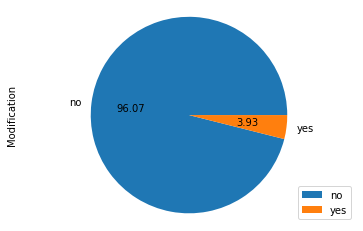

In [55]:
pro['Modification'].value_counts().plot(kind='pie',autopct='%.2f')
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()

In [56]:
pro['Time Differences']=pro['Time Differences'].dt.days

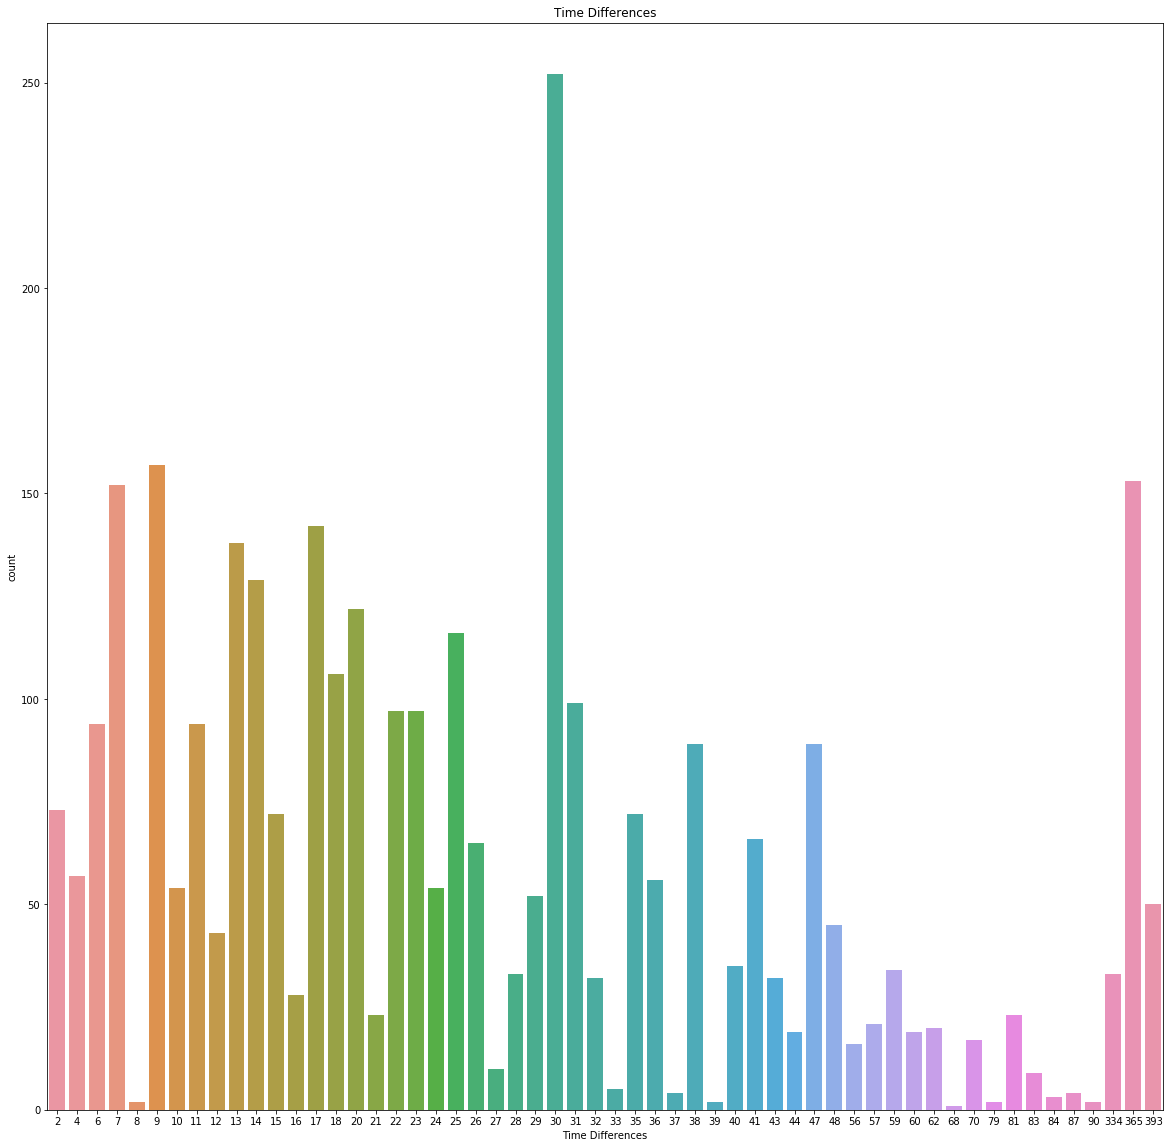

In [57]:
plt.figure(figsize = (20,20))
plt.title('Time Differences')
x = pro[(pro['Time Differences'] > 1)]
sns.countplot(x='Time Differences',data=x)

In [58]:
pro

0           Customer Standard Destination POS Receive Date POS Delivery Date  \
0       AMR INDUSTRY      ECE    THAILAND       2016-03-30        2016-04-08   
1       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
2       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
3       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
4       AMR INDUSTRY      ECE    THAILAND       2016-03-04        2016-03-05   
...              ...      ...         ...              ...               ...   
10425  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10426  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10427  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10428  WINNER-MOTORS    E2205      BRAZIL       2018-10-01        2018-10-02   
10429  WINNER-MOTORS    E2205      BRAZIL       2018-02-27        2018-03-01   

0      Time Differences Model/Type Modification  XXS  XS (48)  ...  XXL  3XL  \
0                     9     VANDAL           no    0        0  ...    0    0   
1                     1       APEX           no    0        0  ...    1    1   
2                     1       APEX           no    0        0  ...    1    1   
3                     1      HELLO           no    0        0  ...    1    0   
4                     1      HELLO           no    0        0  ...    1    0   
...                 ...        ...          ...  ...      ...  ...  ...  ...   
10425                 1        KIT           no    0        0  ...    0    0   
10426                 1        KIT           no    0        0  ...    0    0   
10427                 1        KIT           no    0        0  ...    0    0   
10428                 1        KIT           no    0        0  ...    0    0   
10429                 2        KIT           no    0        0  ...    0    0   

0      4XL  S/M  L/XL  Total Helmet  Other  Receive Year  Delivery Year  \
0        0    0     0            18      0          2016           2016   
1        0    0     0             9      0          2016           2016   
2        0    0     0             9      0          2016           2016   
3        0    0     0             9      0          2016           2016   
4        0    0     0             9      0          2016           2016   
...    ...  ...   ...           ...    ...           ...            ...   
10425    0    0     0             0     20          2018           2018   
10426    0    0     0             0     20          2018           2018   
10427    0    0     0             0     20          2018           2018   
10428    0    0     0             0     30          2018           2018   
10429    0    0     0             0     36          2018           2018   

0      Grand Total  
0               18  
1                9  
2                9  
3                9  
4                9  
...            ...  
10425           20  
10426           20  
10427           20  
10428           30  
10429           36  

[10430 rows x 25 columns]

In [64]:
pro.columns

Index(['Customer', 'Standard', 'Destination', 'POS Receive Date',
       'POS Delivery Date', 'Time Differences', 'Model/Type', 'Modification',
       'XXS', 'XS (48)', 'XS/S', 'S(50)', 'M(52)', 'L(54)', 'XL(56)', 'XXL',
       '3XL', '4XL', 'S/M', 'L/XL', 'Total Helmet', 'Other', 'Receive Year',
       'Delivery Year', 'Grand Total'],
      dtype='object', name=0)

- customer, standars, destination, Model/Type, modification categorical 
- size, total helmet, other, grand total continuous 
- POS Receive date, POS Delivery Date, Time Differences categorical
- Modification binary

In [65]:
pro['Time Differences'].value_counts()

1      7107
30      252
9       157
365     153
7       152
17      142
13      138
14      129
20      122
25      116
18      106
31       99
22       97
23       97
6        94
11       94
47       89
38       89
2        73
15       72
35       72
41       66
26       65
4        57
36       56
10       54
24       54
29       52
393      50
48       45
12       43
40       35
59       34
28       33
334      33
32       32
43       32
16       28
81       23
21       23
57       21
62       20
44       19
60       19
70       17
56       16
27       10
0         9
83        9
33        5
37        4
87        4
84        3
90        2
79        2
39        2
8         2
68        1
Name: Time Differences, dtype: int64

In [66]:
pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 25 columns):
Customer             10430 non-null object
Standard             10301 non-null object
Destination          10430 non-null object
POS Receive Date     10430 non-null datetime64[ns]
POS Delivery Date    10430 non-null datetime64[ns]
Time Differences     10430 non-null int64
Model/Type           10430 non-null object
Modification         10430 non-null object
XXS                  10430 non-null int64
XS (48)              10430 non-null int64
XS/S                 10430 non-null int64
S(50)                10430 non-null int64
M(52)                10430 non-null int64
L(54)                10430 non-null int64
XL(56)               10430 non-null int64
XXL                  10430 non-null int64
3XL                  10430 non-null int64
4XL                  10430 non-null int64
S/M                  10430 non-null int64
L/XL                 10430 non-null int64
Total Helmet         10430 n

In [67]:
for i in ['POS Receive Date','POS Delivery Date','Time Differences']:
    pro[i]=pro[i].astype('object')

In [68]:
pro.describe()

0               XXS       XS (48)          XS/S         S(50)         M(52)  \
count  10430.000000  10430.000000  10430.000000  10430.000000  10430.000000   
mean       0.022148      2.378523      0.000479      6.563087     13.098945   
std        1.673970     16.047141      0.035303     30.195823     45.509696   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      1.000000   
75%        0.000000      0.000000      0.000000      4.000000     12.000000   
max      160.000000    600.000000      3.000000    810.000000    960.000000   

0             L(54)        XL(56)           XXL           3XL           4XL  \
count  10430.000000  10430.000000  10430.000000  10430.000000  10430.000000   
mean      18.948035      8.473250      9.057910      0.181208      0.101055   
std       59.057746     43.092546     45.391464      4.784206      3.405667   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        2.000000      0.000000      0.000000      0.000000      0.000000   
75%       12.000000      5.000000      0.000000      0.000000      0.000000   
max     1000.000000   1000.000000   1402.000000    240.000000    200.000000   

0               S/M          L/XL  Total Helmet         Other  Receive Year  \
count  10430.000000  10430.000000  10430.000000  10430.000000  10430.000000   
mean       1.566155      1.272483     61.663279     41.890316   2017.059348   
std       22.989047     38.168497    202.700105    333.947114      0.786931   
min        0.000000      0.000000      0.000000      0.000000   2015.000000   
25%        0.000000      0.000000      1.000000      0.000000   2016.000000   
50%        0.000000      0.000000     12.000000      0.000000   2017.000000   
75%        0.000000      0.000000     48.000000      3.000000   2018.000000   
max     1260.000000   3740.000000   6402.000000  20000.000000   2018.000000   

0      Delivery Year   Grand Total  
count   10430.000000  10430.000000  
mean     2017.085235    103.553595  
std         0.803389    452.797718  
min      2015.000000      1.000000  
25%      2016.000000      6.000000  
50%      2017.000000     24.000000  
75%      2018.000000     66.000000  
max      2019.000000  20000.000000

In [69]:
listItem=[]
for i in pro.columns:
    listItem.append([i,
                    pro[i].dtypes,
                    pro[i].isna().sum(),
                    round((pro[i].isna().sum())/len(pro)*100,2),
                    pro[i].nunique(),
                    pro[i].drop_duplicates().sample(2).values]
        )
pd.DataFrame(listItem,columns=['dataFeatures','dataType','null','nullPct','unique','uniqueSample'])

dataFeatures dataType  null  nullPct  unique  \
0            Customer   object     0     0.00      29   
1            Standard   object   129     1.24      21   
2         Destination   object     0     0.00      17   
3    POS Receive Date   object     0     0.00     337   
4   POS Delivery Date   object     0     0.00     335   
5    Time Differences   object     0     0.00      58   
6          Model/Type   object     0     0.00     294   
7        Modification   object     0     0.00       2   
8                 XXS    int64     0     0.00       5   
9             XS (48)    int64     0     0.00      53   
10               XS/S    int64     0     0.00       3   
11              S(50)    int64     0     0.00      96   
12              M(52)    int64     0     0.00     122   
13              L(54)    int64     0     0.00     128   
14             XL(56)    int64     0     0.00      97   
15                XXL    int64     0     0.00      85   
16                3XL    int64     0     0.00      18   
17                4XL    int64     0     0.00       8   
18                S/M    int64     0     0.00      44   
19               L/XL    int64     0     0.00      29   
20       Total Helmet    int64     0     0.00     237   
21              Other    int64     0     0.00     141   
22       Receive Year    int64     0     0.00       4   
23      Delivery Year    int64     0     0.00       5   
24        Grand Total    int64     0     0.00     261   

                                  uniqueSample  
0               [KYT JAPAN, I&N INTERNATIONAL]  
1                               [ECE/DOT, ECE]  
2                              [BRAZIL, ITALY]  
3   [2017-01-05 00:00:00, 2017-05-02 00:00:00]  
4   [2016-01-26 00:00:00, 2016-04-26 00:00:00]  
5                                    [365, 70]  
6             [KYT VENOM FULL FACE, KYT SLIDE]  
7                                    [yes, no]  
8                                      [60, 1]  
9                                      [0, 90]  
10                                      [2, 0]  
11                                   [428, 29]  
12                                   [156, 44]  
13                                   [252, 71]  
14                                   [162, 48]  
15                                  [180, 142]  
16                                    [180, 3]  
17                                  [192, 100]  
18                                  [492, 216]  
19                                   [240, 12]  
20                                  [400, 216]  
21                                 [1092, 185]  
22                                [2018, 2015]  
23                                [2017, 2015]  
24                                  [27, 3100]

In [70]:
def cramers_v(x,y):
    import scipy.stats as ss
    confusion_matrix = pd.crosstab(x,y)
    chi2= ss.chi2_contingency(confusion_matrix)[0]
    n= confusion_matrix.sum().sum()
    phi2= chi2/n
    r, k= confusion_matrix.shape
    phi2corr= max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr= r-((r-1)**2)/(n-1)
    kcorr= k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))

def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures=measurements[np.argwhere(fcat==i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i]= np.average(cat_measures)
    y_total_avg =np.sum(np.multiply(y_avg_array, n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array, y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg),2))
    if numerator == 0:
        eta=0.0
    else:
        eta= np.sqrt(numerator/denominator)
    return eta

In [71]:
listI=[]
kat=pro.describe(exclude='number')
for i in kat.columns:
    listI.append([i,cramers_v(pro[i],pro['Time Differences'])])
pd.DataFrame(listI,columns=['Column','Cramers_V']).sort_values(by='Cramers_V',ascending=False)

Column  Cramers_V
5   Time Differences   1.000000
3   POS Receive Date   0.832404
4  POS Delivery Date   0.778133
2        Destination   0.390808
0           Customer   0.386059
6         Model/Type   0.312151
1           Standard   0.205008
7       Modification   0.116909

XXS
Correlation Ratio: 0.008975033213294535
Not Normal Distribution
Skewness: 88.11031380524338, Kurtosis: 8154.269325448572


C:\Users\krnjy\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning:

p-value may not be accurate for N > 5000.



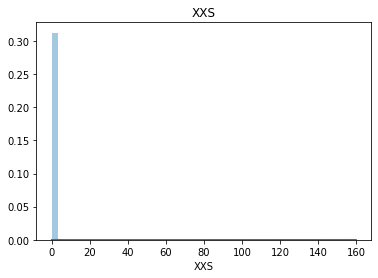



XS (48)
Correlation Ratio: 0.3059700913528358
Not Normal Distribution
Skewness: 17.909050860302745, Kurtosis: 435.0721071283851


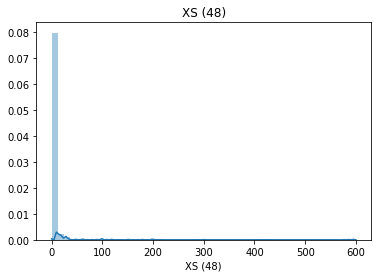



XS/S
Correlation Ratio: 0.009285776535504347
Not Normal Distribution
Skewness: 76.24006740306348, Kurtosis: 5981.515437513948


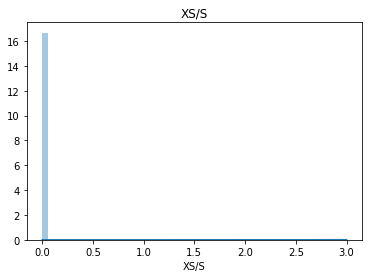



S(50)
Correlation Ratio: 0.29353731096165886
Not Normal Distribution
Skewness: 12.308297117591172, Kurtosis: 203.7842520637205


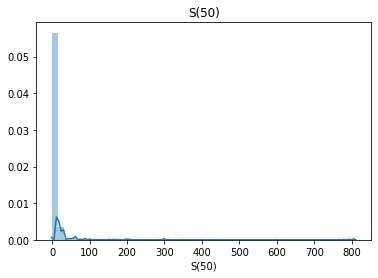



M(52)
Correlation Ratio: 0.24962381201297804
Not Normal Distribution
Skewness: 9.509377269074898, Kurtosis: 115.20517997112535


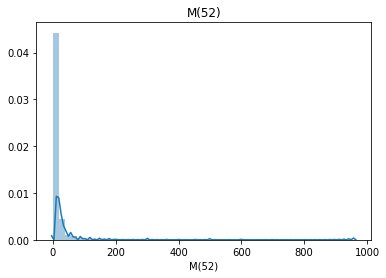



L(54)
Correlation Ratio: 0.2547509888055813
Not Normal Distribution
Skewness: 7.495118069292349, Kurtosis: 73.51961762050558


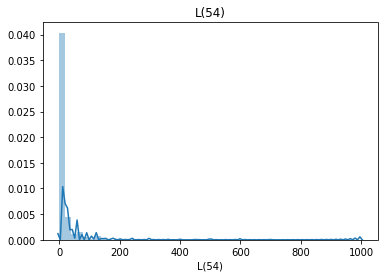



XL(56)
Correlation Ratio: 0.21687405588946101
Not Normal Distribution
Skewness: 11.855015532571528, Kurtosis: 173.73887282438994


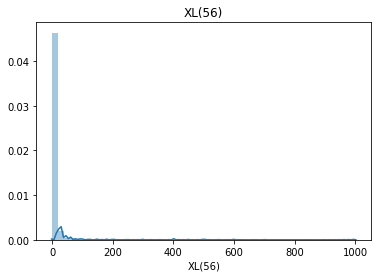



XXL
Correlation Ratio: 0.2583379125915061
Not Normal Distribution
Skewness: 10.099687070116577, Kurtosis: 161.31470105503584


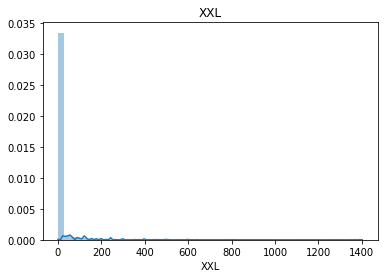



3XL
Correlation Ratio: 0.11485876698664786
Not Normal Distribution
Skewness: 36.17303859472711, Kurtosis: 1461.6685827937563


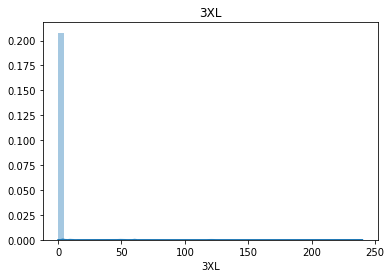



4XL
Correlation Ratio: 0.17644197100111625
Not Normal Distribution
Skewness: 44.502295298111044, Kurtosis: 2293.377393269796


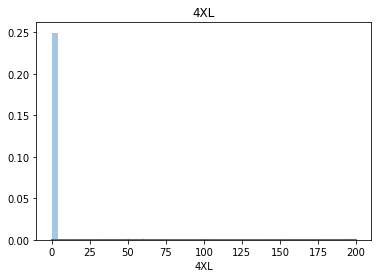



S/M
Correlation Ratio: 0.32405910484228967
Not Normal Distribution
Skewness: 30.563208009223935, Kurtosis: 1253.7943421369282


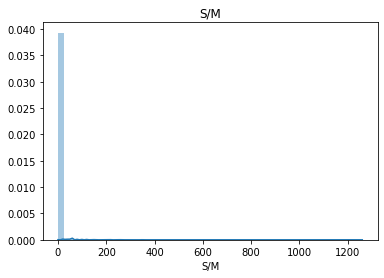



L/XL
Correlation Ratio: 0.1049910581581791
Not Normal Distribution
Skewness: 90.79764160337831, Kurtosis: 8833.687134613734


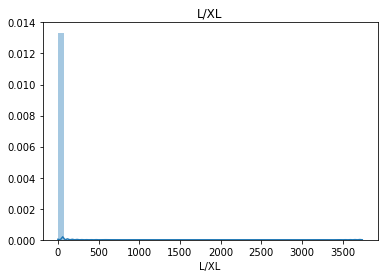



Total Helmet
Correlation Ratio: 0.2621109567414647
Not Normal Distribution
Skewness: 10.711958189685005, Kurtosis: 177.89492496980048


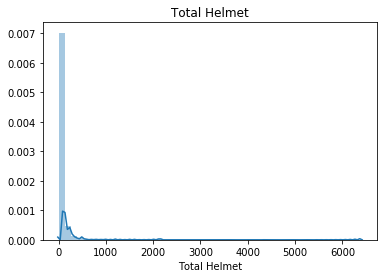



Other
Correlation Ratio: 0.13545202242071405
Not Normal Distribution
Skewness: 27.14622633565372, Kurtosis: 1305.6512027064348


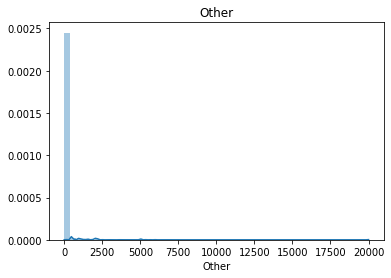



Receive Year
Correlation Ratio: 0.532893237216786
Not Normal Distribution
Skewness: -0.17336529086586258, Kurtosis: -1.183643855620111


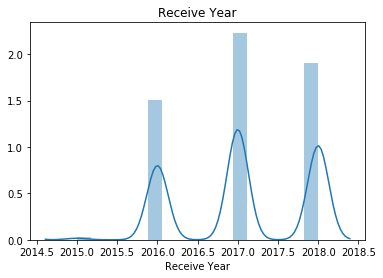



Delivery Year
Correlation Ratio: 0.5631665746378887
Not Normal Distribution
Skewness: -0.05966949681852809, Kurtosis: -0.9174152061414209


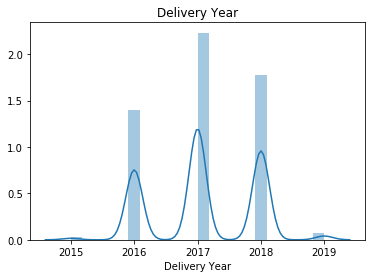



Grand Total
Correlation Ratio: 0.20205733249326513
Not Normal Distribution
Skewness: 15.371481973575301, Kurtosis: 431.59541940973673


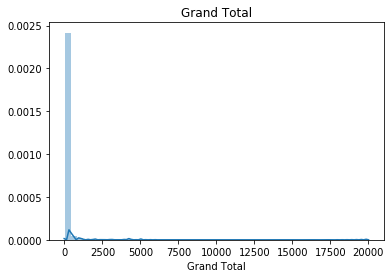

In [72]:
from scipy.stats import shapiro, anderson, skew, kurtosis
for i in pro.select_dtypes(exclude='object').columns:
    print(i)
    print('Correlation Ratio: {}'.format(correlation_ratio(pro['Time Differences'],pro[i])))
    if shapiro(pro[i])[1]<0.05:
        print('Not Normal Distribution')
    else:
        print('Normal Distribution')
        
    print('Skewness: {}, Kurtosis: {}'.format(skew(pro[i]), kurtosis(pro[i])))
    sns.distplot(pro[i])
    plt.title(i)
    plt.show()
    print('\n')

In [73]:
from scipy.stats import chi2_contingency
chi2_check = []
for i in kat.columns:
    if chi2_contingency(pd.crosstab(pro['Time Differences'],pro[i]))[1]<0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res=pd.DataFrame(data=[kat.columns,chi2_check]).T
res.columns=['Column','Hypothesis']
res

Column              Hypothesis
0           Customer  Reject Null Hypothesis
1           Standard  Reject Null Hypothesis
2        Destination  Reject Null Hypothesis
3   POS Receive Date  Reject Null Hypothesis
4  POS Delivery Date  Reject Null Hypothesis
5   Time Differences  Reject Null Hypothesis
6         Model/Type  Reject Null Hypothesis
7       Modification  Reject Null Hypothesis

In [74]:
check={}
for i in res[res['Hypothesis']=='Reject Null Hypothesis']['Column']:
    dummies = pd.get_dummies(pro[i])
    bon_p_value=0.05/pro[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(pro['Time Differences'],dummies[series]))[1]<bon_p_value:
            check['{}+{}'.format(i,series)]='Reject Null Hypothesis'
        else:
            check['{}+{}'.format(i,series)]='Fail to Reject Null Hypothesis'

res_chi=pd.DataFrame(data=[check.keys(),check.values()]).T
res_chi.columns=['Pair','Hypothesis']
res_chi

Pair                      Hypothesis
0              Customer+AGV          Reject Null Hypothesis
1       Customer+ALPINESTAR          Reject Null Hypothesis
2     Customer+AMR INDUSTRY          Reject Null Hypothesis
3        Customer+ARGENTINA  Fail to Reject Null Hypothesis
4          Customer+FORTUNE          Reject Null Hypothesis
...                     ...                             ...
1088      Model/Type+VECTOR          Reject Null Hypothesis
1089  Model/Type+VENOM MINI          Reject Null Hypothesis
1090     Model/Type+VENTURA  Fail to Reject Null Hypothesis
1091        Modification+no          Reject Null Hypothesis
1092       Modification+yes          Reject Null Hypothesis

[1093 rows x 2 columns]

In [75]:
# for i in res_chi[res_chi['Hypothesis']=='Reject Null Hypothesis']['Pair']:
#     sns.countplot((pro)[pro[i.split('+')[0]]==int(i.split('+')[1])]['Time Differences'])
#     plt.title(i)
#     plt.show()

In [95]:
from scipy.stats import mannwhitneyu
for i in pro.select_dtypes(exclude='object').columns:
    print(i)
    if mannwhitneyu(pro[pro['Time Differences']==0][i],pro[pro['Time Differences']==1][i])[1]<0.05:
        print('Reject Null Hypothesis')
    else:
        print('Fail to Reject Null Hypothesis')
    print('\n')

XXS
Fail to Reject Null Hypothesis


XS (48)
Fail to Reject Null Hypothesis


XS/S
Fail to Reject Null Hypothesis


S(50)
Reject Null Hypothesis


M(52)
Fail to Reject Null Hypothesis


L(54)
Reject Null Hypothesis


XL(56)
Reject Null Hypothesis


XXL
Fail to Reject Null Hypothesis


3XL
Fail to Reject Null Hypothesis


4XL


ValueError: All numbers are identical in mannwhitneyu

In [77]:
pro

0           Customer Standard Destination     POS Receive Date  \
0       AMR INDUSTRY      ECE    THAILAND  2016-03-30 00:00:00   
1       AMR INDUSTRY      ECE    THAILAND  2016-03-04 00:00:00   
2       AMR INDUSTRY      ECE    THAILAND  2016-03-04 00:00:00   
3       AMR INDUSTRY      ECE    THAILAND  2016-03-04 00:00:00   
4       AMR INDUSTRY      ECE    THAILAND  2016-03-04 00:00:00   
...              ...      ...         ...                  ...   
10425  WINNER-MOTORS    E2205      BRAZIL  2018-10-01 00:00:00   
10426  WINNER-MOTORS    E2205      BRAZIL  2018-10-01 00:00:00   
10427  WINNER-MOTORS    E2205      BRAZIL  2018-10-01 00:00:00   
10428  WINNER-MOTORS    E2205      BRAZIL  2018-10-01 00:00:00   
10429  WINNER-MOTORS    E2205      BRAZIL  2018-02-27 00:00:00   

0        POS Delivery Date Time Differences Model/Type Modification  XXS  \
0      2016-04-08 00:00:00                9     VANDAL           no    0   
1      2016-03-05 00:00:00                1       APEX           no    0   
2      2016-03-05 00:00:00                1       APEX           no    0   
3      2016-03-05 00:00:00                1      HELLO           no    0   
4      2016-03-05 00:00:00                1      HELLO           no    0   
...                    ...              ...        ...          ...  ...   
10425  2018-10-02 00:00:00                1        KIT           no    0   
10426  2018-10-02 00:00:00                1        KIT           no    0   
10427  2018-10-02 00:00:00                1        KIT           no    0   
10428  2018-10-02 00:00:00                1        KIT           no    0   
10429  2018-03-01 00:00:00                2        KIT           no    0   

0      XS (48)  ...  XXL  3XL  4XL  S/M  L/XL  Total Helmet  Other  \
0            0  ...    0    0    0    0     0            18      0   
1            0  ...    1    1    0    0     0             9      0   
2            0  ...    1    1    0    0     0             9      0   
3            0  ...    1    0    0    0     0             9      0   
4            0  ...    1    0    0    0     0             9      0   
...        ...  ...  ...  ...  ...  ...   ...           ...    ...   
10425        0  ...    0    0    0    0     0             0     20   
10426        0  ...    0    0    0    0     0             0     20   
10427        0  ...    0    0    0    0     0             0     20   
10428        0  ...    0    0    0    0     0             0     30   
10429        0  ...    0    0    0    0     0             0     36   

0      Receive Year  Delivery Year  Grand Total  
0              2016           2016           18  
1              2016           2016            9  
2              2016           2016            9  
3              2016           2016            9  
4              2016           2016            9  
...             ...            ...          ...  
10425          2018           2018           20  
10426          2018           2018           20  
10427          2018           2018           20  
10428          2018           2018           30  
10429          2018           2018           36  

[10430 rows x 25 columns]

In [78]:
pro.to_csv(r'C:\Users\krnjy\Documents\Final Project\procsv.csv',index=False)

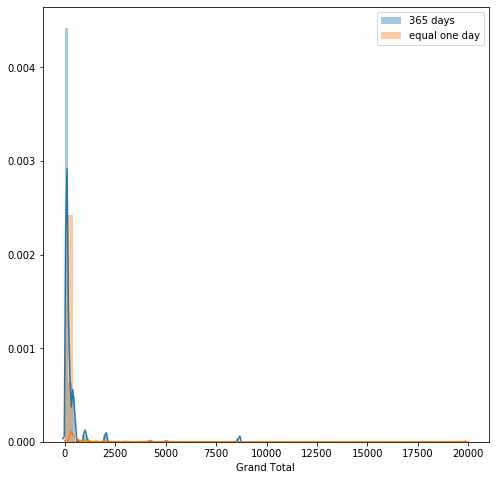

In [79]:
plt.figure(figsize = (8, 8))
sns.distplot(pro[pro['Time Differences'] ==365]['Grand Total'], label = '365 days')
sns.distplot(pro[pro['Time Differences'] == 1]['Grand Total'], label = 'equal one day')

plt.legend()

In [80]:
from scipy.stats import ttest_ind
result = list(ttest_ind(pro[pro['Time Differences'] >1]['Grand Total'], 
                        pro[pro['Time Differences'] >1]['Grand Total'], equal_var = True)) #kalau equal_var=true, pake student t-test dan kalau false pake welch's t-test
print('T-Statistic:', result[0])
print('P-Value:', result[1])
# Ho diterima: tidak ada perbedaan

T-Statistic: 0.0
P-Value: 1.0


In [81]:
from scipy.stats import ttest_ind
result = list(ttest_ind(pro[pro['Modification'] =='yes']['Time Differences'], 
                        pro[pro['Modification'] =='no']['Time Differences'], equal_var = True)) #kalau equal_var=true, pake student t-test dan kalau false pake welch's t-test
print('T-Statistic:', result[0])
print('P-Value:', result[1])
# Ho ditolak: ada perbedaan

T-Statistic: -5.688636215220583
P-Value: 1.3150787198343743e-08


In [82]:
from scipy.stats import ttest_ind
result = list(ttest_ind(pro[pro['Grand Total'] >42]['Time Differences'], 
                        pro[pro['Grand Total'] <=42]['Time Differences'], equal_var = True)) #kalau equal_var=true, pake student t-test dan kalau false pake welch's t-test
print('T-Statistic:', result[0])
print('P-Value:', result[1])
# Ho ditolak: ada perbedaan

T-Statistic: 7.560258889169343
P-Value: 4.3609829764599276e-14


Agglomerative Clustering

In [83]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

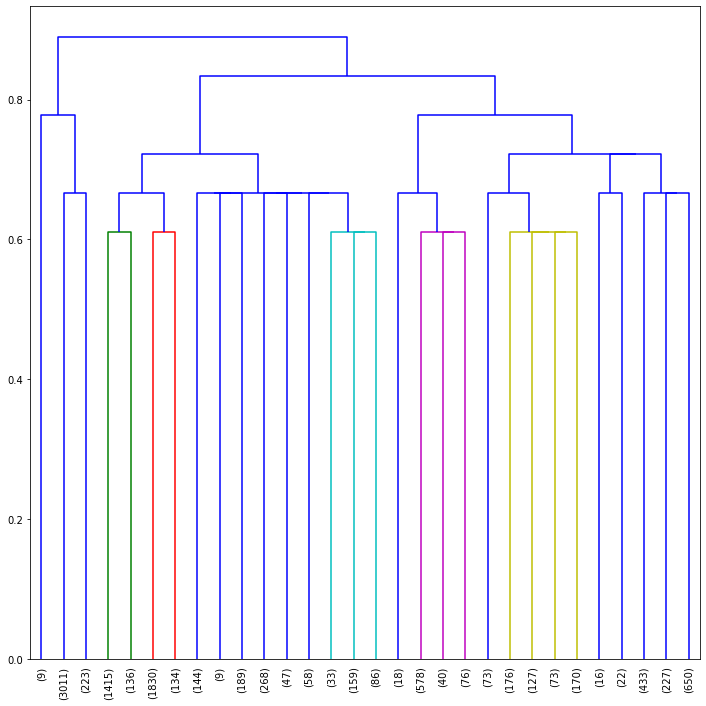

In [84]:
Z = linkage(pro.drop(['Customer','Standard','Destination','Model/Type','Modification','POS Receive Date','POS Delivery Date'], axis =1), method = 'complete', metric = 'hamming')
plt.figure(figsize = (12,12))
# plt.axhline(y = 50, linestyle = '--')
dendrogram(Z, truncate_mode = 'lastp')
plt.xticks(rotation = 90)
plt.show()

C:\Users\krnjy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\krnjy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



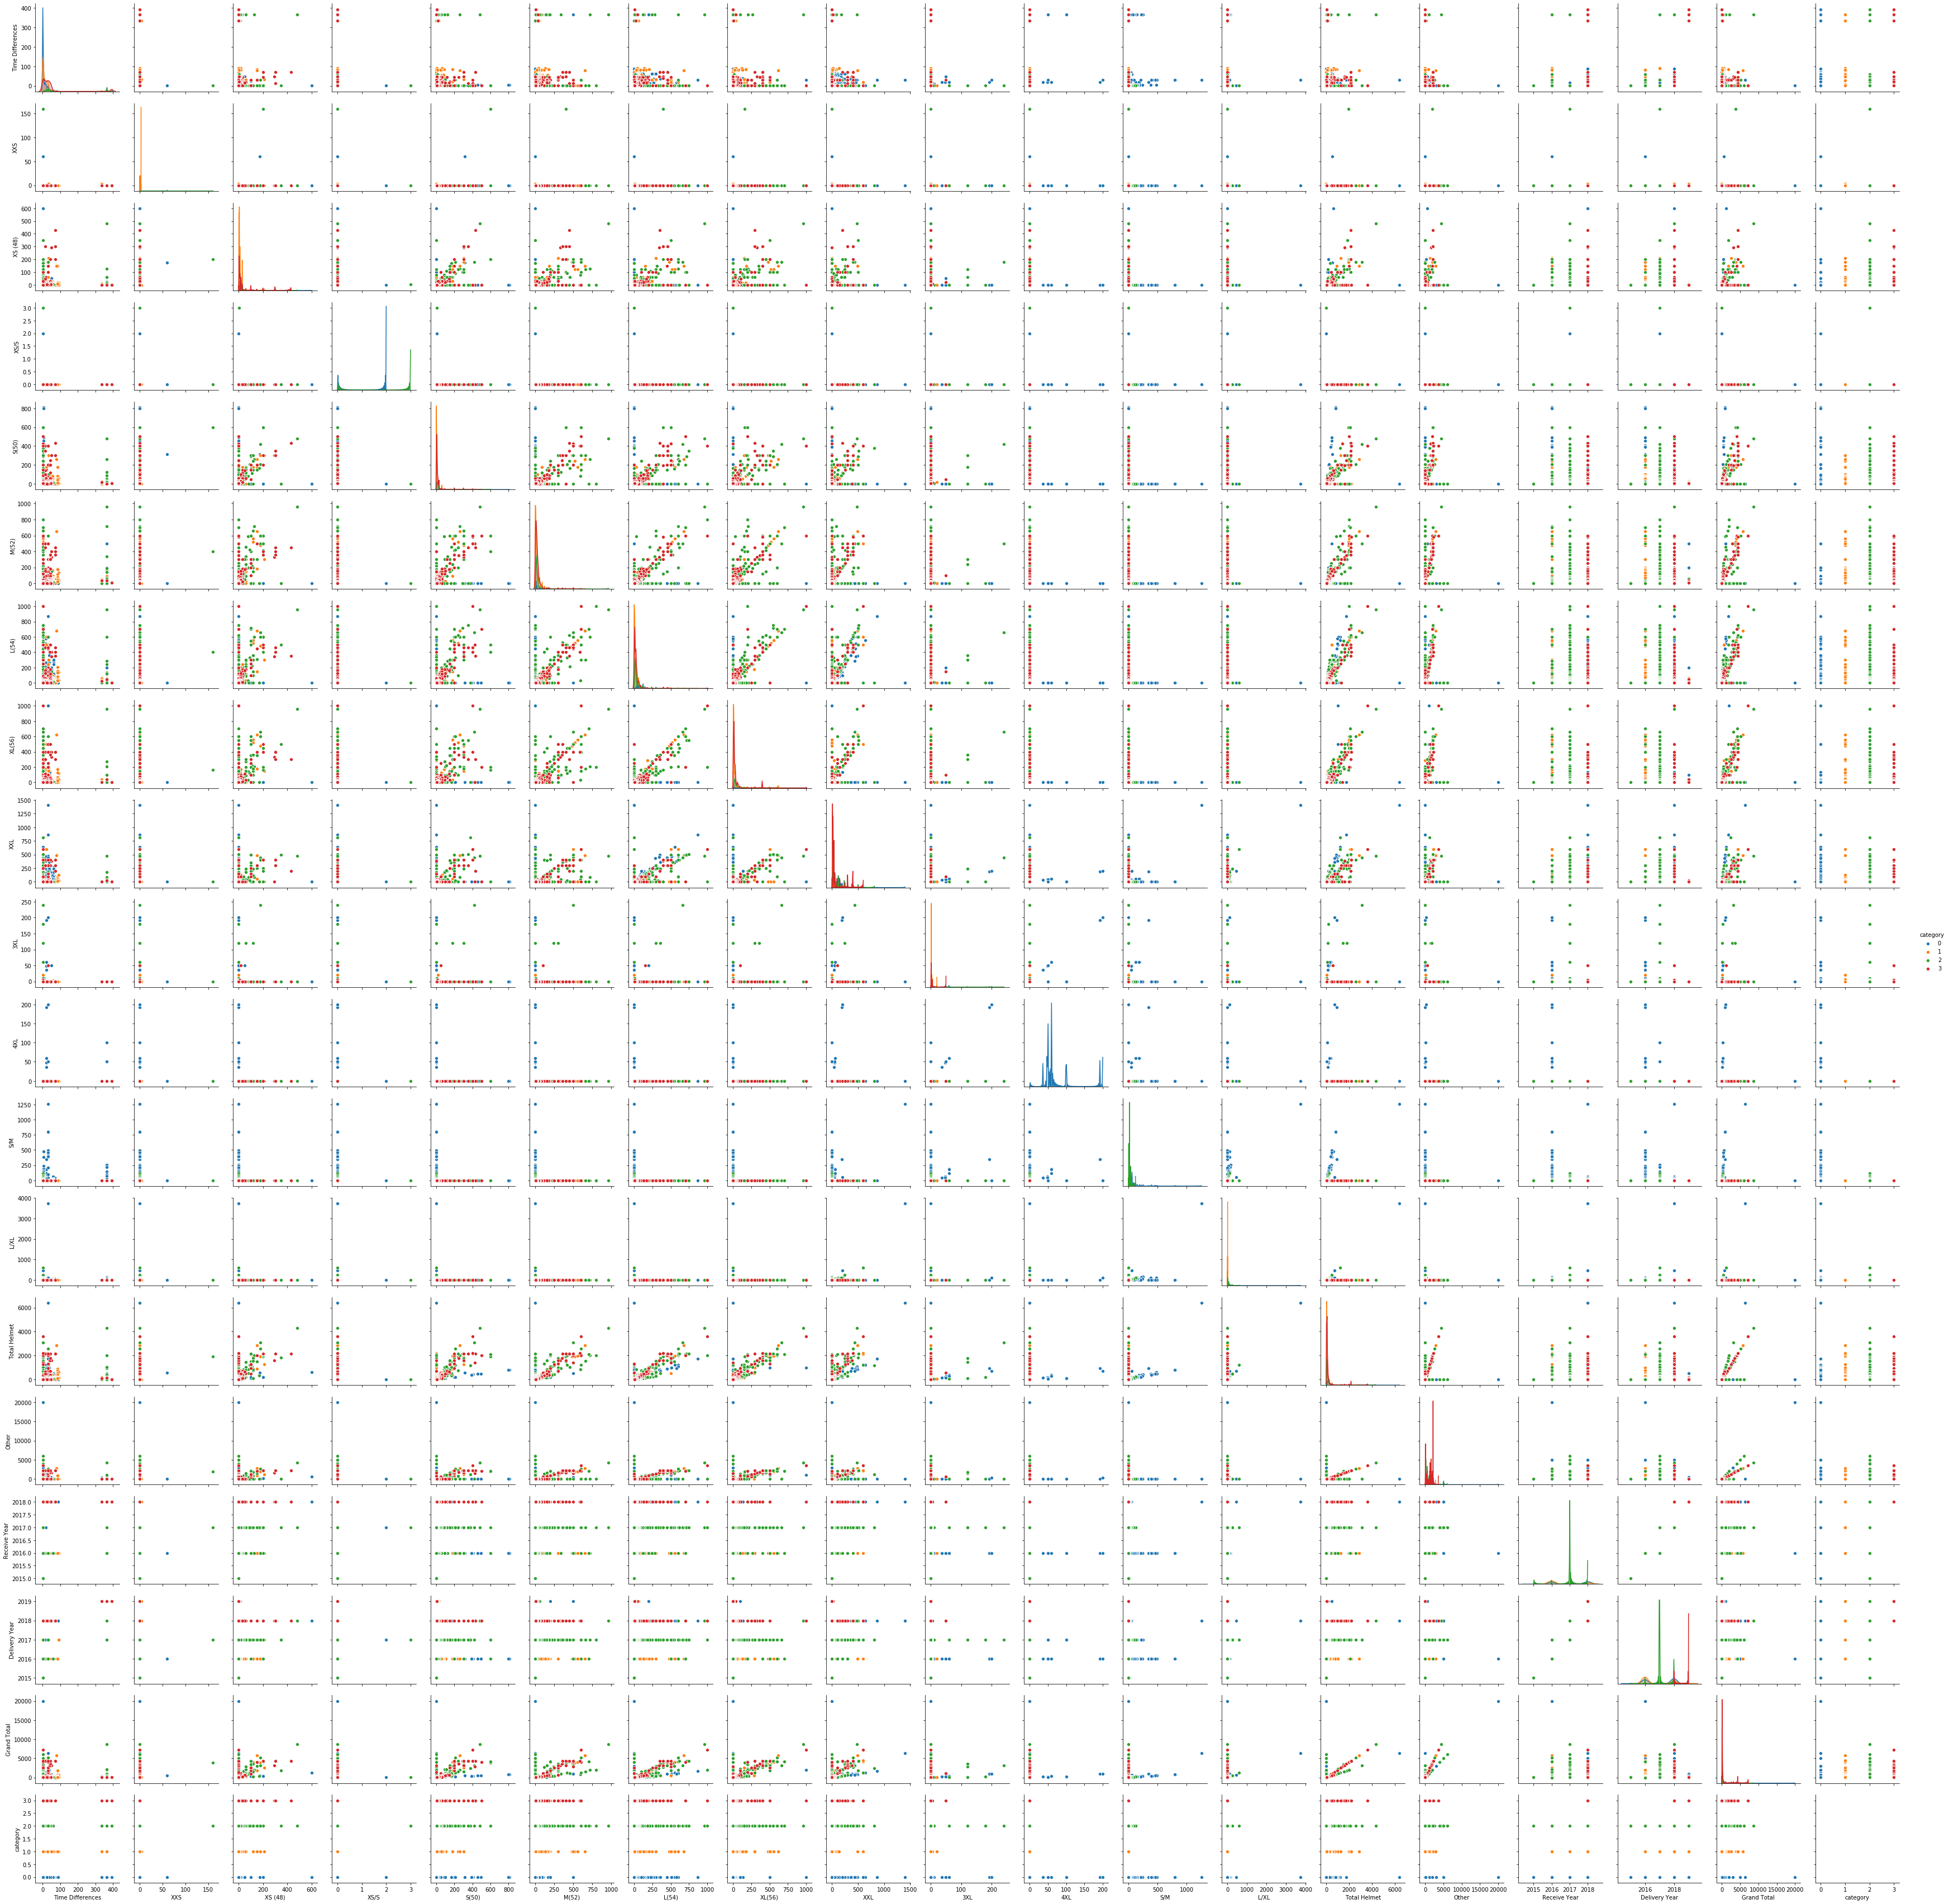

In [85]:
ach = AgglomerativeClustering(n_clusters = 4, affinity = 'hamming', linkage = 'complete')
ach.fit(pro.drop(['Customer','Standard','Destination','Model/Type','Modification','POS Receive Date','POS Delivery Date'], axis =1))
pro['category'] = ach.labels_
sns.pairplot(pro, hue = 'category')

In [94]:
pro[pro['category']==0]

1      2032
30       99
17       97
13       75
365      72
9        68
20       57
4        48
11       47
14       47
7        44
41       35
23       33
18       33
6        32
38       29
36       26
10       25
24       23
81       23
2        20
62       20
21       20
26       19
60       19
334      19
32       18
56       16
16       16
25       16
29       15
15       13
47       10
48       10
70       10
0         9
28        9
31        9
12        7
43        6
22        4
87        4
33        1
35        1
37        1
39        1
44        1
68        1
79        1
84        1
393       1
Name: Time Differences, dtype: int64

In [87]:
pro[pro['category']==1]

0           Customer Standard Destination     POS Receive Date  \
0       AMR INDUSTRY      ECE    THAILAND  2016-03-30 00:00:00   
1       AMR INDUSTRY      ECE    THAILAND  2016-03-04 00:00:00   
2       AMR INDUSTRY      ECE    THAILAND  2016-03-04 00:00:00   
3       AMR INDUSTRY      ECE    THAILAND  2016-03-04 00:00:00   
4       AMR INDUSTRY      ECE    THAILAND  2016-03-04 00:00:00   
...              ...      ...         ...                  ...   
10346  WINNER-MOTORS    E2205      BRAZIL  2018-10-02 00:00:00   
10373  WINNER-MOTORS    E2205      BRAZIL  2018-06-07 00:00:00   
10374  WINNER-MOTORS    E2205      BRAZIL  2018-10-01 00:00:00   
10375  WINNER-MOTORS    E2205      BRAZIL  2018-10-01 00:00:00   
10377  WINNER-MOTORS    E2205      BRAZIL  2018-10-02 00:00:00   

0        POS Delivery Date Time Differences Model/Type Modification  XXS  \
0      2016-04-08 00:00:00                9     VANDAL           no    0   
1      2016-03-05 00:00:00                1       APEX           no    0   
2      2016-03-05 00:00:00                1       APEX           no    0   
3      2016-03-05 00:00:00                1      HELLO           no    0   
4      2016-03-05 00:00:00                1      HELLO           no    0   
...                    ...              ...        ...          ...  ...   
10346  2018-10-03 00:00:00                1    STELLAR           no    0   
10373  2019-06-07 00:00:00              365   SR SPORT           no    0   
10374  2018-10-02 00:00:00                1   SR SPORT           no    0   
10375  2018-10-02 00:00:00                1   SR SPORT           no    0   
10377  2018-10-03 00:00:00                1   SR SPORT           no    0   

0      XS (48)  ...  3XL  4XL  S/M  L/XL  Total Helmet  Other  Receive Year  \
0            0  ...    0    0    0     0            18      0          2016   
1            0  ...    1    0    0     0             9      0          2016   
2            0  ...    1    0    0     0             9      0          2016   
3            0  ...    0    0    0     0             9      0          2016   
4            0  ...    0    0    0     0             9      0          2016   
...        ...  ...  ...  ...  ...   ...           ...    ...           ...   
10346        0  ...    0    0    0     0            48      0          2018   
10373        0  ...    0    0    0     0            20      0          2018   
10374        0  ...    0    0    0     0            20      0          2018   
10375        0  ...    0    0    0     0            20      0          2018   
10377        0  ...    0    0    0     0            20      0          2018   

0      Delivery Year  Grand Total  category  
0               2016           18         1  
1               2016            9         1  
2               2016            9         1  
3               2016            9         1  
4               2016            9         1  
...              ...          ...       ...  
10346           2018           48         1  
10373           2019           20         1  
10374           2018           20         1  
10375           2018           20         1  
10377           2018           20         1  

[1967 rows x 26 columns]

In [88]:
pro[pro['category']==2]

0           Customer Standard Destination     POS Receive Date  \
12      AMR INDUSTRY      ECE    THAILAND  2016-03-04 00:00:00   
18      AMR INDUSTRY      ECE    THAILAND  2016-03-04 00:00:00   
19      AMR INDUSTRY      ECE    THAILAND  2016-03-04 00:00:00   
21      AMR INDUSTRY      ECE    THAILAND  2016-03-04 00:00:00   
22      AMR INDUSTRY      ECE    THAILAND  2016-03-04 00:00:00   
...              ...      ...         ...                  ...   
10393  WINNER-MOTORS    E2205      BRAZIL  2018-02-27 00:00:00   
10394  WINNER-MOTORS    E2205      BRAZIL  2018-02-27 00:00:00   
10395  WINNER-MOTORS    E2205      BRAZIL  2018-10-01 00:00:00   
10396  WINNER-MOTORS    E2205      BRAZIL  2018-10-01 00:00:00   
10397  WINNER-MOTORS    E2205      BRAZIL  2018-10-02 00:00:00   

0        POS Delivery Date Time Differences Model/Type Modification  XXS  \
12     2016-03-05 00:00:00                1      ALPHA           no    0   
18     2016-03-05 00:00:00                1   SR SPORT           no    0   
19     2016-03-05 00:00:00                1   SR SPORT           no    0   
21     2016-03-05 00:00:00                1      ALPHA           no    0   
22     2016-03-05 00:00:00                1      ALPHA           no    0   
...                    ...              ...        ...          ...  ...   
10393  2018-03-01 00:00:00                2   SR SPORT           no    0   
10394  2018-03-01 00:00:00                2   SR SPORT           no    0   
10395  2018-10-02 00:00:00                1   SR SPORT           no    0   
10396  2018-10-02 00:00:00                1   SR SPORT           no    0   
10397  2018-10-03 00:00:00                1   SR SPORT           no    0   

0      XS (48)  ...  3XL  4XL  S/M  L/XL  Total Helmet  Other  Receive Year  \
12           0  ...    0    0    0     0             5      0          2016   
18           0  ...    0    0    0     0             3      0          2016   
19           0  ...    0    0    0     0             3      0          2016   
21           0  ...    0    0    0     0             3      0          2016   
22           0  ...    0    0    0     0             3      0          2016   
...        ...  ...  ...  ...  ...   ...           ...    ...           ...   
10393        0  ...    0    0    0     0             6      0          2018   
10394        0  ...    0    0    0     0             6      0          2018   
10395        0  ...    0    0    0     0             6      0          2018   
10396        0  ...    0    0    0     0             6      0          2018   
10397        0  ...    0    0    0     0             6      0          2018   

0      Delivery Year  Grand Total  category  
12              2016            5         2  
18              2016            3         2  
19              2016            3         2  
21              2016            3         2  
22              2016            3         2  
...              ...          ...       ...  
10393           2018            6         2  
10394           2018            6         2  
10395           2018            6         2  
10396           2018            6         2  
10397           2018            6         2  

[4508 rows x 26 columns]

In [89]:
pro[pro['category']==3]

0           Customer Standard Destination     POS Receive Date  \
123     AMR INDUSTRY      ECE    THAILAND  2018-09-26 00:00:00   
129     AMR INDUSTRY      ECE    THAILAND  2018-09-26 00:00:00   
132     AMR INDUSTRY      ECE    THAILAND  2018-09-26 00:00:00   
133     AMR INDUSTRY      ECE    THAILAND  2018-09-26 00:00:00   
135     AMR INDUSTRY      ECE    THAILAND  2018-09-26 00:00:00   
...              ...      ...         ...                  ...   
10366  WINNER-MOTORS    E2205      BRAZIL  2018-02-27 00:00:00   
10370  WINNER-MOTORS    E2205      BRAZIL  2018-02-27 00:00:00   
10371  WINNER-MOTORS    E2205      BRAZIL  2018-10-02 00:00:00   
10372  WINNER-MOTORS    E2205      BRAZIL  2018-10-02 00:00:00   
10379  WINNER-MOTORS    E2205      BRAZIL  2018-02-27 00:00:00   

0        POS Delivery Date Time Differences           Model/Type Modification  \
123    2018-11-01 00:00:00               36              KYT NFR           no   
129    2018-11-01 00:00:00               36              KYT NFR           no   
132    2018-11-01 00:00:00               36  KYT VENOM OPEN FACE           no   
133    2018-11-01 00:00:00               36  KYT VENOM OPEN FACE           no   
135    2018-11-01 00:00:00               36              KYT NFR           no   
...                    ...              ...                  ...          ...   
10366  2018-03-01 00:00:00                2               RUMBLE           no   
10370  2018-03-01 00:00:00                2             SR SPORT           no   
10371  2018-10-03 00:00:00                1             SR SPORT           no   
10372  2018-10-03 00:00:00                1             SR SPORT           no   
10379  2018-03-01 00:00:00                2             SR SPORT           no   

0      XXS  XS (48)  ...  3XL  4XL  S/M  L/XL  Total Helmet  Other  \
123      0        6  ...    0    0    0     0           294      0   
129      0        6  ...    0    0    0     0           144      0   
132      0        6  ...    0    0    0     0           108      0   
133      0        6  ...    0    0    0     0           108      0   
135      0        0  ...    0    0    0     0            90      0   
...    ...      ...  ...  ...  ...  ...   ...           ...    ...   
10366    0        0  ...    0    0    0     0            26      0   
10370    0        0  ...    0    0    0     0            22      0   
10371    0        0  ...    0    0    0     0            22      0   
10372    0        0  ...    0    0    0     0            22      0   
10379    0        0  ...    0    0    0     0            14      0   

0      Receive Year  Delivery Year  Grand Total  category  
123            2018           2018          294         3  
129            2018           2018          144         3  
132            2018           2018          108         3  
133            2018           2018          108         3  
135            2018           2018           90         3  
...             ...            ...          ...       ...  
10366          2018           2018           26         3  
10370          2018           2018           22         3  
10371          2018           2018           22         3  
10372          2018           2018           22         3  
10379          2018           2018           14         3  

[712 rows x 26 columns]

Empty DataFrame
Columns: [Customer, Standard, Destination, POS Receive Date, POS Delivery Date, Time Differences, Model/Type, Modification, XXS, XS (48), XS/S, S(50), M(52), L(54), XL(56), XXL, 3XL, 4XL, S/M, L/XL, Total Helmet, Other, Receive Year, Delivery Year, Grand Total, category]
Index: []

[0 rows x 26 columns]

2017    4109
2018    3499
2016    2764
2015      58
Name: Receive Year, dtype: int64